<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [ ]:
#!pip install tensorflow==2.17.0 scikit-learn==1.3.1 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 -q --user
#!pip install tensorflow==2.17.0 scikit-learn==1.3.1 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 -q --user --force-reinstall --no-cache-dir -q
!pip install tensorflow==2.17.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 imbalanced-learn==0.10.1 keras-tuner --upgrade -q --user --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 156.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 172.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 167.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 260.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 128.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 129.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 143.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 -q --user --force-reinstall --no-cache-dir -q

## Importing necessary libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

#Plot graphs for EDA
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing, split data and Model metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,classification_report,confusion_matrix

# Synthetic Data oversampling
from imblearn.over_sampling import SMOTE

#Neural Network Framework, Models, layers
import keras_tuner
from keras_tuner import Hyperband # Keras tuner

import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential


# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

import time
import random

In [ ]:
#Configurations
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)
# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data from google drive
data = pd.read_csv('/content/drive/MyDrive/MyGreatLearning/3-Neural_Networks/Project/Churn.csv')

In [ ]:
df = data.copy() #Copy to make changes in another dataframe

## Data Overview

In [ ]:
#Shape
df.shape

(10000, 14)

There are 10000 rows and 14 columns in this churn dataset

In [ ]:
#First 10 rows in Dataset
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [ ]:
#Last 10 rows
df.tail(10)

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
9990       9991    15798964   Nkemakonam          714   Germany    Male   33   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9992       9993    15657105  Chukwualuka          726     Spain    Male   36   
9993       9994    15569266       Rahman          644    France    Male   28   
9994       9995    15719294         Wood          800    France  Female   29   
9995       9996    15606229     Obijiaku          771    France    Male   39   
9996       9997    15569892    Johnstone          516    France    Male   35   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42   
9999      10000    15628319       Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9990       3   35016.60              1          1               0   
9991       4   88381.21              1          1               0   
9992       2       0.00              1          1               0   
9993       7  155060.41              1          1               0   
9994       2       0.00              2          0               0   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9990         53667.08       0  
9991         69384.71       1  
9992        195192.40       0  
9993         29179.52       0  
9994        167773.55       0  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [ ]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are no null columns,
* RowNumber, CustomerId seems unique, so, could be dropped.
* There are 3 object type columns,Surname, geography and gender, need to check nunique values to determine if it needs to be dropped or convereted to categorical.
* Rest all are numeric in nature.
* Target variable - Exited -1 [yes exited], 0 [Still with bank]

In [ ]:
#Statistics
df.describe(include='all').T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0

Statistics
* RowNumber and CustomerId are unique in nature, could be dropped.
* Surname - Object type, has 2932 unique values, could not be convereted to categorical, could be dropped.
* Geography - Object type, has 3 unique values with France topping it with 5014 occurences. Could be converrted to categorical to retain the impact of geography on churn.
* Gender - Object type with 2 unique values and with Male dominating 5457 records.
* CreditScore - Numerical in nature with 650 as mean and 96 as std deviation , has range of 350 - 850 and median at 652. Mean and Median are close by, could be normally distributed.
* Age - Numerical - Mean 38, std deviation 10.5, has range 18-92 Years and median at 37, close to mean indicating a fairly normal distribution.
* Tenure  - Numerical - Mean of 5, std deviation at 2.89, has range of  0-10 years and median at 5, close to mean, indicating normally distributed tenure data.
* Balance - Numerical - Mean of 76485,Std Deviation of 62397, has a range of 0-250898, median of 97198, not normally distributed.
* NumOfProducts - Numerical - Mean of 1.5, std deviation of 0.5,has a range of 1-4 Products,with median at 1.
* HasCrCard - Numerical - but has categorical values of 0s/1s. Need to check unique counts.
* IsActiveMember - Numerical - but has categorical values of 0s/1s. Need to check unique counts.
* EstimatedSalary - Numerical - Mean - 100K, Std Deviation- 57.5K, range - 11.58 to 199K, median at 100K, close to median indicating normally distributed.
* Exited - Numerical-but has categorical values of 0s/1s. Need to check unique counts.

In [ ]:
#Missing values
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

Indicates no missing values in the entire dataset.

In [ ]:
#Unique counts
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

As stated earlier, customerID, RowNumber,surname could be dropped.

In [ ]:
#Unique counts for each variable
for col in ['Geography','Gender','HasCrCard','NumOfProducts','IsActiveMember','Exited']:
  print(df[col].value_counts())
  print("-"*50)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
--------------------------------------------------
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
--------------------------------------------------
Exited
0    7963
1    2037
Name: count, dtype: int64
--------------------------------------------------


* Geography -  has 3 distinct values, can be labelEncoded., with France - 5K,Germany - 2.5K, Spain - 2.4K
* Gender - Need to encode to categorical, with Male -5457 and female-4543, Male dominated bank account holders.
* HasCrCard - Majority of account holder has credit card with 7055 people having it, and rest don't.
* NumOfProducts - Majority of account holder have 1/2 products with max 1 product - 5084 members,2 products - 4590 members.
* IsActiveMember - Majority are active members[5151 active members and rest are inactive]
* Exited - Majority of them are still with the bank 7963 members. 2037 members churned. Its an imbalanced dataset, might need to oversample/undersample.

In [ ]:
#Dropping unique columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Observations on CreditScore

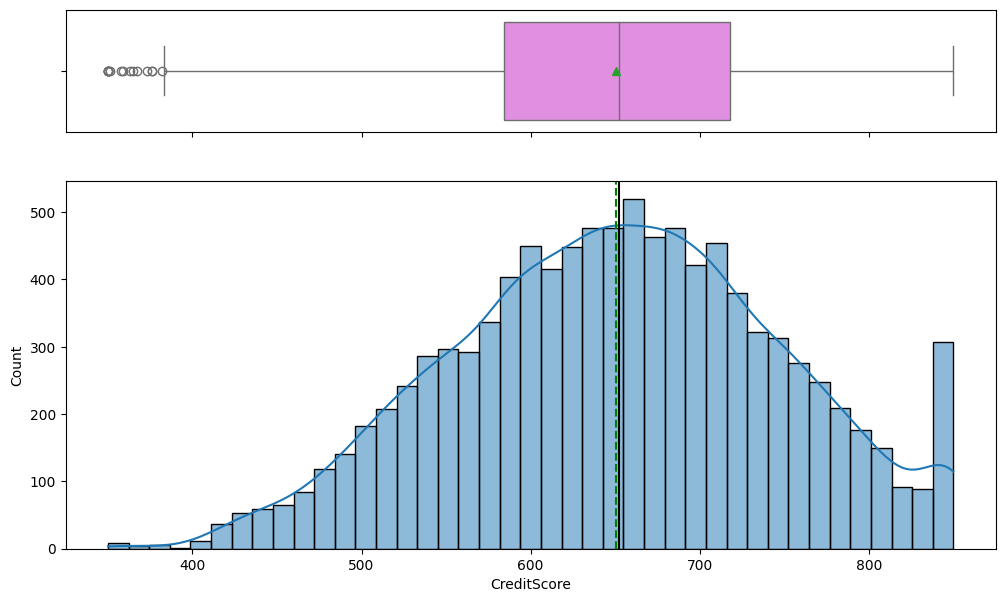

In [ ]:
histogram_boxplot(df,'CreditScore',kde=True)

Credit score :
* Though data appears normally distributed with mean and median hovering around
~ 650, data appears left skewed.
* Outliers on left end of the data spectrum.


Observations on Age

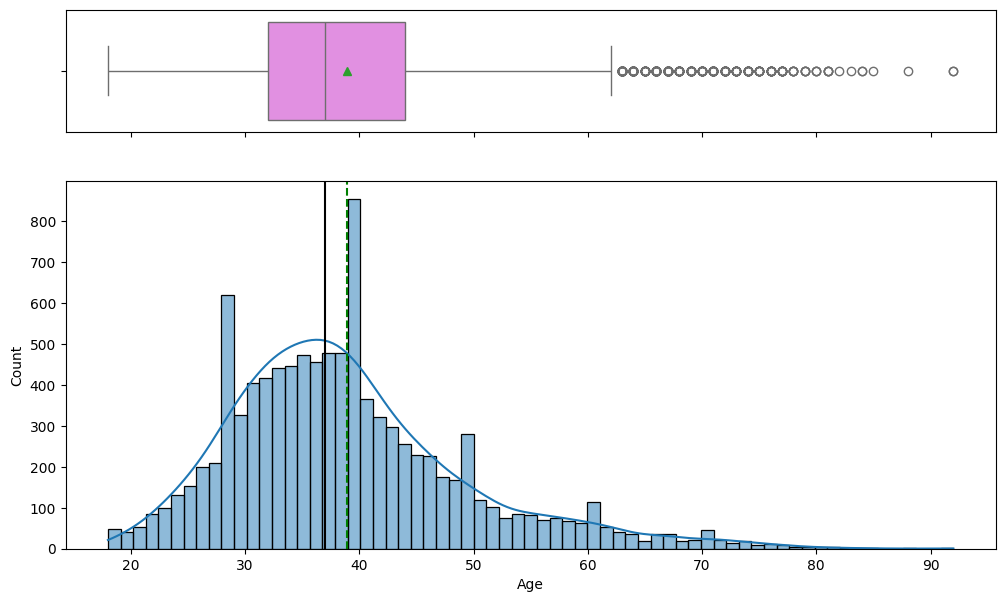

In [ ]:
histogram_boxplot(df,'Age',kde=True)

Age :
* Age is right skewed with median at ~36 and mean at ~38 years, there appears a spike in num of account holders with age of 28ish and 38-40ish with 600 and 800 respectively.
* Outliers on right end above 62 years shows fewer account holders exist with above 62 years of age.


Observations on Tenure

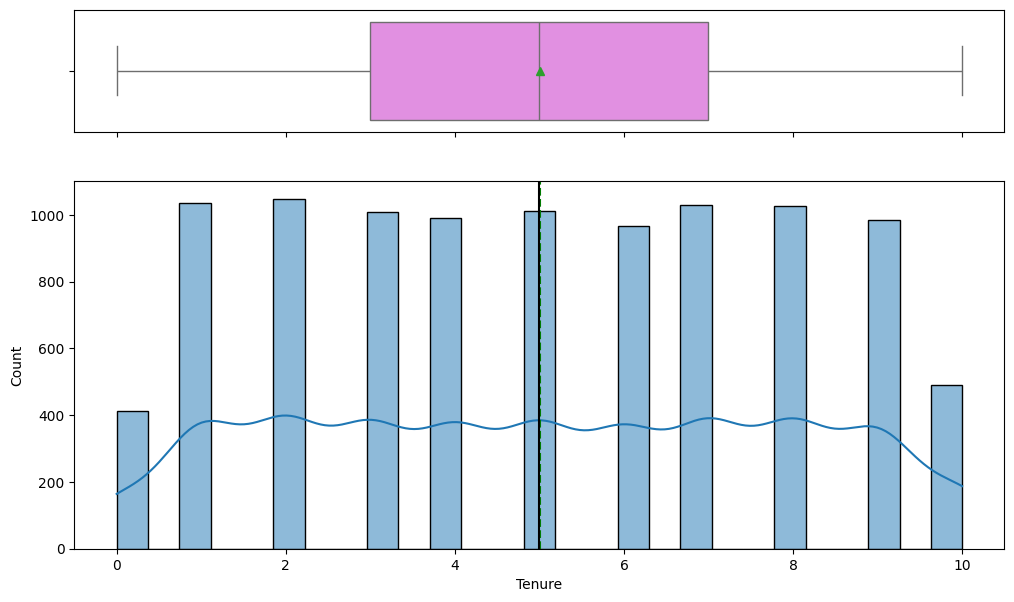

In [ ]:
histogram_boxplot(df,'Tenure',kde=True)

Tenure :
* Tenure data appears uniformly distributed with 0-10 years with peaks at 1,2,7,8 years . Mean and median are at 5.5 years.
* No outliers exist for this column.


Observations on Balance

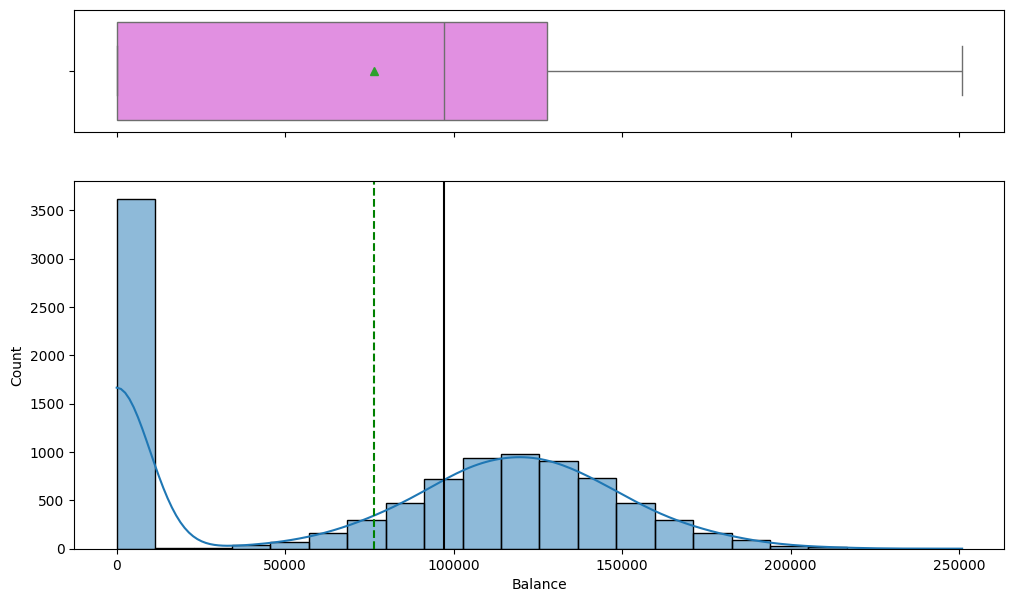

In [ ]:
histogram_boxplot(df,'Balance',kde=True)

Balance :
* Right tailed distribution with majority of account holders[~3500] holding 0 - ~10K though Median at ~95K while mean at ~75K as the count of account holders with 0-10K is higher.
* No outliers observed.


Observations on EstimatedSalary

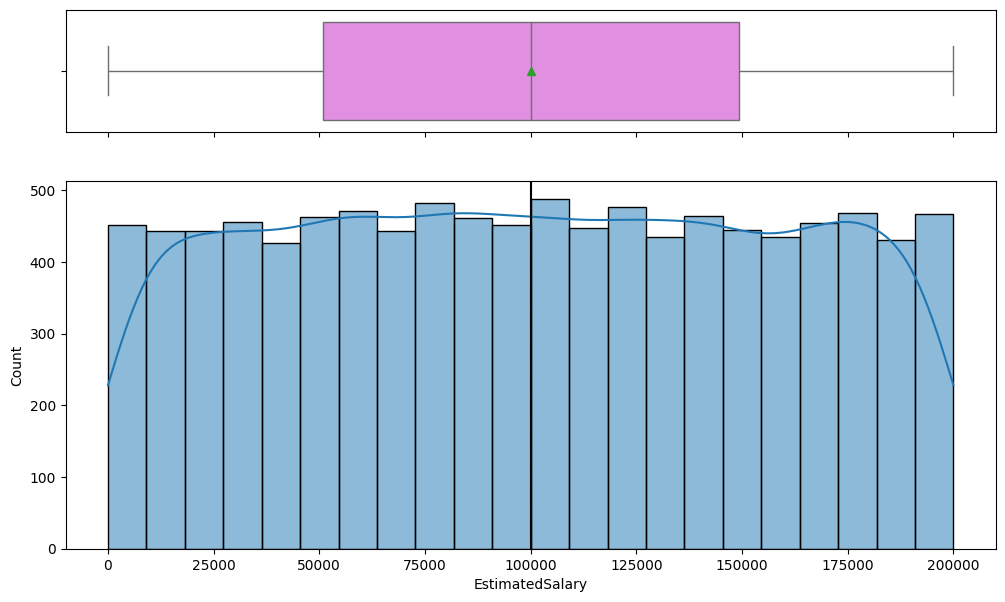

In [ ]:
histogram_boxplot(df,'EstimatedSalary',kde=True)

EstimatedSalary :
* Uniform distribution with mean and median at 100K. Comparable counts at all ranges of salary leading to unifrom distribution.
* No outliers observed.


Observations on Geography

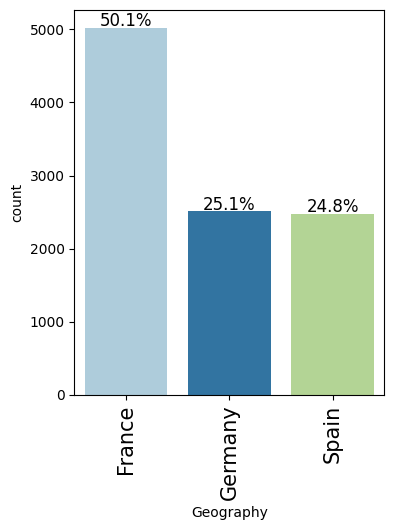

In [ ]:
labeled_barplot(df,"Geography",perc=True)

Geography : 3 distinct values of France, Germany and Spain
* 50% of account holders are from France
* Rest of the accounts are from Germany and Spain almost equally distributed.


Observations on Gender

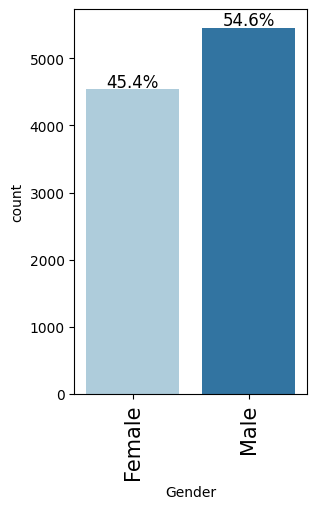

In [ ]:
labeled_barplot(df,"Gender",perc=True)

Gender :
* Male with 54.6% and Female with 45.4%, indicating male dominated account holders in this bank.


Observations on NumOfProducts

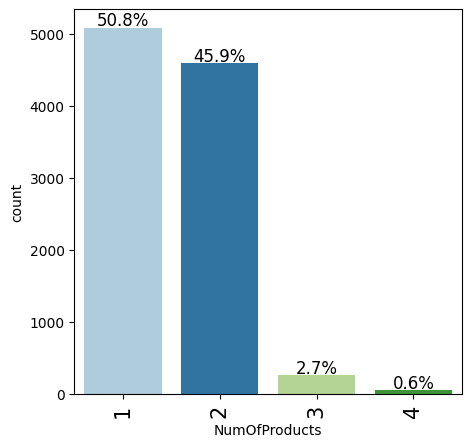

In [ ]:
labeled_barplot(df,"NumOfProducts",perc=True)

NumOfProducts :
* Majority of the customers hold single or 2 products with the bank with single product leading with 50.8%, 2 products at 45.9%
* 2.7% of the customer have 3 products while negligible 0.6% have 4 products.


Observations on HasCrCard

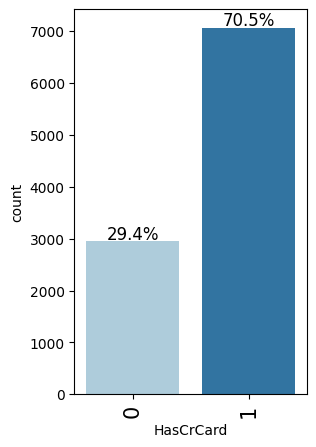

In [ ]:
labeled_barplot(df,"HasCrCard",perc=True)

HasCrCard :
* 70.5% of customer who are account holder with this bank also have credit card with this bank while remaining 29.4% don't.


Observations on IsActiveMember

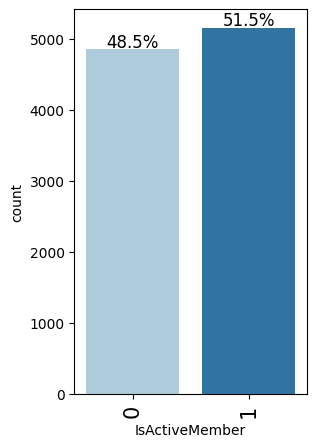

In [ ]:
labeled_barplot(df,"IsActiveMember",perc=True)

IsActiveMember :
* 51.5% of members actively transact or use bank products while comparable amount of 48.5% do not as well.

Observations on Exited

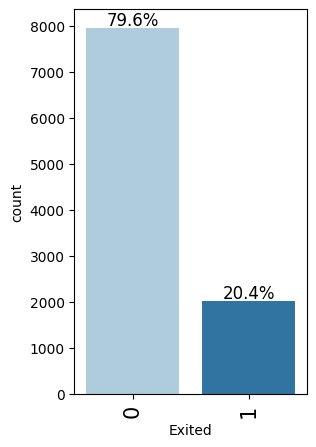

In [ ]:
labeled_barplot(df,"Exited",perc=True)

Exited :
* Imbalanced data with 79.6% of customers still with the bank while 20.4% has left.


### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Correlation

<Axes: >

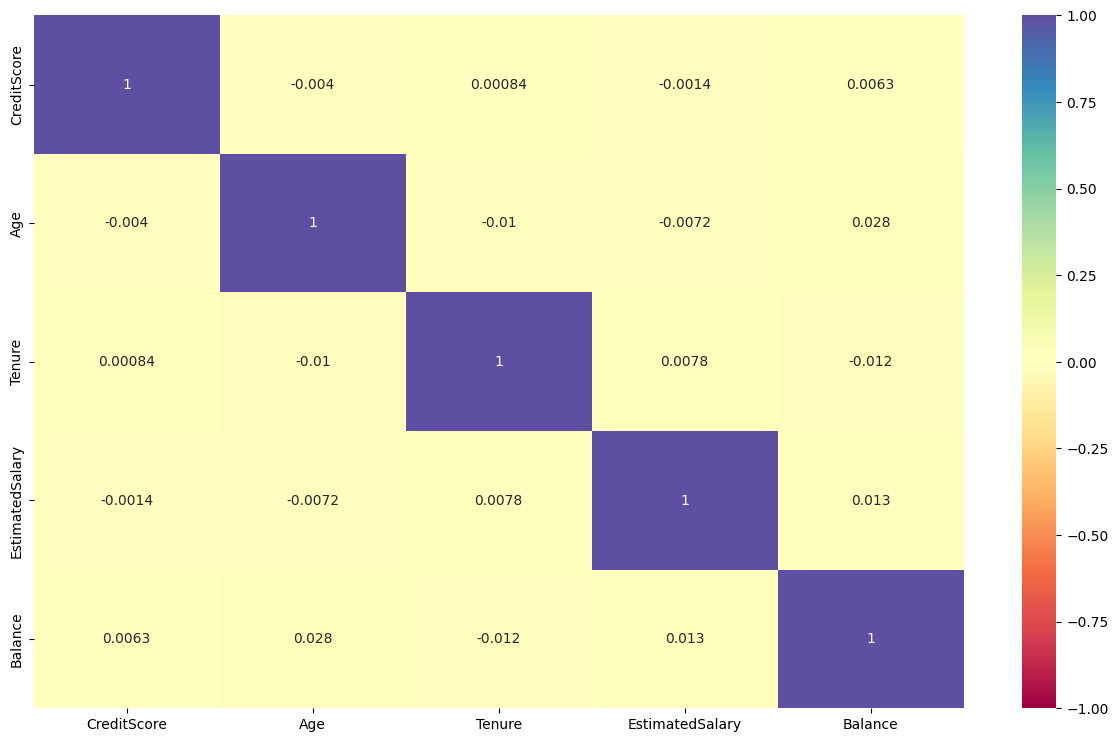

In [ ]:
num_cols = ['CreditScore','Age','Tenure','EstimatedSalary','Balance']
plt.figure(figsize=(15,9))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)

* None of the numerical columns are postively/negatively correlated with each other.
* With zero correlation amongst each other, Age and Balance, Age and Tenure and Tenure and Balance are seemingly a bit correlated slightly above/below zero.

Exited vs CreditScore

<Axes: xlabel='Exited', ylabel='CreditScore'>

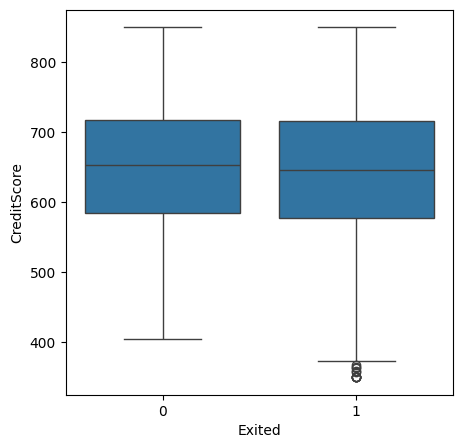

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df,y='CreditScore',x='Exited')

Exited vs CreditScore:
* Median at ~650ish for both categories
* Significant outliers for account holders who left the bank and minimum credit score for account holders who left the bank is lower compared to the other.

Exited vs Age

<Axes: xlabel='Exited', ylabel='Age'>

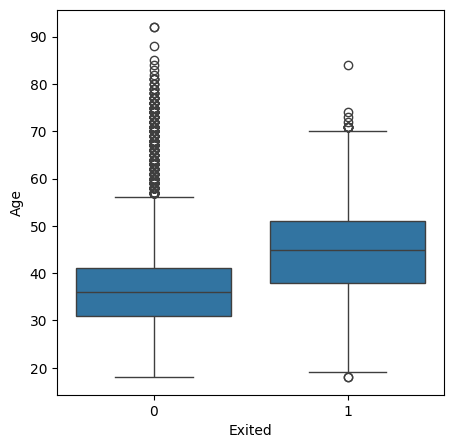

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df,y='Age',x='Exited')

Exited vs Age:
* Median Age of account holder still with the bank is 35 while the median age of account holder who left the bank is a bit higher than the other and is at 45 years.
* Number of outliers for account holders still with bank is significantly higher than its for account holders who left the bank.
* 50% of account holders who are still with the bank are between 30-40 years of age while its higher for people who left the bank with 37-50 years of age.

Exited vs Tenure

<Axes: xlabel='Exited', ylabel='Tenure'>

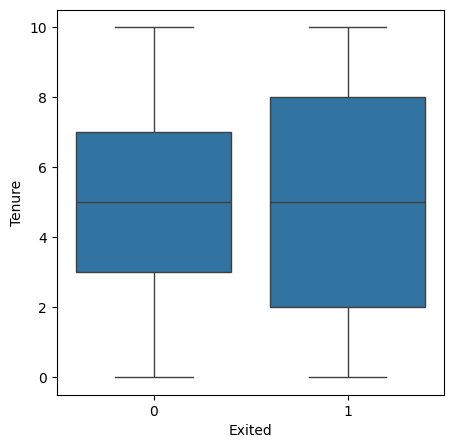

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df,y='Tenure',x='Exited')

Exited vs Tenure:
* Median at 5 years for both categories
* No outliers for both and uniformly distributed data for both categories.

Exited vs Balance

<Axes: xlabel='Exited', ylabel='Balance'>

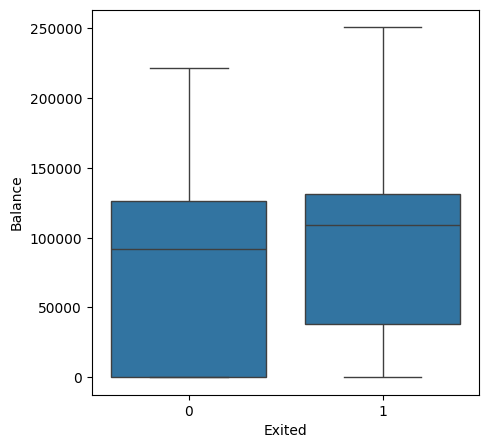

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df,y='Balance',x='Exited')

Exited vs Balance:
* Closer to 0/minimal balance is heavier in people who are still with the bank while the minimal balance for the people who left the bank is higher close to 30K
* No significant outliers for either categories.

Exited vs EstimatedSalary

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

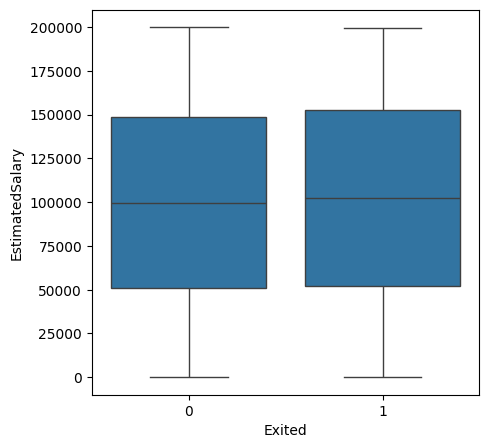

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df,y='EstimatedSalary',x='Exited')

Exited vs EstimatedSalary:
* Median at 100K for both categories and data is uniformly distributed with minimum, median and max at almost same amount.
* No outliers.

Exited vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


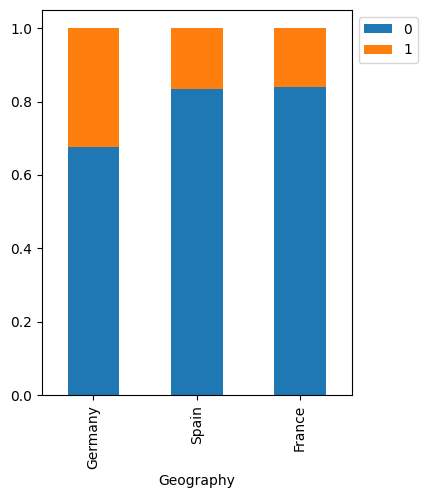

In [ ]:
stacked_barplot(df,'Geography','Exited')

Exited vs Geography: Based on the geography, Against respective countries' total customers' base,
* 32.4% churn in Germany  
* 16.67% churn in Spain
* 16.15% churn in France.
More customers leave from Germany. Please note that its against its own customer base.

Exited vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


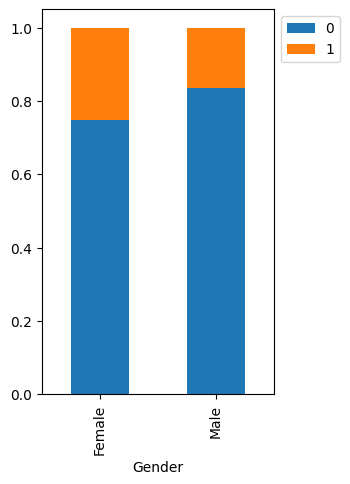

In [ ]:
stacked_barplot(df,'Gender','Exited')

Exited vs Gender: Based on the Gender, Against respective Gender's total customers' base,
* 25% churn in Female category  
* 16.45% churn in Male

More Female customers leave the bank than the male. Please note that its against its own gender total.

Exited vs NumOfProducts

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


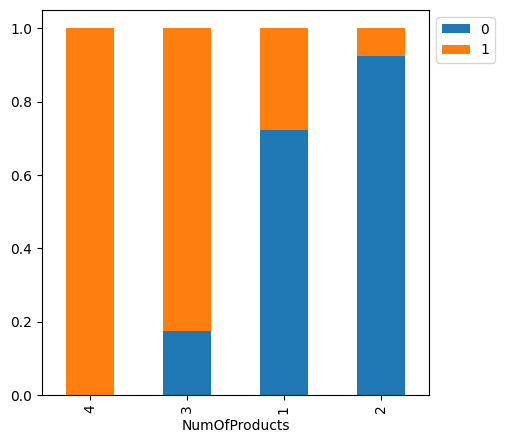

In [ ]:
stacked_barplot(df,'NumOfProducts','Exited')

Exited vs NumOfProducts: Based on the NumOfProducts that customer holds, Against the number of products held by customers,
* All customers 100% [60] with 4 products leave the bank
* 82.7% Churn with 3 products
* 27.7% Churn with 1 product
* 7.5% Churn with 2 products
More customers with 4 products churn while customers with 2 products are the least to churn. Please note that its against its own total customer base.
* So, rather than letting customers get too many products from the bank, they can focus on 1/2 products as those have least churn.

Exited vs HasCrCard

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


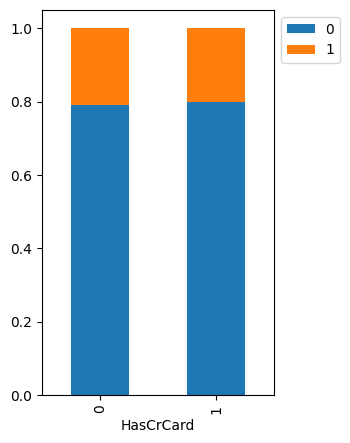

In [ ]:
stacked_barplot(df,'HasCrCard','Exited')

Exited vs HasCrCard: Based on the whether customer has creditcard or not, Against respective categories' total customer's base,
* Almost same % 20% churn in both categories. Please note that percentage is against its own customer base.

Exited vs IsActiveMember

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


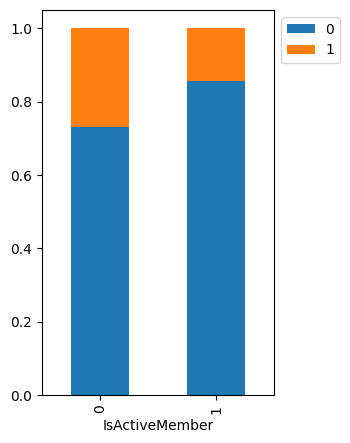

In [ ]:
stacked_barplot(df,'IsActiveMember','Exited')

Exited vs IsActiveMember:
* Based on the the member actively transacts or not, Against respective categories' total customers' base,
  * 26.8% churn is present if the member is inactive.
  * 14.26% churn is present if the member is actively transacting with the bank.
* More customers churn if they are inactive. Please note that its against its own customer base. If they are inactive, there is no active transactions made which make them withdraw their account from the bank.

## Data Preprocessing

### Outlier Detection

Outlier treatment is generally recommended to be performed **before** splitting the dataset into training, validation, and test subsets. Here’s why this approach is advisable:

1. **Consistent Data Processing**: By handling outliers before splitting, you ensure consistent treatment across all parts of your dataset. This **prevents information leakage from the test set into training**, which could occur if outliers are handled separately in each subset.

2. **Improved Model Performance**: Outliers can significantly affect model training, especially in models sensitive to anomalous data points. Treating them beforehand allows the model to learn from a data distribution that better represents the central tendencies, leading to improved accuracy and generalization.

3. **Uniform Data Distribution**: Ensuring that the data distribution remains uniform and consistent across training, validation, and test sets helps in detecting models that are more robust and generalizable.

In [ ]:
#Function to detect outliers
def detectOutliers(data, feature):
  """
  Function to detect outliers
  data: dataframe
  feature: column
  returns Dataframe with values for columns found to have outliers from EDA
  """
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  iqr = q3-q1
  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr
  df_data = data[((data[feature] < lower)   | (data[feature] > upper))][feature].agg({'Minimum': 'min','Maximum': 'max','OutlierCnt':'count'})
  newRows = pd.DataFrame([[lower],[upper]],index=["Lower","Upper"],columns=[feature])
  return pd.concat([newRows,df_data])

In [ ]:
#columns found to have outliers from EDA, detects outliers for each of these columns and present outlierStats
outlier_num_cols = ['CreditScore', 'Age']
outlierdf = []
for col in outlier_num_cols:
  df_outliers = detectOutliers(df,col)
  outlierdf.append(df_outliers)
outlierStats = pd.concat(outlierdf,axis=1)
outlierStats

CreditScore    Age
Lower             383.0   14.0
Upper             919.0   62.0
Minimum           350.0   63.0
Maximum           382.0   92.0
OutlierCnt         15.0  359.0

Outlier counts are not high and range to which outliers extend in either directions for CreditScore And Age do not have huge disparities and might be helpful in defining the impact of creditScore and Age against Exited dependent variable.
So, retaining the outliers the way its present.

### Train Testing Validation Split

In [ ]:
X=df.drop('Exited',axis=1)
y=df['Exited']
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=1,stratify=y_temp)

In [ ]:
print("Y_train",y_train.value_counts(normalize=True))
print("Y_test",y_test.value_counts(normalize=True))
print("Y_val",y_val.value_counts(normalize=True))

Y_train Exited
0    0.796286
1    0.203714
Name: proportion, dtype: float64
Y_test Exited
0    0.79619
1    0.20381
Name: proportion, dtype: float64
Y_val Exited
0    0.796667
1    0.203333
Name: proportion, dtype: float64


### Categorical Variables Encoding for Training, test and validaton

In [ ]:
cols = X_train.select_dtypes('object')
for col in cols:
  print(X_train[col].value_counts())

Geography
France     3496
Spain      1754
Germany    1750
Name: count, dtype: int64
Gender
Male      3800
Female    3200
Name: count, dtype: int64


In [ ]:
cols = X_val.select_dtypes('object')
for col in cols:
  print(X_val[col].value_counts())

Geography
France     458
Spain      224
Germany    218
Name: count, dtype: int64
Gender
Male      499
Female    401
Name: count, dtype: int64


In [ ]:
cols = X_test.select_dtypes('object')
for col in cols:
  print(X_test[col].value_counts())

Geography
France     1060
Germany     541
Spain       499
Name: count, dtype: int64
Gender
Male      1158
Female     942
Name: count, dtype: int64


All categorical columns -  have all 3 distinct values for Geography and 2 distinct values for Gender, so, we can go ahead with dummy encoding for these 2 variables.

In [ ]:
#Get Dummies for all categorical columns in Training, test and validation
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype('float')

X_val = pd.get_dummies(X_val,drop_first=True)
X_val = X_val.astype('float')

X_test = pd.get_dummies(X_test,drop_first=True)
X_test = X_test.astype('float')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 7635 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7000 non-null   float64
 1   Age                7000 non-null   float64
 2   Tenure             7000 non-null   float64
 3   Balance            7000 non-null   float64
 4   NumOfProducts      7000 non-null   float64
 5   HasCrCard          7000 non-null   float64
 6   IsActiveMember     7000 non-null   float64
 7   EstimatedSalary    7000 non-null   float64
 8   Geography_Germany  7000 non-null   float64
 9   Geography_Spain    7000 non-null   float64
 10  Gender_Male        7000 non-null   float64
dtypes: float64(11)
memory usage: 656.2 KB


In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 2160 to 6524
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        900 non-null    float64
 1   Age                900 non-null    float64
 2   Tenure             900 non-null    float64
 3   Balance            900 non-null    float64
 4   NumOfProducts      900 non-null    float64
 5   HasCrCard          900 non-null    float64
 6   IsActiveMember     900 non-null    float64
 7   EstimatedSalary    900 non-null    float64
 8   Geography_Germany  900 non-null    float64
 9   Geography_Spain    900 non-null    float64
 10  Gender_Male        900 non-null    float64
dtypes: float64(11)
memory usage: 84.4 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 1438 to 2171
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2100 non-null   float64
 1   Age                2100 non-null   float64
 2   Tenure             2100 non-null   float64
 3   Balance            2100 non-null   float64
 4   NumOfProducts      2100 non-null   float64
 5   HasCrCard          2100 non-null   float64
 6   IsActiveMember     2100 non-null   float64
 7   EstimatedSalary    2100 non-null   float64
 8   Geography_Germany  2100 non-null   float64
 9   Geography_Spain    2100 non-null   float64
 10  Gender_Male        2100 non-null   float64
dtypes: float64(11)
memory usage: 196.9 KB


All three datsets training, test and validation have their 2 Objects categorical columns encoded, all 3 datasets have same no of columns, so no dataset has lesser categorical columns than the other. All categorical values have been represented in all 3 datasets.

### Data Normalization

In [ ]:
#Before normalization
X_train.head(10)

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7635        516.0  29.0     2.0  104982.57            1.0        1.0   
5284        745.0  51.0     3.0   99183.90            1.0        1.0   
1457        850.0  66.0     4.0       0.00            2.0        0.0   
4785        510.0  22.0     3.0  156834.34            1.0        0.0   
9158        540.0  31.0    10.0  118158.74            1.0        1.0   
9891        680.0  49.0    10.0       0.00            2.0        1.0   
3257        707.0  58.0     3.0  102346.86            1.0        1.0   
1395        705.0  46.0     7.0       0.00            2.0        1.0   
8038        613.0  50.0     5.0  101242.98            2.0        1.0   
2867        559.0  27.0     1.0       0.00            1.0        0.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7635             0.0        157378.50                0.0              0.0   
5284             1.0         28922.25                1.0              0.0   
1457             1.0         64350.80                0.0              0.0   
4785             0.0         44374.44                0.0              0.0   
9158             1.0        158027.57                0.0              1.0   
9891             0.0        187008.45                0.0              0.0   
3257             1.0        114672.64                0.0              0.0   
1395             0.0        117273.35                0.0              1.0   
8038             0.0         12493.61                1.0              0.0   
2867             1.0          1050.33                0.0              1.0   

      Gender_Male  
7635          0.0  
5284          1.0  
1457          1.0  
4785          0.0  
9158          0.0  
9891          1.0  
3257          0.0  
1395          1.0  
8038          0.0  
2867          0.0

In [ ]:
#Before normalization
X_test.head(10)

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1438        504.0  56.0     9.0  104217.30            1.0        0.0   
6500        582.0  43.0     5.0  153313.67            1.0        0.0   
8636        601.0  46.0     2.0   99786.07            1.0        1.0   
7117        564.0  31.0     5.0  121461.87            1.0        1.0   
8310        702.0  43.0     6.0  116121.67            1.0        1.0   
6387        513.0  43.0     9.0       0.00            2.0        1.0   
6819        568.0  39.0     5.0       0.00            2.0        1.0   
5623        586.0  42.0     6.0       0.00            2.0        1.0   
7869        651.0  45.0     8.0   95922.90            1.0        1.0   
4948        772.0  39.0     4.0  122486.11            2.0        1.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
1438             0.0         55857.48                1.0              0.0   
6500             0.0        170563.73                0.0              0.0   
8636             1.0         32683.88                0.0              0.0   
7117             1.0         20432.09                0.0              1.0   
8310             0.0         61602.42                0.0              1.0   
6387             0.0        152499.80                0.0              0.0   
6819             1.0        129569.92                0.0              1.0   
5623             1.0        123410.23                0.0              1.0   
7869             0.0         84782.42                0.0              1.0   
4948             1.0        140709.25                0.0              1.0   

      Gender_Male  
1438          1.0  
6500          0.0  
8636          1.0  
7117          1.0  
8310          1.0  
6387          0.0  
6819          1.0  
5623          1.0  
7869          0.0  
4948          0.0

In [ ]:
#Before normalization
X_val.head(10)

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2160        727.0  28.0     5.0       0.00            2.0        0.0   
2040        547.0  38.0     5.0  167539.97            1.0        0.0   
1761        662.0  36.0     4.0  166909.20            2.0        1.0   
3774        850.0  61.0     1.0       0.00            1.0        1.0   
8253        750.0  36.0     7.0  136492.92            3.0        1.0   
7150        699.0  32.0     4.0  110559.46            1.0        1.0   
9648        608.0  40.0     7.0   96202.32            1.0        0.0   
1730        850.0  20.0     7.0       0.00            2.0        1.0   
6006        529.0  31.0     5.0       0.00            2.0        1.0   
2917        698.0  57.0     6.0  136325.48            2.0        1.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2160             1.0         19653.08                0.0              0.0   
2040             1.0        159207.34                0.0              0.0   
1761             0.0        138871.12                0.0              0.0   
3774             0.0         53067.83                0.0              0.0   
8253             1.0         26500.29                0.0              0.0   
7150             1.0        127429.56                0.0              0.0   
9648             0.0        161154.85                1.0              0.0   
1730             0.0         31288.77                0.0              0.0   
6006             0.0         26817.23                0.0              0.0   
2917             1.0         72549.27                0.0              0.0   

      Gender_Male  
2160          1.0  
2040          0.0  
1761          0.0  
3774          1.0  
8253          1.0  
7150          0.0  
9648          0.0  
1730          1.0  
6006          0.0  
2917          1.0

In [ ]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols]) # fit_trainsform from standardScaler for training
X_test[num_cols] = sc.transform(X_test[num_cols]) # applying the transform on testing
X_val[num_cols] = sc.transform(X_val[num_cols]) # applying the transform on validation

In [ ]:
#After normalization
X_train.head(10)

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
7635    -1.385480 -0.938920 -1.035870  0.460208            1.0        1.0   
5284     0.979538  1.142223 -0.689110  0.367663            1.0        1.0   
1457     2.063934  2.561184 -0.342351 -1.215278            2.0        0.0   
4785    -1.447445 -1.601102 -0.689110  1.287744            1.0        0.0   
9158    -1.137618 -0.749725  1.738206  0.670495            1.0        1.0   
9891     0.308245  0.953028  1.738206 -1.215278            2.0        1.0   
3257     0.587089  1.804405 -0.689110  0.418143            1.0        1.0   
1395     0.566434  0.669236  0.697928 -1.215278            2.0        1.0   
8038    -0.383704  1.047626  0.004409  0.400525            2.0        1.0   
2867    -0.941394 -1.128115 -1.382629 -1.215278            1.0        0.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7635             0.0         1.012113                0.0              0.0   
5284             1.0        -1.235424                1.0              0.0   
1457             1.0        -0.615548                0.0              0.0   
4785             0.0        -0.965064                0.0              0.0   
9158             1.0         1.023469                0.0              1.0   
9891             0.0         1.530533                0.0              0.0   
3257             1.0         0.264909                0.0              0.0   
1395             0.0         0.310412                0.0              1.0   
8038             0.0        -1.522868                1.0              0.0   
2867             1.0        -1.723085                0.0              1.0   

      Gender_Male  
7635          0.0  
5284          1.0  
1457          1.0  
4785          0.0  
9158          0.0  
9891          1.0  
3257          0.0  
1395          1.0  
8038          0.0  
2867          0.0

In [ ]:
#After normalization
X_test.head(10)

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
1438    -1.509411  1.615210  1.391447  0.447994            1.0        0.0   
6500    -0.703859  0.385444  0.004409  1.231556            1.0        0.0   
8636    -0.507635  0.669236 -1.035870  0.377274            1.0        1.0   
7117    -0.889756 -0.749725  0.004409  0.723212            1.0        1.0   
8310     0.535451  0.385444  0.351168  0.637984            1.0        1.0   
6387    -1.416463  0.385444  1.391447 -1.215278            2.0        1.0   
6819    -0.848445  0.007054  0.004409 -1.215278            2.0        1.0   
5623    -0.662549  0.290847  0.351168 -1.215278            2.0        1.0   
7869     0.008745  0.574639  1.044687  0.315619            1.0        1.0   
4948     1.258383  0.007054 -0.342351  0.739558            2.0        1.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
1438             0.0        -0.764151                1.0              0.0   
6500             0.0         1.242808                0.0              0.0   
8636             1.0        -1.169608                0.0              0.0   
7117             1.0        -1.383972                0.0              1.0   
8310             0.0        -0.663635                0.0              1.0   
6387             0.0         0.926752                0.0              0.0   
6819             1.0         0.525559                0.0              1.0   
5623             1.0         0.417786                0.0              1.0   
7869             0.0        -0.258066                0.0              1.0   
4948             1.0         0.720459                0.0              1.0   

      Gender_Male  
1438          1.0  
6500          0.0  
8636          1.0  
7117          1.0  
8310          1.0  
6387          0.0  
6819          1.0  
5623          1.0  
7869          0.0  
4948          0.0

In [ ]:
#After normalization
X_val.head(10)

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
2160     0.793641 -1.033517  0.004409 -1.215278            2.0        0.0   
2040    -1.065325 -0.087543  0.004409  1.458602            1.0        0.0   
1761     0.122348 -0.276738 -0.342351  1.448536            2.0        1.0   
3774     2.063934  2.088197 -1.382629 -1.215278            1.0        1.0   
8253     1.031176 -0.276738  0.697928  0.963102            3.0        1.0   
7150     0.504469 -0.655128 -0.342351  0.549213            1.0        1.0   
9648    -0.435342  0.101652  0.697928  0.320078            1.0        0.0   
1730     2.063934 -1.790297  0.697928 -1.215278            2.0        1.0   
6006    -1.251221 -0.749725  0.004409 -1.215278            2.0        1.0   
2917     0.494141  1.709808  0.351168  0.960430            2.0        1.0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2160             1.0        -1.397602                0.0              0.0   
2040             1.0         1.044111                0.0              0.0   
1761             0.0         0.688298                0.0              0.0   
3774             0.0        -0.812960                0.0              0.0   
8253             1.0        -1.277800                0.0              0.0   
7150             1.0         0.488111                0.0              0.0   
9648             0.0         1.078186                1.0              0.0   
1730             0.0        -1.194018                0.0              0.0   
6006             0.0        -1.272254                0.0              0.0   
2917             1.0        -0.472103                0.0              0.0   

      Gender_Male  
2160          1.0  
2040          0.0  
1761          0.0  
3774          1.0  
8253          1.0  
7150          0.0  
9648          0.0  
1730          1.0  
6006          0.0  
2917          1.0

Numerical columns - Age, Tenure, CreditScore,Balance,EstimatedSalary WERE of different scale and has been scaled above to get numerically represented on same scale within the column.

## Model Building

### Model Evaluation Criterion

The nature of predictions made by the classification model will translate as follows:

* True positives (TP) are failures correctly predicted by the model.
* False negatives (FN) are real failures in a generator where there is no detection by model.
* False positives (FP) are failure detections in a generator where there is no failure.

Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

Since we are focusing on the churn, so that management can focus their efforts on retaining the customers, if a model predicts that customer wont leave but in reality if he/she leaves, that's a bigger problem. So, the criterion will be recall.


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

### Neural Network with SGD Optimizer

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=50
batch_size=32
lr = 0.001

In [ ]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

Default Model :
* SGD Optimizer with default learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: No Dropout/Batch_Norm,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_sgd_default = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_sgd_default.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu',kernel_initializer='he_normal'))
# Add second hidden layer with 64 neurons and 'relu' activation
model_sgd_default.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_sgd_default.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_sgd_default.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.SGD(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_sgd_default.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* 2nd hidden layer has 128 [o/p of first hidden layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
# Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
history_sgd_default = model_sgd_default.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=batch_size,epochs=epochs)
end=time.time()

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.5824 - recall: 0.1942 - val_loss: 0.5058 - val_recall: 0.0492
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4923 - recall: 0.0454 - val_loss: 0.4867 - val_recall: 0.0710
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4751 - recall: 0.0711 - val_loss: 0.4753 - val_recall: 0.0929
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4644 - recall: 0.0962 - val_loss: 0.4677 - val_recall: 0.1257
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4572 - recall: 0.1162 - val_loss: 0.4625 - val_recall: 0.1366
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4520 - recall: 0.1370 - val_loss: 0.4585 - val_recall: 0.1639
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4480 - recall: 0.1516 - val_loss: 0.4552 - val_recall: 0.1694
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4447 - recall: 0.1664 - val_loss: 0.4525 - val_recall: 0.1749
Epoch 9/

**Plots for Loss and recall**

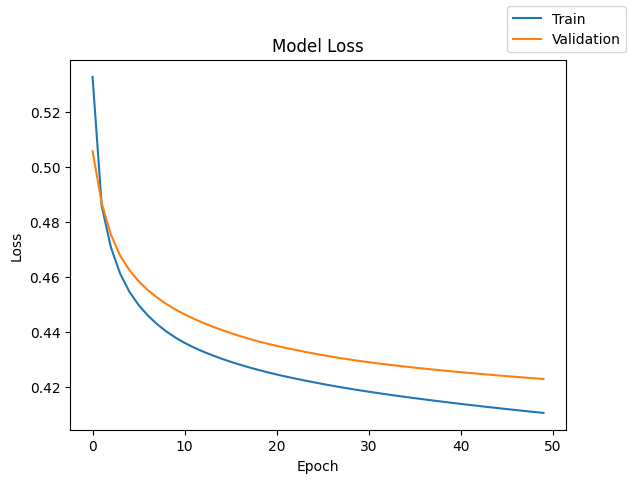

In [ ]:
plot(history_sgd_default,"loss")

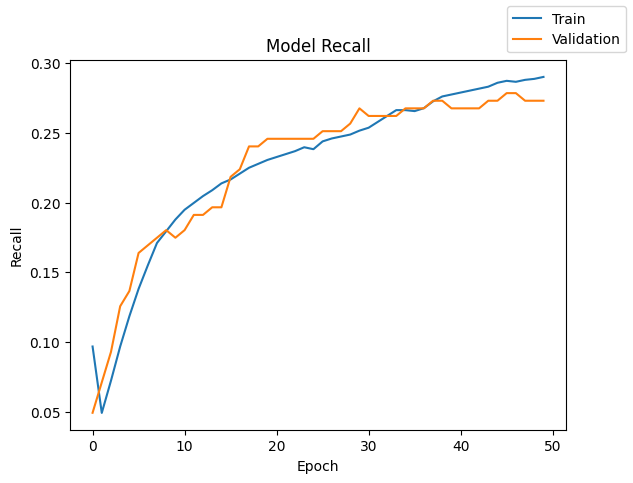

In [ ]:
plot(history_sgd_default,"recall")

For both training and Validation,
* Loss: Loss sharply declines.
* Recall: Recall is lower, need to see with different optimizers. Might need to increase epochs as well for convergence

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_sgd_default.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.30434782608695654

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_sgd_default.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.273224043715847

In [ ]:
# Merge data into results
model_name = 'NN with SGD'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],50,32,"SGD",[0.001,"-"],"he_normal","-",
                                 history_sgd_default.history['loss'][-1],history_sgd_default.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
NN with SGD                2                [128, 64]   

            activation function - hidden layer   # epochs  batch size  \
NN with SGD                        [relu, relu]        50          32   

            optimizer learning rate, momentum weight initializer  \
NN with SGD       SGD              [0.001, -]          he_normal   

            regularization  train loss  validation loss  train Recall  \
NN with SGD              -     0.41044         0.422814      0.304348   

             validation Recall  time (secs)  
NN with SGD           0.273224        62.22

Recall for training: 30% and Validation: 27%, both training and validation recall scores are pathetically low. Need to consider other optimizers, learning rate and other hyper parameters for further tuning.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5574
           1       0.66      0.30      0.42      1426

    accuracy                           0.83      7000
   macro avg       0.75      0.63      0.66      7000
weighted avg       0.81      0.83      0.80      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       717
           1       0.60      0.27      0.38       183

    accuracy                           0.82       900
   macro avg       0.72      0.61      0.63       900
weighted avg       0.79      0.82      0.79       900



As per classification report, Recall for training: 30% and Validation: 27%, both training and validation recall scores are pathetically low. Need to consider other optimizers, learning rate and other hyper parameters for further tuning.

**Confusion Matrix for training and validation**

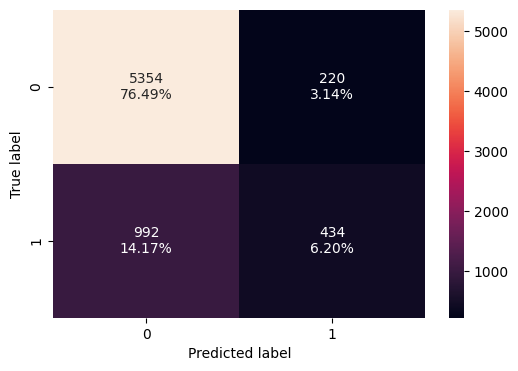

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

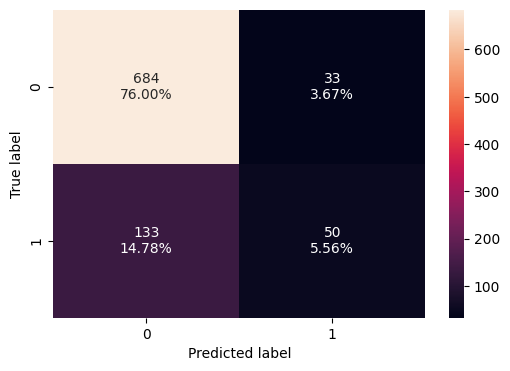

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per confusion matrix, Recall for training: 30% and Validation: 27%, both training and validation recall scores are pathetically low. Need to consider other optimizers, learning rate and other hyper parameters for further tuning.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
# Starting with default batch_size, increasing epochs from 50, learning rate as 0.001
epochs=50
batch_size=32
lr = 0.001

In [ ]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

Default Model :
* Adam Optimizer with default learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: No Dropout/Batch_Norm,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_adam.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu', kernel_initializer='he_normal'))
# Add second hidden layer with 64 neurons and 'relu' activation
model_adam.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model_adam.compile(loss='binary_crossentropy', metrics=[metric],optimizer=optimizer)

In [ ]:
#Print the summary of the model configured.
model_adam.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* 2nd hidden layer has 128 [o/p of first hidden layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
# Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
history_adam = model_adam.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=batch_size,epochs=epochs)
end=time.time()

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4734 - recall: 0.2017 - val_loss: 0.4181 - val_recall: 0.2678
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4112 - recall: 0.3169 - val_loss: 0.4086 - val_recall: 0.3279
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3939 - recall: 0.3696 - val_loss: 0.4033 - val_recall: 0.3770
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3809 - recall: 0.3924 - val_loss: 0.3964 - val_recall: 0.4098
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3699 - recall: 0.4172 - val_loss: 0.3911 - val_recall: 0.4044
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3614 - recall: 0.4344 - val_loss: 0.3875 - val_recall: 0.4098
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3537 - recall: 0.4570 - val_loss: 0.3852 - val_recall: 0.4153
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3472 - recall: 0.4748 - val_loss: 0.3831 - val_recall: 0.4208
Epoch 9/

**Plots for Loss and recall**

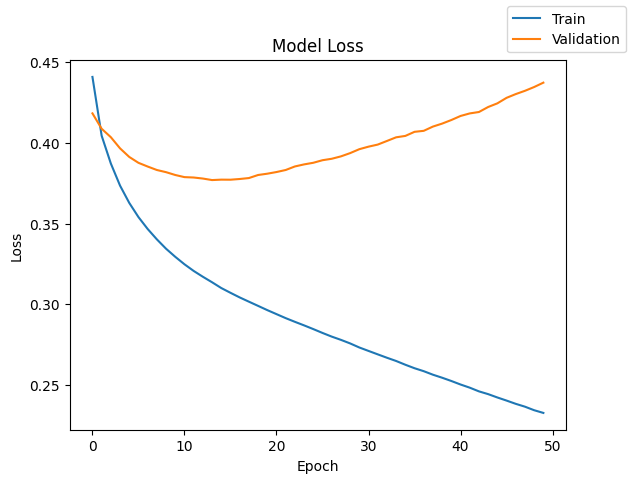

In [ ]:
plot(history_adam,"loss")

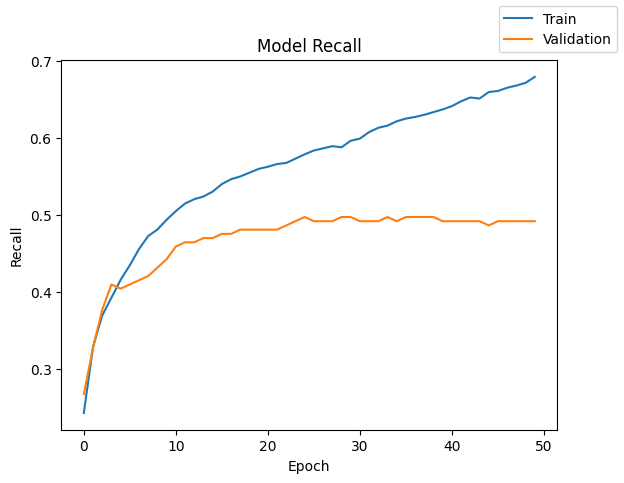

In [ ]:
plot(history_adam,"recall")

* Loss : Training loss reduces as epochs go while validation loss rises.
* Recall: Recall for both training and validation has improved from SGD to Adam. But area between the curves is high and will take time for convergence.

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7237026647966339

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.4918032786885246

In [ ]:
# Merge data into results
model_name = 'NN with Adam'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)                                                                                                                                                                                                                                                                               results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],50,32,"Adam",[0.001,"-"],"he_normal","-",
                                 history_adam.history['loss'][-1],history_adam.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
NN with SGD                 2                [128, 64]   
NN with Adam                2                [128, 64]   

             activation function - hidden layer   # epochs  batch size  \
NN with SGD                         [relu, relu]        50          32   
NN with Adam                        [relu, relu]        50          32   

             optimizer learning rate, momentum weight initializer  \
NN with SGD        SGD              [0.001, -]          he_normal   
NN with Adam      Adam              [0.001, -]          he_normal   

             regularization  train loss  validation loss  train Recall  \
NN with SGD               -    0.410440         0.422814      0.304348   
NN with Adam              -    0.232979         0.437038      0.723703   

              validation Recall  time (secs)  
NN with SGD            0.273224        62.22  
NN with Adam           0.491803        68.36

Recall for training:72% and Validation: 48.6%
Though it has improved from SGD to Adam, model has not been generalizing well and is overfitting

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5574
           1       0.83      0.72      0.77      1426

    accuracy                           0.91      7000
   macro avg       0.88      0.84      0.86      7000
weighted avg       0.91      0.91      0.91      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       717
           1       0.58      0.49      0.53       183

    accuracy                           0.83       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.82      0.83      0.82       900



As per classification report, Recall for training:72% and Validation: 48.6%
Though it has improved from SGD to Adam, model has not been generalizing well and is overfitting

**Confusion Matrix for training and validation**

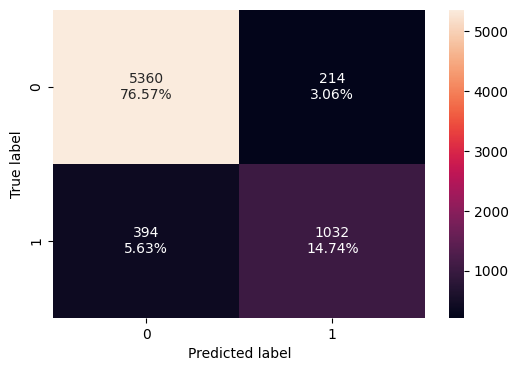

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

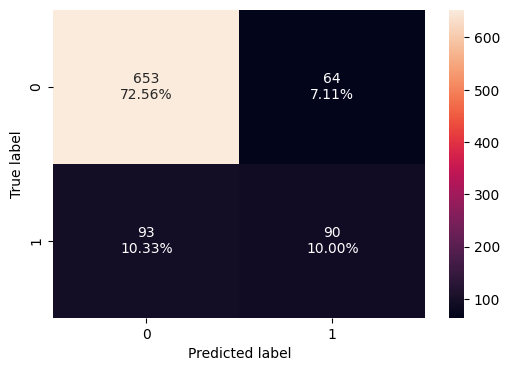

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per confusion matrix, Recall for training:72% and Validation: 48.6%
Though it has improved from SGD to Adam, model has not been generalizing well and is overfitting

### Neural Network with Adam Optimizer and Dropout

In [ ]:
# Starting with default batch_size, increasing epochs from 50 to 100, learning rate as 0.001
epochs=100
batch_size=32
lr = 0.001

In [ ]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

Adam with Dropout Model :
* Adam Optimizer with default learning Rate,
* 1 i/p layer - 32 neurons with relu as activation functions,
* 3 Hidden layers - 128,64,32 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout after i/p,Dropout after 1st 2 hidden layers
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_do = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
#model_adam.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu', kernel_initializer='he_normal'))
# Add second hidden layer with 64 neurons and 'relu' activation
#model_adam.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))

# Add i/p layer with 32 neurons and 'relu' activation
model_adam_do.add(Dense(input_dim=X_train.shape[1], units=32, activation='relu', kernel_initializer='he_normal'))

# Add Dropout layer with 0.2
model_adam_do.add(Dropout(0.2))

# Add Second hidden layer with 128 neurons and 'relu' activation
model_adam_do.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
# Add third hidden layer with 64 neurons and 'relu' activation
model_adam_do.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))

# Add Dropout layer with 0.1
model_adam_do.add(Dropout(0.1))

# Add fourth hidden layer with 32 neurons and 'relu' activation
model_adam_do.add(Dense(units=32, activation='relu', kernel_initializer='he_normal'))

# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_do.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model_adam_do.compile(loss='binary_crossentropy', metrics=[metric],optimizer=optimizer)

In [ ]:
#Print the summary of the model configured.
model_adam_do.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* Params for i/p, followed by Dropout
* Params for 2 hidden layers followed by Dropout
* Params for another Hidden layer
* Params for o/p layer

In [ ]:
# Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
history_adam_do = model_adam_do.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=batch_size,epochs=epochs)
end=time.time()

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5186 - recall: 0.0868 - val_loss: 0.4385 - val_recall: 0.1585
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4513 - recall: 0.1599 - val_loss: 0.4239 - val_recall: 0.2623
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4367 - recall: 0.2246 - val_loss: 0.4156 - val_recall: 0.2951
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4303 - recall: 0.2355 - val_loss: 0.4114 - val_recall: 0.3115
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4239 - recall: 0.2625 - val_loss: 0.4072 - val_recall: 0.3716
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4151 - recall: 0.3110 - val_loss: 0.4044 - val_recall: 0.3552
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4043 - recall: 0.3425 - val_loss: 0.4031 - val_recall: 0.3770
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3993 - recall: 0.3545 - val_loss: 0.3961 - val_recall: 0.3770


**Plots for Loss and recall**

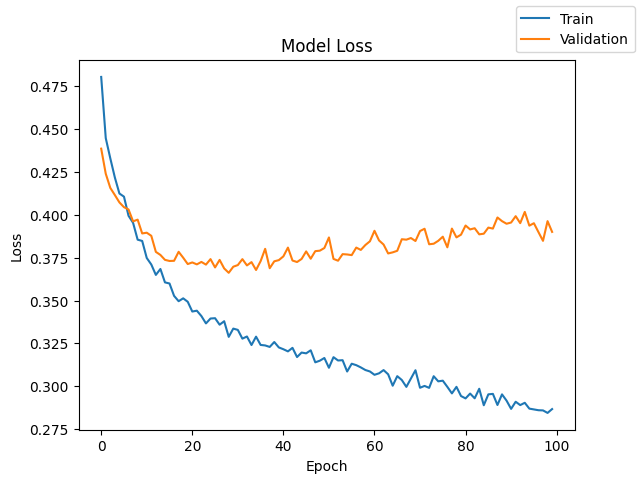

In [ ]:
plot(history_adam_do,"loss")

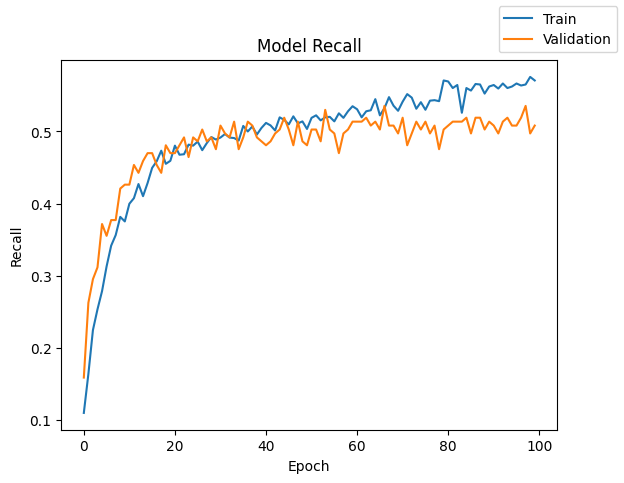

In [ ]:
plot(history_adam_do,"recall")

* Loss : Both training and validation loss has been decreasing but there is a lot of oscillations, probably increasing the learning rate will help dampen the oscillations? Need to check.
* Recall: Recall scores for training and validation are close and they happen to converge around 20-40 epochs. But with Adam to Adam with Dropout, Recall for validation has a mild bump from 49% to 50% while training recall values dropped from 72% to 59%, thus reducing overfitting.

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_do.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.6928471248246845

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_do.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.5081967213114754

In [ ]:
# Merge data into results
model_name = 'NN with Adam - 2 Dropout'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)                                                                                                                                                                                                                                                                               results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [3,[128,64,32],["relu","relu","relu"],100,32,"Adam",[0.001,"-"],"he_normal",["Dropout(0.2)","Dropout(0.1)"],
                                 history_adam_do.history['loss'][-1],history_adam_do.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
NN with SGD                             2                [128, 64]   
NN with Adam                            2                [128, 64]   
NN with Adam - 2 Dropout                3            [128, 64, 32]   

                         activation function - hidden layer   # epochs  \
NN with SGD                                     [relu, relu]        50   
NN with Adam                                    [relu, relu]        50   
NN with Adam - 2 Dropout                  [relu, relu, relu]       100   

                          batch size optimizer learning rate, momentum  \
NN with SGD                       32       SGD              [0.001, -]   
NN with Adam                      32      Adam              [0.001, -]   
NN with Adam - 2 Dropout          32      Adam              [0.001, -]   

                         weight initializer                regularization  \
NN with SGD                       he_normal                             -   
NN with Adam                      he_normal                             -   
NN with Adam - 2 Dropout          he_normal  [Dropout(0.2), Dropout(0.1)]   

                          train loss  validation loss  train Recall  \
NN with SGD                 0.410440         0.422814      0.304348   
NN with Adam                0.232979         0.437038      0.723703   
NN with Adam - 2 Dropout    0.286774         0.389986      0.692847   

                          validation Recall  time (secs)  
NN with SGD                        0.273224        62.22  
NN with Adam                       0.491803        68.36  
NN with Adam - 2 Dropout           0.508197       208.49

Recall for training:69.2% and Validation: 50%, model is overfitting
No major improvement in validation recall, There's lot of oscillations, will reduce learning rate and check for the performance with same epochs.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5574
           1       0.81      0.69      0.75      1426

    accuracy                           0.91      7000
   macro avg       0.87      0.83      0.85      7000
weighted avg       0.90      0.91      0.90      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       717
           1       0.60      0.51      0.55       183

    accuracy                           0.83       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.82      0.83      0.83       900



As per classification report, Recall for training:69.2% and Validation: 50%, model is overfitting
No major improvement in validation recall, There's lot of oscillations, will reduce learning rate and check for the performance with same epochs.

**Confusion Matrix for training and validation**

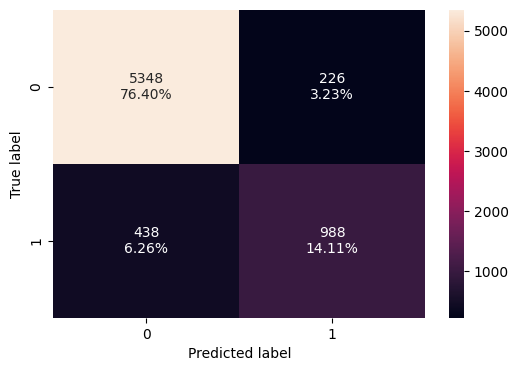

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

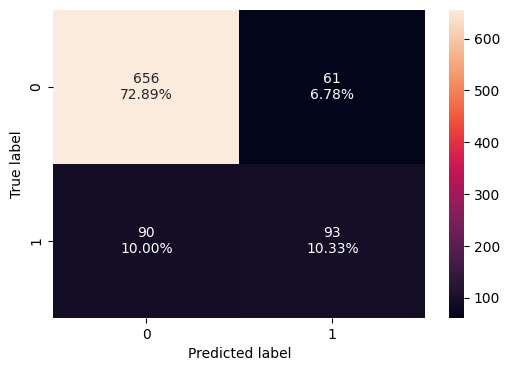

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per confusion matrix, Recall for training:69.2% and Validation: 50%, model is overfitting
No major improvement in validation recall, There's lot of oscillations, will reduce learning rate and check for the performance with same epochs.

*My Notes::with reduced lr, recall for training: 50% and validation is 45% so, dropped that idea.
* My notes: Default adam with 100 epochs - 75% training, 51.36 Validation with dropout 0.2.
  *Atleast with Dropout increase to 0.5, model is not overfitting. Training recall: 62,  validation: 51

### Neural Network with Adam Optimizer and Dropout Increase - Same as default Adam Config

In [ ]:
# Starting with default batch_size, increasing epochs from 50 to 100, learning rate as 0.001
epochs=100
batch_size=32
lr = 0.001

In [ ]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

Adam with Dropout Model :
* Adam Optimizer with default learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout increased to 0.5 between 2 hidden layers
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_def_adam_do = Sequential()

# Add first hidden layer with 128 neurons and 'relu' activation
model_def_adam_do.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu', kernel_initializer='he_normal'))

# Add Dropout layer with 0.5
model_def_adam_do.add(Dropout(0.5))

# Add second hidden layer with 64 neurons and 'relu' activation
model_def_adam_do.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))

# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_def_adam_do.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
model_def_adam_do.compile(loss='binary_crossentropy', metrics=[metric],optimizer=optimizer)

In [ ]:
#Print the summary of the model configured.
model_def_adam_do.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* Params for 1 hidden layer, followed by Dropout
* Params for 2nd hidden layer
* Params for o/p layer

In [ ]:
# Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
history_def_adam_do = model_def_adam_do.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=batch_size,epochs=epochs)
end=time.time()

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5677 - recall: 0.1671 - val_loss: 0.4373 - val_recall: 0.3934
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4661 - recall: 0.2422 - val_loss: 0.4246 - val_recall: 0.3388
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4578 - recall: 0.2279 - val_loss: 0.4184 - val_recall: 0.3497
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4450 - recall: 0.2368 - val_loss: 0.4155 - val_recall: 0.3716
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4384 - recall: 0.2638 - val_loss: 0.4126 - val_recall: 0.3497
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4356 - recall: 0.2745 - val_loss: 0.4177 - val_recall: 0.3934
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4207 - recall: 0.2860 - val_loss: 0.4100 - val_recall: 0.3989
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4208 - recall: 0.2847 - val_loss: 0.4142 - val_recall: 0.4262


**Plots for Loss and recall**

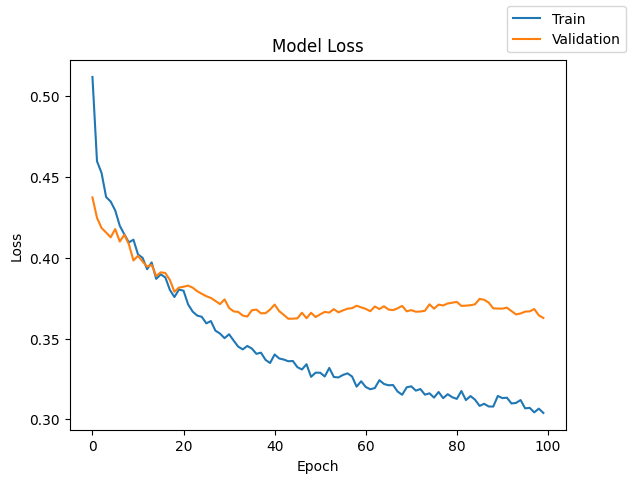

In [ ]:
plot(history_def_adam_do,"loss")

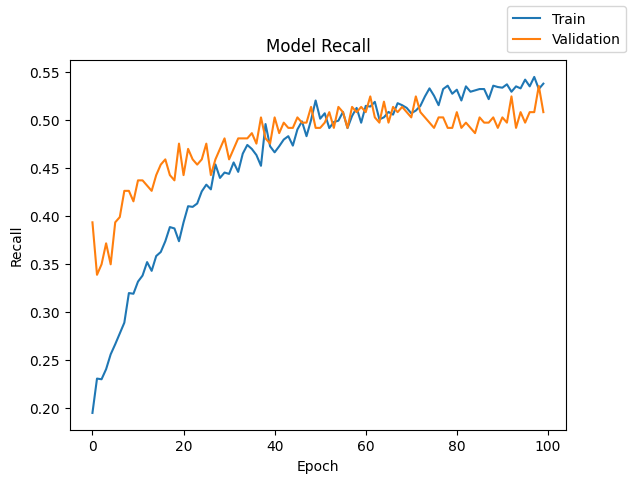

In [ ]:
plot(history_def_adam_do,"recall")

* Loss : Both training and validation loss has been decreasing but the curve is not smooth though epochs have been increased.
* Recall: Recall scores for training and validation are close but appears there are lot of oscillations and the curve is not smooth though epochs have been increased.
** NOTE: Tried once with reducing learning rate, performance deteriorated so not recorded in this notebook steps.

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_def_adam_do.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.6044880785413744

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_def_adam_do.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.5081967213114754

In [ ]:
# Merge data into results
model_name = 'NN with Default Adam - 1 Dropout'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)                                                                                                                                                                                                                                                                               results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],100,32,"Adam",[0.001,"-"],"he_normal",["Dropout(0.5)"],
                                 history_def_adam_do.history['loss'][-1],history_def_adam_do.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
NN with SGD                                     2                [128, 64]   
NN with Adam                                    2                [128, 64]   
NN with Adam - 2 Dropout                        3            [128, 64, 32]   
NN with Default Adam - 1 Dropout                2                [128, 64]   

                                 activation function - hidden layer   \
NN with SGD                                             [relu, relu]   
NN with Adam                                            [relu, relu]   
NN with Adam - 2 Dropout                          [relu, relu, relu]   
NN with Default Adam - 1 Dropout                        [relu, relu]   

                                  # epochs  batch size optimizer  \
NN with SGD                             50          32       SGD   
NN with Adam                            50          32      Adam   
NN with Adam - 2 Dropout               100          32      Adam   
NN with Default Adam - 1 Dropout       100          32      Adam   

                                 learning rate, momentum weight initializer  \
NN with SGD                                   [0.001, -]          he_normal   
NN with Adam                                  [0.001, -]          he_normal   
NN with Adam - 2 Dropout                      [0.001, -]          he_normal   
NN with Default Adam - 1 Dropout              [0.001, -]          he_normal   

                                                regularization  train loss  \
NN with SGD                                                  -    0.410440   
NN with Adam                                                 -    0.232979   
NN with Adam - 2 Dropout          [Dropout(0.2), Dropout(0.1)]    0.286774   
NN with Default Adam - 1 Dropout                [Dropout(0.5)]    0.303971   

                                  validation loss  train Recall  \
NN with SGD                              0.422814      0.304348   
NN with Adam                             0.437038      0.723703   
NN with Adam - 2 Dropout                 0.389986      0.692847   
NN with Default Adam - 1 Dropout         0.362708      0.604488   

                                  validation Recall  time (secs)  
NN with SGD                                0.273224        62.22  
NN with Adam                               0.491803        68.36  
NN with Adam - 2 Dropout                   0.508197       208.49  
NN with Default Adam - 1 Dropout           0.508197       143.38

Recall for training:60.4% and Validation: 51%
No major improvement in validation recall, There's lot of oscillations, the curve is not smooth.
* NOTE: Tried once with reducing learning rate, performance deteriorated so not recorded in this notebook steps.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5574
           1       0.78      0.60      0.68      1426

    accuracy                           0.88      7000
   macro avg       0.84      0.78      0.81      7000
weighted avg       0.88      0.88      0.88      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       717
           1       0.66      0.51      0.58       183

    accuracy                           0.85       900
   macro avg       0.77      0.72      0.74       900
weighted avg       0.84      0.85      0.84       900



As per classification report, Recall for training:60% and Validation: 51%
No major improvement in validation recall, There's lot of oscillations, the curve is not smooth.
* NOTE: Tried once with reducing learning rate, performance deteriorated so not recorded in this notebook steps.

**Confusion Matrix for training and validation**

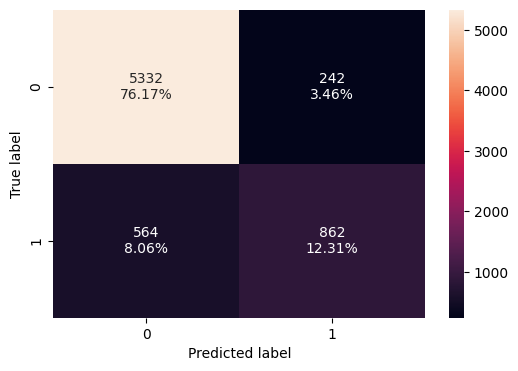

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

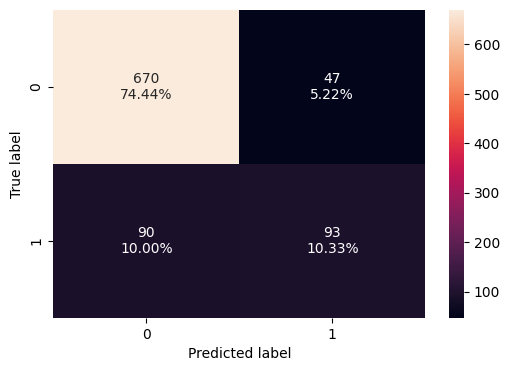

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per confusion matrix,  Recall for training:60.4% and Validation: 51%
No major improvement in validation recall, There's lot of oscillations, the curve is not smooth.
* NOTE: Tried once with reducing learning rate, performance deteriorated so not recorded in this notebook steps.

### Neural Network with EarlyStopping, Balanced Data (by applying Class weight) and SGD Optimizer

In [ ]:
#Compute Class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(y_train), y = y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558306422676713, 1: 4.908835904628331}

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, recall ws 80 training and 72 validation , now, included early stopping improved.
batch_size=32
lr = 0.001

In [ ]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

SGD Model with balanced weights and Early stopping:
* SGD Optimizer with default learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: No Dropout/Batch_Norm,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_sgd_default_bal = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_sgd_default_bal.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu',kernel_initializer='he_normal'))
# Add second hidden layer with 64 neurons and 'relu' activation
model_sgd_default_bal.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_sgd_default_bal.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_sgd_default_bal.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.SGD(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_sgd_default_bal.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* 2nd hidden layer has 128 [o/p of first hidden layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
y_train = y_train.astype(int) #Ensure y_train is of type int
y_val = y_val.astype(int) #Ensure y_val is of type int
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
# Check for unique values in y_train
unique_labels = y_train.unique()
print("Unique Labels in y_train:", unique_labels) #Print unique labels for confirmation

#If the unique labels in y_train are 0 and 1, then use class_weight with keys 0 and 1:
if set(unique_labels) == {0, 1}:
    # Convert y_train and y_val to NumPy arrays
    y_train_np = y_train.to_numpy()
    y_val_np = y_val.to_numpy()

    history_sgd_default_bal = model_sgd_default_bal.fit(
        X_train,
        y_train_np,  # Use NumPy array for y_train
        validation_data=(X_val, y_val_np),  # Use NumPy array for y_val
        batch_size=batch_size,
        epochs=epochs,
        class_weight={0: 1.2558306422676713, 1: 4.908835904628331},
        callbacks=[es]
    )
else:
    print("Error: y_train contains labels other than 0 and 1. Adjust class_weight accordingly.") #Print err message

end=time.time()

Unique Labels in y_train: [0 1]
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3924 - recall: 0.5913 - val_loss: 0.6487 - val_recall: 0.6721
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2344 - recall: 0.6774 - val_loss: 0.6235 - val_recall: 0.6776
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1935 - recall: 0.7025 - val_loss: 0.6128 - val_recall: 0.6940
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1755 - recall: 0.7144 - val_loss: 0.6063 - val_recall: 0.7049
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1645 - recall: 0.7155 - val_loss: 0.6011 - val_recall: 0.7213
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1566 - recall: 0.7154 - val_loss: 0.5969 - val_recall: 0.7322
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1503 - recall: 0.7190 - val_loss: 0.5930 - val_recall: 0.7377
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1449 - recall: 0.7203 - val_lo

**Plots for Loss and recall**

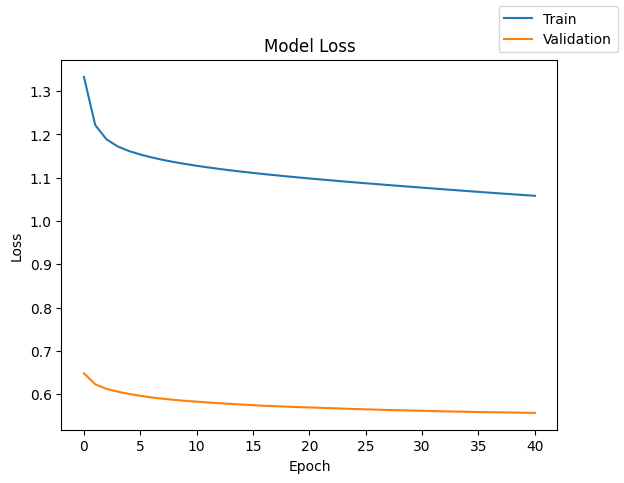

In [ ]:
plot(history_sgd_default_bal,"loss")

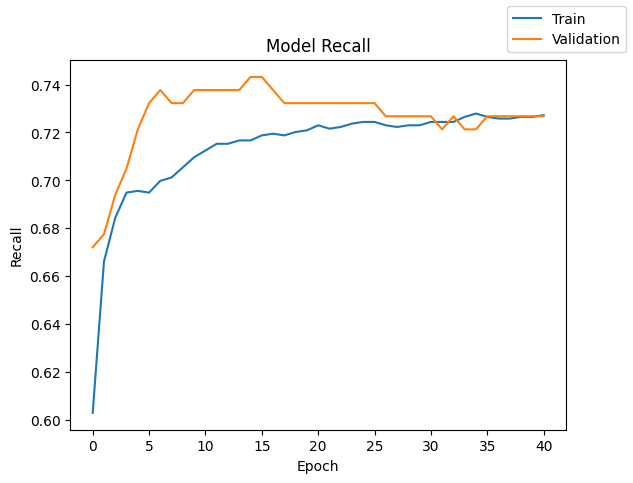

In [ ]:
plot(history_sgd_default_bal,"recall")

For both training and Validation,
* Loss: Loss gradually declines as smooth curve with validation loss lesser than training loss.
* Recall: Recall drastically raises for training and validation, validation and training convereges at > 30 epochs but has oscillations.

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_sgd_default_bal.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7475455820476858

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_sgd_default_bal.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.73224043715847

In [ ]:
# Merge data into results
model_name = 'NN with SGD + ES + Balanced'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,"SGD",[0.001,"-"],"he_normal","-",
                                 history_sgd_default_bal.history['loss'][-1],history_sgd_default_bal.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
NN with SGD                                     2                [128, 64]   
NN with Adam                                    2                [128, 64]   
NN with Adam - 2 Dropout                        3            [128, 64, 32]   
NN with Default Adam - 1 Dropout                2                [128, 64]   
NN with SGD + ES + Balanced                     2                [128, 64]   

                                 activation function - hidden layer   \
NN with SGD                                             [relu, relu]   
NN with Adam                                            [relu, relu]   
NN with Adam - 2 Dropout                          [relu, relu, relu]   
NN with Default Adam - 1 Dropout                        [relu, relu]   
NN with SGD + ES + Balanced                             [relu, relu]   

                                  # epochs  batch size optimizer  \
NN with SGD                             50          32       SGD   
NN with Adam                            50          32      Adam   
NN with Adam - 2 Dropout               100          32      Adam   
NN with Default Adam - 1 Dropout       100          32      Adam   
NN with SGD + ES + Balanced       <100[ES]          32       SGD   

                                 learning rate, momentum weight initializer  \
NN with SGD                                   [0.001, -]          he_normal   
NN with Adam                                  [0.001, -]          he_normal   
NN with Adam - 2 Dropout                      [0.001, -]          he_normal   
NN with Default Adam - 1 Dropout              [0.001, -]          he_normal   
NN with SGD + ES + Balanced                   [0.001, -]          he_normal   

                                                regularization  train loss  \
NN with SGD                                                  -    0.410440   
NN with Adam                                                 -    0.232979   
NN with Adam - 2 Dropout          [Dropout(0.2), Dropout(0.1)]    0.286774   
NN with Default Adam - 1 Dropout                [Dropout(0.5)]    0.303971   
NN with SGD + ES + Balanced                                  -    1.058445   

                                  validation loss  train Recall  \
NN with SGD                              0.422814      0.304348   
NN with Adam                             0.437038      0.723703   
NN with Adam - 2 Dropout                 0.389986      0.692847   
NN with Default Adam - 1 Dropout         0.362708      0.604488   
NN with SGD + ES + Balanced              0.557344      0.747546   

                                  validation Recall  time (secs)  
NN with SGD                                0.273224        62.22  
NN with Adam                               0.491803        68.36  
NN with Adam - 2 Dropout                   0.508197       208.49  
NN with Default Adam - 1 Dropout           0.508197       143.38  
NN with SGD + ES + Balanced                0.732240        47.93

Recall for training: 74.7% and Validation: 73.2%, one of the best models to consider, this is the first best model due to improved balance in weights.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.70      0.80      5574
           1       0.39      0.75      0.51      1426

    accuracy                           0.71      7000
   macro avg       0.65      0.73      0.66      7000
weighted avg       0.81      0.71      0.74      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       717
           1       0.39      0.73      0.51       183

    accuracy                           0.72       900
   macro avg       0.65      0.72      0.66       900
weighted avg       0.81      0.72      0.74       900



As per classification report, Recall for training: 75% and Validation: 73%

**Confusion Matrix for training and validation**

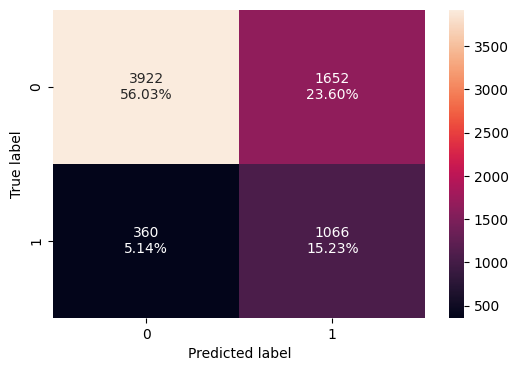

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

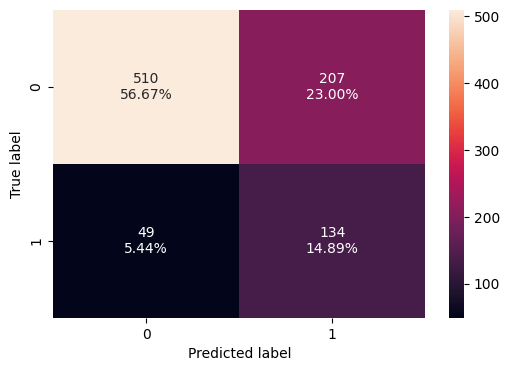

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 74.7% and Validation: 73.2%. Recall Performance after balancing the weights, applying the early stopping have considerably improved. Need to consider Adam Optimizer.

### Neural Network with EarlyStopping, Balanced Data (by applying Class weight) and Adam Optimizer

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558306422676713, 1: 4.908835904628331}

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
batch_size=32
lr = 0.001

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: No Dropout/Batch_Norm,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_default_bal = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_default_bal.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu',kernel_initializer='he_normal'))
# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_default_bal.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_default_bal.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_default_bal.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_default_bal.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* 2nd hidden layer has 128 [o/p of first hidden layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
y_train = y_train.astype(int) #Ensure y_train is of type int
y_val = y_val.astype(int) #Ensure y_val is of type int
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
# Check for unique values in y_train
unique_labels = y_train.unique()
print("Unique Labels in y_train:", unique_labels) #Print unique labels for confirmation

#If the unique labels in y_train are 0 and 1, then use class_weight with keys 0 and 1:
if set(unique_labels) == {0, 1}:
    # Convert y_train and y_val to NumPy arrays
    y_train_np = y_train.to_numpy()
    y_val_np = y_val.to_numpy()

    history_adam_default_bal = model_adam_default_bal.fit(
        X_train,
        y_train_np,  # Use NumPy array for y_train
        validation_data=(X_val, y_val_np),  # Use NumPy array for y_val
        batch_size=batch_size,
        epochs=epochs,
        class_weight={0: 1.2558306422676713, 1: 4.908835904628331}
        ,callbacks=[es] #without ES, it overfits to 98%(T), 59%(V)
    )
else:
    print("Error: y_train contains labels other than 0 and 1. Adjust class_weight accordingly.") #Print err message

end=time.time()

Unique Labels in y_train: [0 1]
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2427 - recall: 0.6632 - val_loss: 0.5497 - val_recall: 0.7213
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1066 - recall: 0.7265 - val_loss: 0.5408 - val_recall: 0.6885
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0615 - recall: 0.7290 - val_loss: 0.5363 - val_recall: 0.6995
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0260 - recall: 0.7376 - val_loss: 0.5291 - val_recall: 0.6940
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9998 - recall: 0.7459 - val_loss: 0.5271 - val_recall: 0.6940
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9784 - recall: 0.7483 - val_loss: 0.5248 - val_recall: 0.7049
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9599 - recall: 0.7500 - val_loss: 0.5236 - val_recall: 0.7213
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9435 - recall: 0.7618 - val_lo

**Plots for Loss and recall**

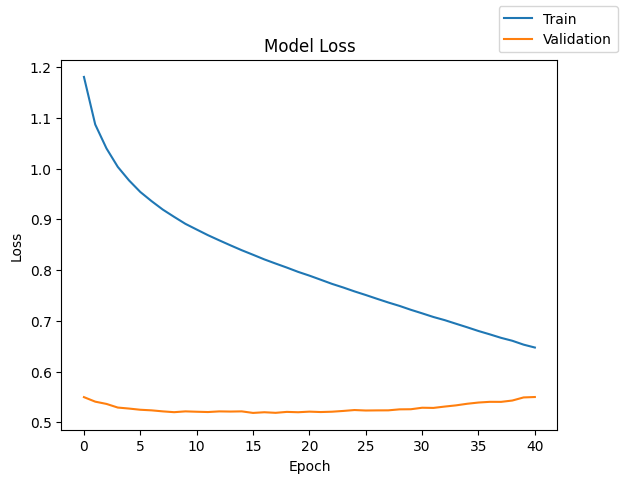

In [ ]:
plot(history_adam_default_bal,"loss")

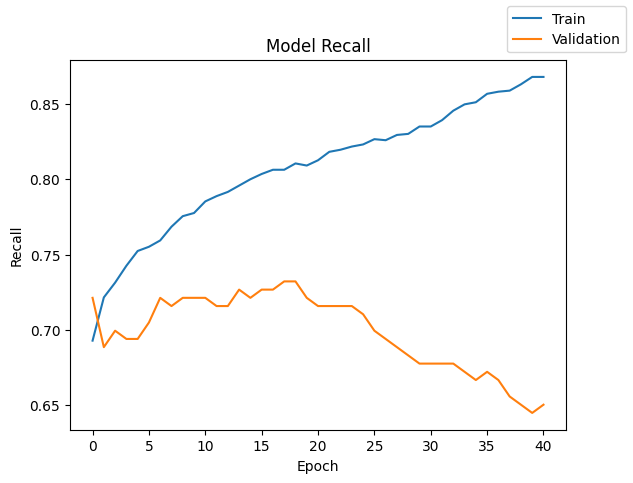

In [ ]:
plot(history_adam_default_bal,"recall")

For both training and Validation,
* Loss: Loss gradually declines as smooth curve with validation loss lesser than training loss.
* Recall: Recall drastically raises for training while it gradually raises and falls for validation, and has oscillations.
Model likely overfitting, had it not been early stopping, model would have overfitted.
  * Tested once without Earlystopping and model overfitted, not documented the results in this notebook.
  * Need to try with Dropout of 0.5 with Adam with balanced weights.

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_default_bal.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8520336605890603

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_default_bal.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.7158469945355191

In [ ]:
# Merge data into results
model_name = 'NN with Adam + ES + Balanced'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,"Adam",[0.001,"-"],"he_normal","-",
                                 history_adam_default_bal.history['loss'][-1],history_adam_default_bal.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]
results

# hidden layers # neurons - hidden layer  \
NN with SGD                                     2                [128, 64]   
NN with Adam                                    2                [128, 64]   
NN with Adam - 2 Dropout                        3            [128, 64, 32]   
NN with Default Adam - 1 Dropout                2                [128, 64]   
NN with SGD + ES + Balanced                     2                [128, 64]   
NN with Adam + ES + Balanced                    2                [128, 64]   

                                 activation function - hidden layer   \
NN with SGD                                             [relu, relu]   
NN with Adam                                            [relu, relu]   
NN with Adam - 2 Dropout                          [relu, relu, relu]   
NN with Default Adam - 1 Dropout                        [relu, relu]   
NN with SGD + ES + Balanced                             [relu, relu]   
NN with Adam + ES + Balanced                            [relu, relu]   

                                  # epochs  batch size optimizer  \
NN with SGD                             50          32       SGD   
NN with Adam                            50          32      Adam   
NN with Adam - 2 Dropout               100          32      Adam   
NN with Default Adam - 1 Dropout       100          32      Adam   
NN with SGD + ES + Balanced       <100[ES]          32       SGD   
NN with Adam + ES + Balanced      <100[ES]          32      Adam   

                                 learning rate, momentum weight initializer  \
NN with SGD                                   [0.001, -]          he_normal   
NN with Adam                                  [0.001, -]          he_normal   
NN with Adam - 2 Dropout                      [0.001, -]          he_normal   
NN with Default Adam - 1 Dropout              [0.001, -]          he_normal   
NN with SGD + ES + Balanced                   [0.001, -]          he_normal   
NN with Adam + ES + Balanced                  [0.001, -]          he_normal   

                                                regularization  train loss  \
NN with SGD                                                  -    0.410440   
NN with Adam                                                 -    0.232979   
NN with Adam - 2 Dropout          [Dropout(0.2), Dropout(0.1)]    0.286774   
NN with Default Adam - 1 Dropout                [Dropout(0.5)]    0.303971   
NN with SGD + ES + Balanced                                  -    1.058445   
NN with Adam + ES + Balanced                                 -    0.647440   

                                  validation loss  train Recall  \
NN with SGD                              0.422814      0.304348   
NN with Adam                             0.437038      0.723703   
NN with Adam - 2 Dropout                 0.389986      0.692847   
NN with Default Adam - 1 Dropout         0.362708      0.604488   
NN with SGD + ES + Balanced              0.557344      0.747546   
NN with Adam + ES + Balanced             0.549889      0.852034   

                                  validation Recall  time (secs)  
NN with SGD                                0.273224        62.22  
NN with Adam                               0.491803        68.36  
NN with Adam - 2 Dropout                   0.508197       208.49  
NN with Default Adam - 1 Dropout           0.508197       143.38  
NN with SGD + ES + Balanced                0.732240        47.93  
NN with Adam + ES + Balanced               0.715847        57.48

Recall for training: 85.2% and Validation: 71.5%. Model likely overfitting, had it not been early stopping, model would have overfitted.
  * Tested once without Earlystopping and model overfitted, not documented the results in this notebook.
  * Need to try with Dropout of 0.5 with Adam with balanced weights.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      5574
           1       0.54      0.85      0.66      1426

    accuracy                           0.82      7000
   macro avg       0.75      0.83      0.77      7000
weighted avg       0.87      0.82      0.84      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       717
           1       0.44      0.72      0.54       183

    accuracy                           0.75       900
   macro avg       0.67      0.74      0.69       900
weighted avg       0.82      0.75      0.77       900



As per classification report, Recall for training: 85% and Validation: 71%. Model likely overfitting, had it not been early stopping, model would have overfitted.
  * Tested once without Earlystopping and model overfitted, not documented the results in this notebook.
   * Need to try with Dropout of 0.5 with Adam with balanced weights.

**Confusion Matrix for training and validation**

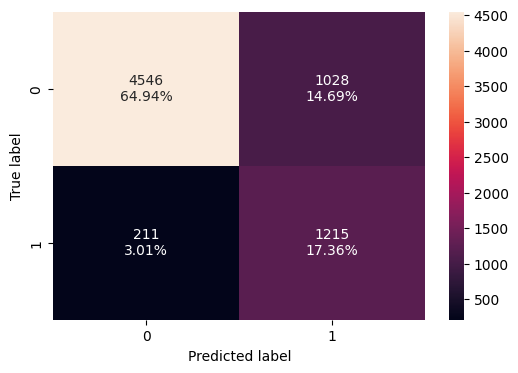

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

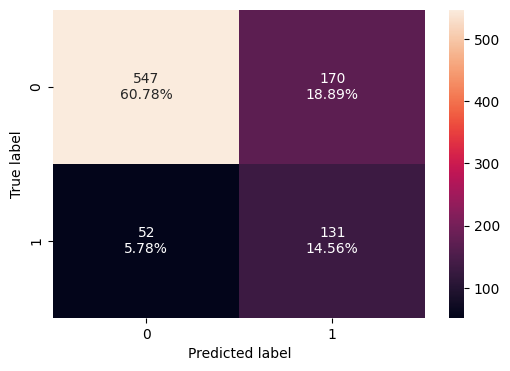

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 85.2% and Validation: 71.6%. Recall performance drops when compared to SGD with balanced weights.
Model likely overfitting, had it not been early stopping, model would have overfitted.
  * Tested once without Earlystopping and model overfitted, not documented the results in this notebook.
  * Need to try with Dropout of 0.5 with Adam with balanced weights.

### Neural Network with EarlyStopping, Balanced Data (by applying Class weight) and Adam Optimizer with 1 Dropout

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558306422676713, 1: 4.908835904628331}

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
batch_size=32
#lr = 0.001 #84(T),77(V)
lr = 0.0001 #1. with ES, 76(t), 77(v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, decreased val_recall.
dr = 0.5

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout 0.5,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_do_bal = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_do_bal.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu',kernel_initializer='he_normal'))
# Add Dropout of 0.5 as it yielded results
model_adam_do_bal.add(Dropout(dr))
# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_do_bal.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_do_bal.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_do_bal.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_do_bal.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* Dropout layer of 0.5
* 2nd hidden layer has 64 [o/p of Dropout layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
y_train = y_train.astype(int) #Ensure y_train is of type int
y_val = y_val.astype(int) #Ensure y_val is of type int
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
# Check for unique values in y_train
unique_labels = y_train.unique()
print("Unique Labels in y_train:", unique_labels) #Print unique labels for confirmation

#If the unique labels in y_train are 0 and 1, then use class_weight with keys 0 and 1:
if set(unique_labels) == {0, 1}:
    # Convert y_train and y_val to NumPy arrays
    y_train_np = y_train.to_numpy()
    y_val_np = y_val.to_numpy()

    history_adam_do_bal = model_adam_do_bal.fit(
        X_train,
        y_train_np,  # Use NumPy array for y_train
        validation_data=(X_val, y_val_np),  # Use NumPy array for y_val
        batch_size=batch_size,
        epochs=epochs,
        class_weight={0: 1.2558306422676713, 1: 4.908835904628331}
        ,callbacks=[es] #without ES, it  to 76%(T), 77%(V)
    )
else:
    print("Error: y_train contains labels other than 0 and 1. Adjust class_weight accordingly.") #Print err message

end=time.time()

Unique Labels in y_train: [0 1]
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.7709 - recall: 0.4593 - val_loss: 0.6646 - val_recall: 0.7322
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 1.4645 - recall: 0.6114 - val_loss: 0.6145 - val_recall: 0.7049
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4017 - recall: 0.6132 - val_loss: 0.6321 - val_recall: 0.7322
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.3152 - recall: 0.6551 - val_loss: 0.6030 - val_recall: 0.7213
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.3297 - recall: 0.6650 - val_loss: 0.6014 - val_recall: 0.7322
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.3100 - recall: 0.6582 - val_loss: 0.5967 - val_recall: 0.7158
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 1.2599 - recall: 0.6783 - val_loss: 0.5958 - val_recall: 0.7158
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 1.2721 - recall: 0.6710 -

**Plots for Loss and recall**

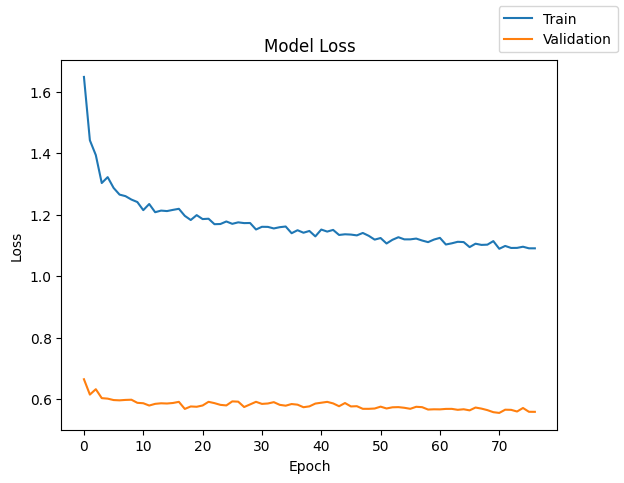

In [ ]:
plot(history_adam_do_bal,"loss")

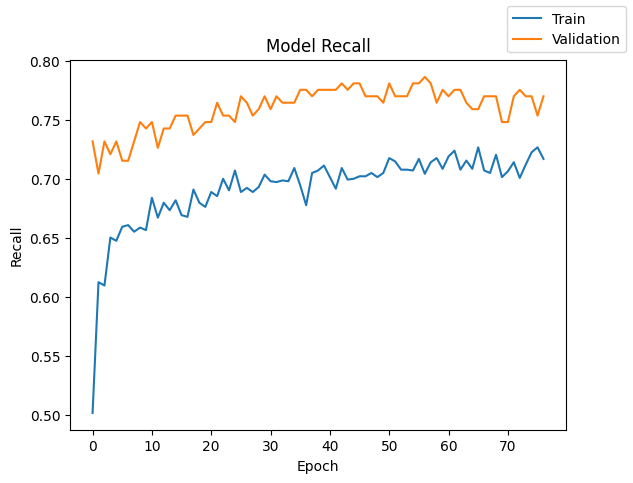

In [ ]:
plot(history_adam_do_bal,"recall")

For both training and Validation,
* Loss: Loss gradually declines as comparatively smooth curve with validation loss lesser than training loss.
* Recall: Recall drastically raises for training while it gradually raises and falls for validation but at all times higher than training recall, and has oscillations.
  * **My Notes:** lr = 0.0001 #1. with ES, 76(t), 77(v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, 78(T) and decreased val_recall(72). So, Lesson : as LR reduces, with ES, there is good generalization, will apply for next experiment. But without ES, val_metric reduces drastically..

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_do_bal.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8022440392706872

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_do_bal.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.7868852459016393

In [ ]:
# Merge data into results
model_name = 'NN with Adam + ES + Balanced + 1Dropout + LR Reduced'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,"Adam",[0.0001,"-"],"he_normal",["Dropout(0.5)"],
                                 history_adam_do_bal.history['loss'][-1],history_adam_do_bal.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]

results

# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   

                                                    # epochs  batch size  \
NN with SGD                                               50          32   
NN with Adam                                              50          32   
NN with Adam - 2 Dropout                                 100          32   
NN with Default Adam - 1 Dropout                         100          32   
NN with SGD + ES + Balanced                         <100[ES]          32   
NN with Adam + ES + Balanced                        <100[ES]          32   
NN with Adam + ES + Balanced + 1Dropout + LR Re...  <100[ES]          32   

                                                   optimizer  \
NN with SGD                                              SGD   
NN with Adam                                            Adam   
NN with Adam - 2 Dropout                                Adam   
NN with Default Adam - 1 Dropout                        Adam   
NN with SGD + ES + Balanced                              SGD   
NN with Adam + ES + Balanced                            Adam   
NN with Adam + ES + Balanced + 1Dropout + LR Re...      Adam   

                                                   learning rate, momentum  \
NN with SGD                                                     [0.001, -]   
NN with Adam                                                    [0.001, -]   
NN with Adam - 2 Dropout                                        [0.001, -]   
NN with Default Adam - 1 Dropout                                [0.001, -]   
NN with SGD + ES + Balanced                                     [0.001, -]   
NN with Adam + ES + Balanced                                    [0.001, -]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...             [0.0001, -]   

                                                   weight initializer  \
NN with SGD                                                 he_normal   
NN with Adam                                                he_normal   
NN with Adam - 2 Dropout                                    he_normal   
NN with Default Adam - 1 Dropout                            he_normal   
NN with SGD + ES 

Recall for training: 80% and Validation: 78.6%. Validation Recall has improved when Dropout is introduced for default adam config with balanced weights. Without Dropout, validation recall was 71.5%. So, Dropout(0.5) + ES + Default Adam + Balanced weights helps in improving model recall.
  * **My Notes:** lr = 0.0001 #1. with ES, 76(t), 77(v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, 78(T) and decreased val_recall(72). So, Lesson : as LR reduces, with ES, there is good generalization, will apply for next experiment. But without ES, val_metric reduces drastically.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.68      0.78      5574
           1       0.39      0.80      0.52      1426

    accuracy                           0.70      7000
   macro avg       0.66      0.74      0.65      7000
weighted avg       0.82      0.70      0.73      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       717
           1       0.39      0.79      0.52       183

    accuracy                           0.70       900
   macro avg       0.66      0.74      0.65       900
weighted avg       0.82      0.70      0.73       900



As per classification report, Recall for training: 80% and Validation: 78%.

**Confusion Matrix for training and validation**

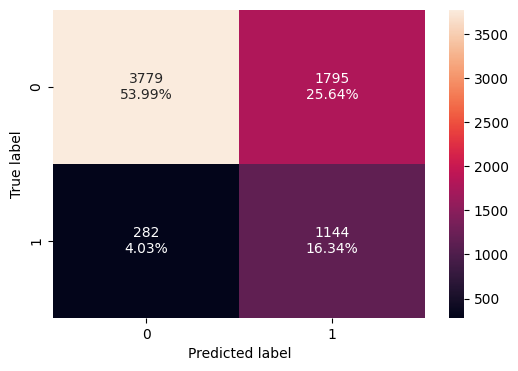

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

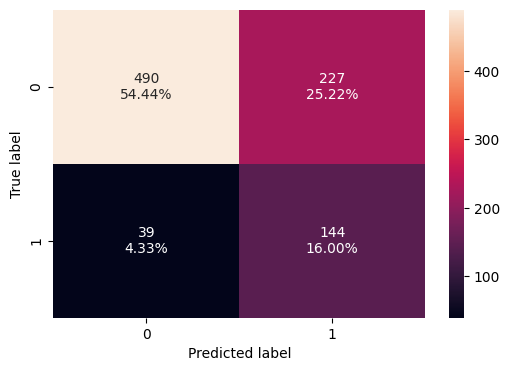

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 80% and Validation: 78.6%. Validation Recall has improved when Dropout is introduced for default adam config with balanced weights. Without Dropout, validation recall was 71.5%. So, Dropout(0.5) + ES + Default Adam + Balanced weights helps in improving model recall.
  * **My Notes:** lr = 0.0001 #1. with ES, 76(t), 77(v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, 78(T) and decreased val_recall(72). So, Lesson : as LR reduces, with ES, there is good generalization, will apply for next experiment. But without ES, val_metric reduces drastically.

### Neural Network with EarlyStopping, Balanced Data (by applying Class weight) Diff NN, Adam Optimizer, Std Learning Rate with Exponential Decay with 3 Dropout

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558306422676713, 1: 4.908835904628331}

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
#batch_size=32
batch_size=64
#lr = 0.001 #84(T),77(V)
#lr = 0.0001 #1. with ES, 76(t), 77(v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, decreased val_recall.
#dr = 0.5
initial_learning_rate = 0.001
#Setup Exponential decay learning rate.
lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,  # Number of steps to decay over
    decay_rate=0.96,   # Decay rate
    staircase=True)   # Whether to apply decay discretely

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 1 i/p(32), 3 Hidden layers - 128,64,32 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout after i/p 0.3, Dropout b/w hidden layers 0.5, Dropout before o/p 0.3
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_diff_do_bal = Sequential()

# Add input layer with 32 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(input_dim=X_train.shape[1], units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.3))

# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=128, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.5 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.5))

# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add third hidden layer with 32 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.3))

# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_diff_do_bal.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_diff_do_bal.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_diff_do_bal.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
 Summary of params present for each layer

In [ ]:
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
y_train = y_train.astype(int) #Ensure y_train is of type int
y_val = y_val.astype(int) #Ensure y_val is of type int
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
# Check for unique values in y_train
unique_labels = y_train.unique()
print("Unique Labels in y_train:", unique_labels) #Print unique labels for confirmation

#If the unique labels in y_train are 0 and 1, then use class_weight with keys 0 and 1:
if set(unique_labels) == {0, 1}:
    # Convert y_train and y_val to NumPy arrays
    y_train_np = y_train.to_numpy()
    y_val_np = y_val.to_numpy()

    history_adam_diff_do_bal = model_adam_diff_do_bal.fit(
        X_train,
        y_train_np,  # Use NumPy array for y_train
        validation_data=(X_val, y_val_np),  # Use NumPy array for y_val
        batch_size=batch_size,
        epochs=epochs,
        class_weight={0: 1.2558306422676713, 1: 4.908835904628331}
        #,callbacks=[es] #without ES, it  to 76%(T), 77%(V)
    )
else:
    print("Error: y_train contains labels other than 0 and 1. Adjust class_weight accordingly.") #Print err message

end=time.time()

Unique Labels in y_train: [0 1]
Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.6772 - recall: 0.5746 - val_loss: 0.6703 - val_recall: 0.6831
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3465 - recall: 0.6223 - val_loss: 0.6289 - val_recall: 0.6721
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3165 - recall: 0.6183 - val_loss: 0.6092 - val_recall: 0.6831
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2989 - recall: 0.6729 - val_loss: 0.6015 - val_recall: 0.7158
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.2514 - recall: 0.6992 - val_loss: 0.5937 - val_recall: 0.7322
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2382 - recall: 0.7052 - val_loss: 0.6039 - val_recall: 0.7432
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2333 - recall: 0.7023 - val_loss: 0.5830 - val_recall: 0.7213
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2249 - recall: 0.7037 

**Plots for Loss and recall**

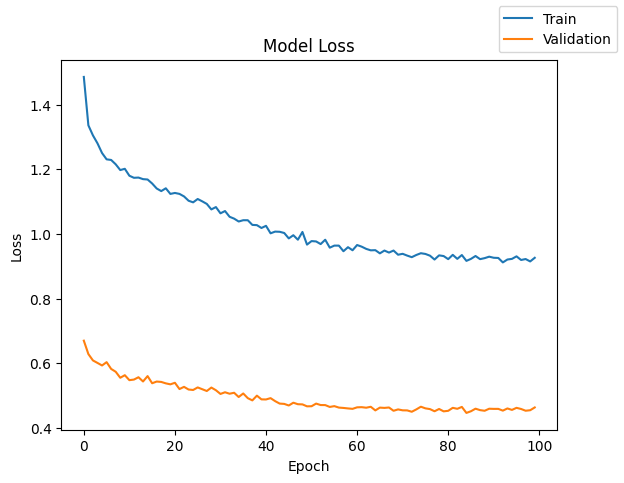

In [ ]:
plot(history_adam_diff_do_bal,"loss")

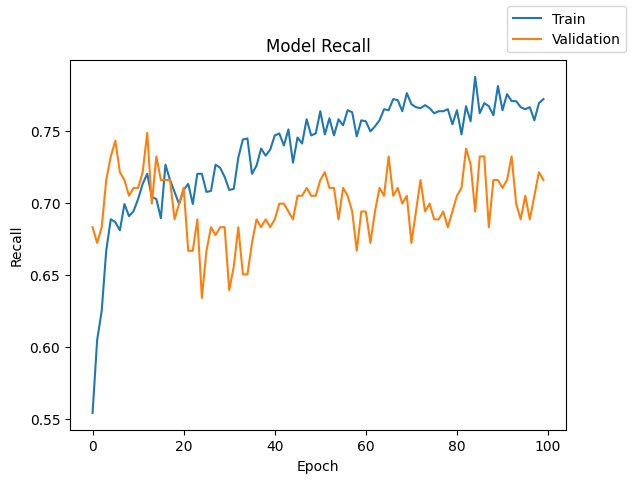

In [ ]:
plot(history_adam_diff_do_bal,"recall")

* Loss: validation loss lesser than training loss with oscillations in both.
* Recall: Recall for training steeply increases while it starts off high for validation and then reduces, and has oscillations.


**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_diff_do_bal.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7798036465638148

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_diff_do_bal.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.7158469945355191

In [ ]:
# Merge data into results
model_name = 'NN with Adam + NO ES + Balanced + 3Dropout + LR Schedule'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"100",64,"Adam",["0.001-Scheduled","-"],"he_normal",["Dropout(0.3)","Dropout(0.5)","Dropout(0.3)"],
                                 history_adam_diff_do_bal.history['loss'][-1],history_adam_diff_do_bal.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]

results

# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   

                                                    # epochs  batch size  \
NN with SGD                                               50          32   
NN with Adam                                              50          32   
NN with Adam - 2 Dropout                                 100          32   
NN with Default Adam - 1 Dropout                         100          32   
NN with SGD + ES + Balanced                         <100[ES]          32   
NN with Adam + ES + Balanced                        <100[ES]          32   
NN with Adam + ES + Balanced + 1Dropout + LR Re...  <100[ES]          32   
NN with Adam + NO ES + Balanced + 3Dropout + LR...       100          64   

                                                   optimizer  \
NN with SGD                                              SGD   
NN with Adam                                            Adam   
NN with Adam - 2 Dropout                                Adam   
NN with Default Adam - 1 Dropout                        Adam   
NN with SGD + ES + Balanced                              SGD   
NN with Adam + ES + Balanced                            Adam   
NN with Adam + ES + Balanced + 1Dropout + LR Re...      Adam   
NN with Adam + NO ES + Balanced + 3Dropout + LR...      Adam   

                                                   learning rate, momentum  \
NN with SGD                                                     [0.001, -]   
NN with Adam                                                    [0.001, -]   
NN with Adam - 2 Dropout                                        [0.001, -]   
NN with Default Adam - 1 Dropout                                [0.001, -]   
NN with SGD + ES + Balanced                                     [0.001, -]   
NN with Adam + ES + Balanced                                    [0.001, -]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...             [0.0001, -]   
NN 

Recall for training: 77.9% and Validation:71.5%, one of the decent models with good generalizations.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      5574
           1       0.53      0.78      0.63      1426

    accuracy                           0.82      7000
   macro avg       0.73      0.80      0.75      7000
weighted avg       0.85      0.82      0.83      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       717
           1       0.46      0.72      0.56       183

    accuracy                           0.77       900
   macro avg       0.69      0.75      0.71       900
weighted avg       0.82      0.77      0.79       900



As per classification report, Weighted average : Recall for training: 78% and Validation: 72%.

**Confusion Matrix for training and validation**

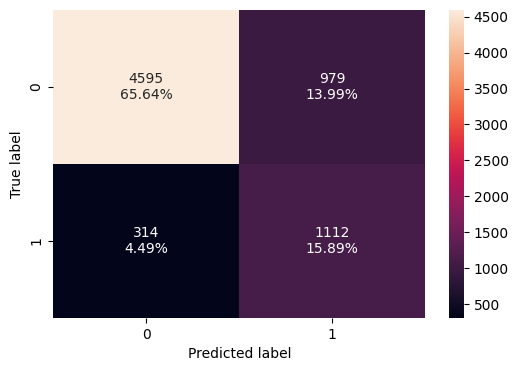

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

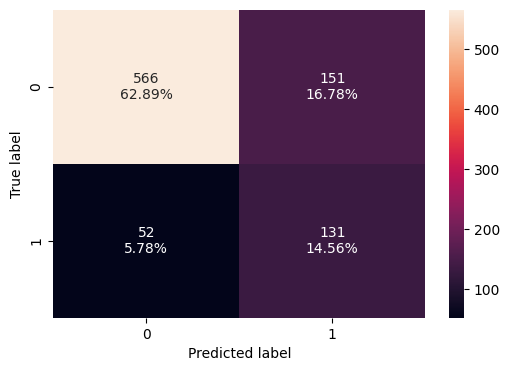

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 77.9% and Validation:71.5%, one of the decent models with good generalizations.

### Neural Network with EarlyStopping, Balanced Data (by applying Class weight) Diff NN, Adam Optimizer, Std Learning Rate with 3 Dropout

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict


{0: 1.2558306422676713, 1: 4.908835904628331}

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
#batch_size=32
batch_size=32
lr = 0.001 #84(T),77(V)
#lr = 0.0001 #1. with ES, 76(t), 77(v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, decreased val_recall.
#dr = 0.5


In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 1 i/p(32), 3 Hidden layers - 128,64,32 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout after i/p 0.3, Dropout b/w hidden layers 0.5, Dropout before o/p 0.3
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_diff_do_bal = Sequential()

# Add input layer with 32 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(input_dim=X_train.shape[1], units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.3))

# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=128, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.5 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.5))

# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add third hidden layer with 32 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.3))

# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_diff_do_bal.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_diff_do_bal.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_diff_do_bal.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
 Summary of params present for each layer

In [ ]:
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
y_train = y_train.astype(int) #Ensure y_train is of type int
y_val = y_val.astype(int) #Ensure y_val is of type int
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
# Check for unique values in y_train
unique_labels = y_train.unique()
print("Unique Labels in y_train:", unique_labels) #Print unique labels for confirmation

#If the unique labels in y_train are 0 and 1, then use class_weight with keys 0 and 1:
if set(unique_labels) == {0, 1}:
    # Convert y_train and y_val to NumPy arrays
    y_train_np = y_train.to_numpy()
    y_val_np = y_val.to_numpy()

    history_adam_diff_do_bal = model_adam_diff_do_bal.fit(
        X_train,
        y_train_np,  # Use NumPy array for y_train
        validation_data=(X_val, y_val_np),  # Use NumPy array for y_val
        batch_size=batch_size,
        epochs=epochs,
        class_weight={0: 1.2558306422676713, 1: 4.908835904628331}
        ,callbacks=[es] #without ES, it  to 76%(T), 77%(V)
    )
else:
    print("Error: y_train contains labels other than 0 and 1. Adjust class_weight accordingly.") #Print err message

end=time.time()

Unique Labels in y_train: [0 1]
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.6539 - recall: 0.5339 - val_loss: 0.6468 - val_recall: 0.5956
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3443 - recall: 0.6033 - val_loss: 0.6497 - val_recall: 0.7049
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2890 - recall: 0.6628 - val_loss: 0.6247 - val_recall: 0.7213
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2684 - recall: 0.6688 - val_loss: 0.6026 - val_recall: 0.7158
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2556 - recall: 0.6713 - val_loss: 0.5937 - val_recall: 0.7213
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2167 - recall: 0.7010 - val_loss: 0.5826 - val_recall: 0.6995
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2192 - recall: 0.6941 - val_loss: 0.5704 - val_recall: 0.7104
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.1786 - recall: 0.7240 - val_lo

**Plots for Loss and recall**

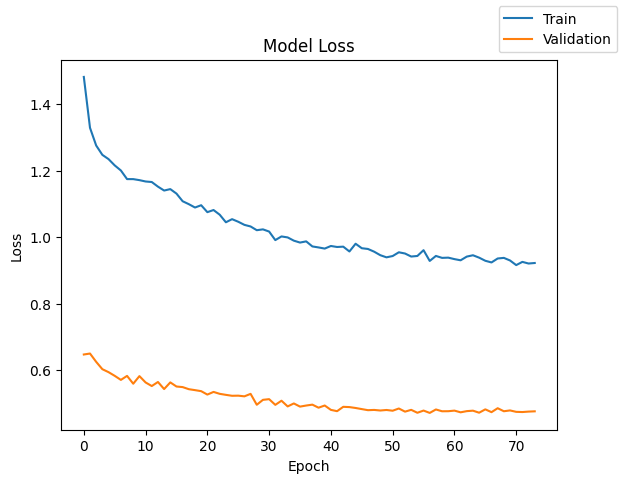

In [ ]:
plot(history_adam_diff_do_bal,"loss")

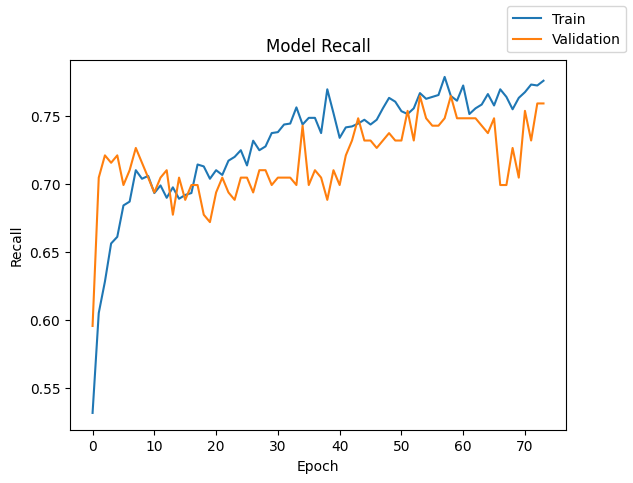

In [ ]:
plot(history_adam_diff_do_bal,"recall")

* Loss: Validation loss is lesser than training loss, with lot of oscillations.
* Recall: Recall for training and validation steeply increases while it is comparatively lower for validation, and has oscillations.


**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_diff_do_bal.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8071528751753155

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_diff_do_bal.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.7650273224043715

In [ ]:
# Merge data into results
model_name = 'NN with Adam + ES + Balanced + 3Dropout'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]

#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"<100(ES)",32,"Adam",[0.001,"-"],"he_normal",["Dropout(0.3)","Dropout(0.5)","Dropout(0.3)"],
                                 history_adam_diff_do_bal.history['loss'][-1],history_adam_diff_do_bal.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2),train_recall_score - val_recall_score]

results

# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout + Reduc...                4   
NN with SGD + ES + Oversampled                                    2   
NN with Adam + ES + Oversampled                                   2   
NN with Adam + ES + Oversampled + 1Dropout                        2   
NN with Adam + ES + Oversampled + 1Dropout + LR...                2   
NN with Adam + NO ES + Oversampled + 3Dropout                     4   
NN with Adam + ES + Oversampled + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout                           4   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...        [32, 128, 64, 32]   
NN with SGD + ES + Oversampled                                    [128, 64]   
NN with Adam + ES + Oversampled                                   [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout                        [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout + LR...                [128, 64]   
NN with Adam + NO ES + Oversampled + 3Dropout             [32, 128, 64, 32]   
NN with Adam + ES + Oversampled + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout                   [32, 128, 64, 32]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...            [relu, relu, relu, relu]   
NN with SGD + ES + Oversampled                                            [relu, relu]   
NN with Adam + ES + Oversampled                                           [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout                                [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout + LR...                        [relu, relu]   
NN with Adam + NO ES + Oversampled + 3Dropout                 [relu, relu, relu, relu]   
NN with Adam + ES + Oversampled + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout                     

Recall for training: 80.7% and Validation:76.5%, has a very good validation recall score when compared to other models and good generalization as well.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      5574
           1       0.50      0.81      0.62      1426

    accuracy                           0.80      7000
   macro avg       0.72      0.80      0.74      7000
weighted avg       0.85      0.80      0.81      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       717
           1       0.44      0.77      0.56       183

    accuracy                           0.75       900
   macro avg       0.68      0.76      0.69       900
weighted avg       0.83      0.75      0.77       900



As per classification report, Recall for training:81 % and Validation:77 %.

**Confusion Matrix for training and validation**

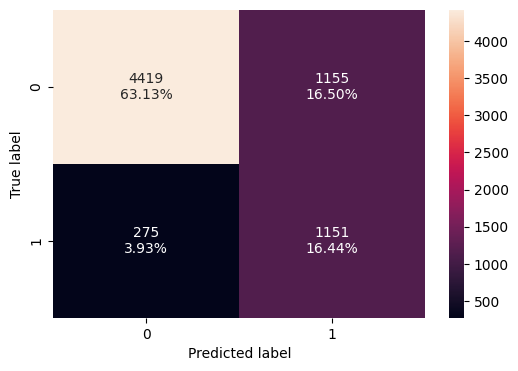

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

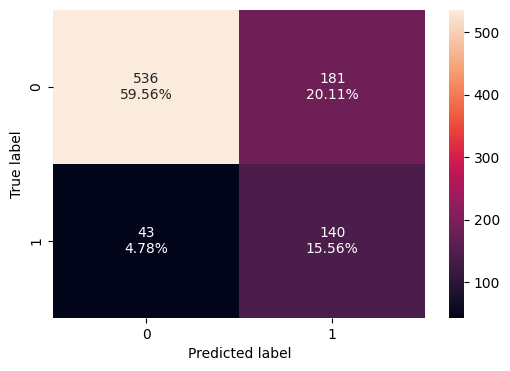

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 80.7% and Validation:76.5%, has a very good validation recall score when compared to other models and good generalization as well.

### Neural Network with EarlyStopping, Balanced Data (by applying Class weight) Diff NN, Adam Optimizer, Reduced Learning Rate with 3 Dropout

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558306422676713, 1: 4.908835904628331}

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
batch_size=32
#lr = 0.001 #84(T),77(V)
lr = 0.0001 #1. with ES, 76(t), 77(v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, decreased val_recall.
#dr = 0.5

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 1 i/p(32), 3 Hidden layers - 128,64,32 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout after i/p 0.3, Dropout b/w hidden layers 0.5, Dropout before o/p 0.3
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_diff_do_bal = Sequential()

# Add input layer with 32 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(input_dim=X_train.shape[1], units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.3))

# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=128, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.5 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.5))

# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add third hidden layer with 32 neurons and 'relu' activation
model_adam_diff_do_bal.add(Dense(units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_bal.add(Dropout(0.3))

# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_diff_do_bal.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_diff_do_bal.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_diff_do_bal.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
 Summary of params present for each layer

In [ ]:
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
y_train = y_train.astype(int) #Ensure y_train is of type int
y_val = y_val.astype(int) #Ensure y_val is of type int
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
start=time.time()
# Check for unique values in y_train
unique_labels = y_train.unique()
print("Unique Labels in y_train:", unique_labels) #Print unique labels for confirmation

#If the unique labels in y_train are 0 and 1, then use class_weight with keys 0 and 1:
if set(unique_labels) == {0, 1}:
    # Convert y_train and y_val to NumPy arrays
    y_train_np = y_train.to_numpy()
    y_val_np = y_val.to_numpy()

    history_adam_diff_do_bal = model_adam_diff_do_bal.fit(
        X_train,
        y_train_np,  # Use NumPy array for y_train
        validation_data=(X_val, y_val_np),  # Use NumPy array for y_val
        batch_size=batch_size,
        epochs=epochs,
        class_weight={0: 1.2558306422676713, 1: 4.908835904628331}
        ,callbacks=[es] #without ES, it  to 76%(T), 77%(V)
    )
else:
    print("Error: y_train contains labels other than 0 and 1. Adjust class_weight accordingly.") #Print err message

end=time.time()

Unique Labels in y_train: [0 1]
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.9975 - recall: 0.6768 - val_loss: 0.6636 - val_recall: 0.4809
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.5897 - recall: 0.5240 - val_loss: 0.6565 - val_recall: 0.5464
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4896 - recall: 0.5946 - val_loss: 0.6454 - val_recall: 0.5464
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4599 - recall: 0.5568 - val_loss: 0.6455 - val_recall: 0.5519
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.4296 - recall: 0.5582 - val_loss: 0.6475 - val_recall: 0.5902
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3886 - recall: 0.5881 - val_loss: 0.6472 - val_recall: 0.6011
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3966 - recall: 0.5495 - val_loss: 0.6445 - val_recall: 0.6284
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.3793 - recall: 0.5740 - val_

**Plots for Loss and recall**

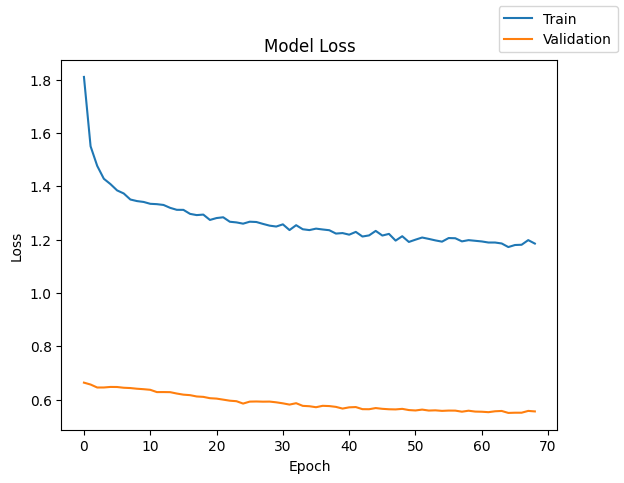

In [ ]:
plot(history_adam_diff_do_bal,"loss")

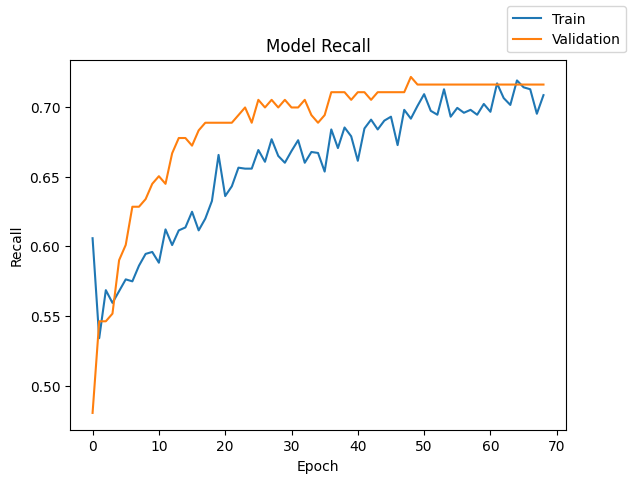

In [ ]:
plot(history_adam_diff_do_bal,"recall")

* Loss: Loss  with validation loss lesser than training loss.
* Recall: Recall for training steadily increases while it is drastic for validation, and has oscillations.


**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_diff_do_bal.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7258064516129032

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_diff_do_bal.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.7213114754098361

In [ ]:
# Merge data into results
model_name = 'NN with Adam + ES + Balanced + 3Dropout + Reduced LR'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"<100[ES]",32,"Adam",[0.0001,"-"],"he_normal",["Dropout(0.3)","Dropout(0.5)","Dropout(0.3)"],
                                 history_adam_diff_do_bal.history['loss'][-1],history_adam_diff_do_bal.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]

results

# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout                           4   
NN with Adam + ES + Balanced + 3Dropout + Reduc...                4   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout                   [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...        [32, 128, 64, 32]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout                       [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...            [relu, relu, relu, relu]   

                                                    # epochs  batch size  \
NN with SGD                                               50          32   
NN with Adam                                              50          32   
NN with Adam - 2 Dropout                                 100          32   
NN with Default Adam - 1 Dropout                         100          32   
NN with SGD + ES + Balanced                         <100[ES]          32   
NN with Adam + ES + Balanced                        <100[ES]          32   
NN with Adam + ES + Balanced + 1Dropout + LR Re...  <100[ES]          32   
NN with Adam + NO ES + Balanced + 3Dropout + LR...       100          64   
NN with Adam + ES + Balanced + 3Dropout             <100(ES)          32   
NN with Adam + ES + Balanced + 3Dropout + Reduc...  <100[ES]          32   

                                                   optimizer  \
NN with SGD                                              SGD   
NN with Adam                                            Adam   
NN with Adam - 2 Dropout                                Adam   
NN with Default Adam - 1 Dropout                        Adam   
NN with SGD + ES + Balanced                              SGD   
NN with Adam + ES + Balanced                            Adam   
NN with Adam + ES + Balanced + 1Dropout + LR Re...      Adam   
NN with Adam + NO ES + Balanced + 3Dropout + LR...      Adam

Recall for training:72.5% and Validation:72.1%, good decent generalization with a decent validation recall score

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      5574
           1       0.39      0.73      0.51      1426

    accuracy                           0.71      7000
   macro avg       0.65      0.72      0.65      7000
weighted avg       0.80      0.71      0.74      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       717
           1       0.38      0.72      0.50       183

    accuracy                           0.70       900
   macro avg       0.64      0.71      0.64       900
weighted avg       0.80      0.70      0.73       900



As per classification report, Weighted average : Recall for training: 71% and Validation: 70%., good decent generalization with a decent validation recall score

**Confusion Matrix for training and validation**

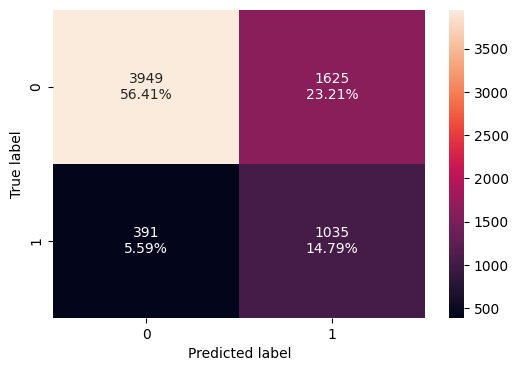

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

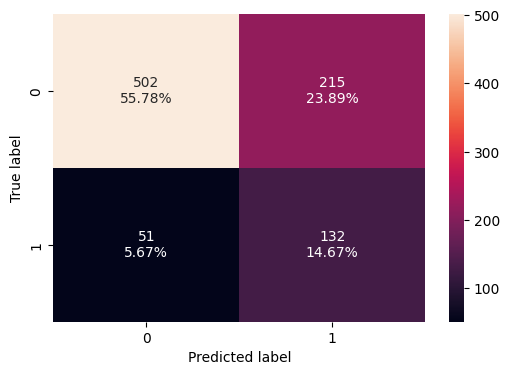

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 72.5% and Validation: 72.1%, good decent generalization with a decent validation recall score

### Neural Network with Earlystopping +  Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
smote = SMOTE(sampling_strategy=1, random_state=1,k_neighbors=5,n_jobs=-1) #Oversampling
X_train_over,y_train_over = smote.fit_resample( X_train,y_train)

In [ ]:
print("Before: y_train\n",y_train.value_counts())
print("After: y_train_over\n",y_train_over.value_counts())
print("After: X_train_over Shape: {}, y_train_over shape: {}\n".format(X_train_over.shape,y_train_over.shape)) #Value counts after oversampling

Before: y_train
 Exited
0    5574
1    1426
Name: count, dtype: int64
After: y_train_over
 Exited
0    5574
1    5574
Name: count, dtype: int64
After: X_train_over Shape: (11148, 11), y_train_over shape: (11148,)



In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, recall ws 80 training and 72 validation , now, included early stopping improved.
batch_size=32
lr = 0.001

In [ ]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

SGD Model with Oversampled weights and Early stopping:
* SGD Optimizer with default learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: No Dropout/Batch_Norm,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_sgd_default_over = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_sgd_default_over.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu',kernel_initializer='he_normal'))
# Add second hidden layer with 64 neurons and 'relu' activation
model_sgd_default_over.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_sgd_default_over.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_sgd_default_over.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.SGD(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_sgd_default_over.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* 2nd hidden layer has 128 [o/p of first hidden layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
#Train the mode with oversampled data and Earlystopping
start=time.time()
history_sgd_default_over = model_sgd_default_over.fit(
        X_train_over,
        y_train_over,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs
        ,callbacks=[es] # with ES: 69(T), 70(V), without ES: 71(T), 62(V) , so ES performs better
    )
end=time.time()

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7001 - recall: 0.5700 - val_loss: 0.6158 - val_recall: 0.5464
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6216 - recall: 0.6376 - val_loss: 0.5875 - val_recall: 0.5902
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5963 - recall: 0.6712 - val_loss: 0.5748 - val_recall: 0.6175
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5843 - recall: 0.6893 - val_loss: 0.5676 - val_recall: 0.6284
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5769 - recall: 0.7005 - val_loss: 0.5621 - val_recall: 0.6339
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5716 - recall: 0.7061 - val_loss: 0.5576 - val_recall: 0.6448
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5674 - recall: 0.7076 - val_loss: 0.5540 - val_recall: 0.6612
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5638 - recall: 0.7111 - val_loss: 0.5508 - val_recall: 0.6995


**Plots for Loss and recall**

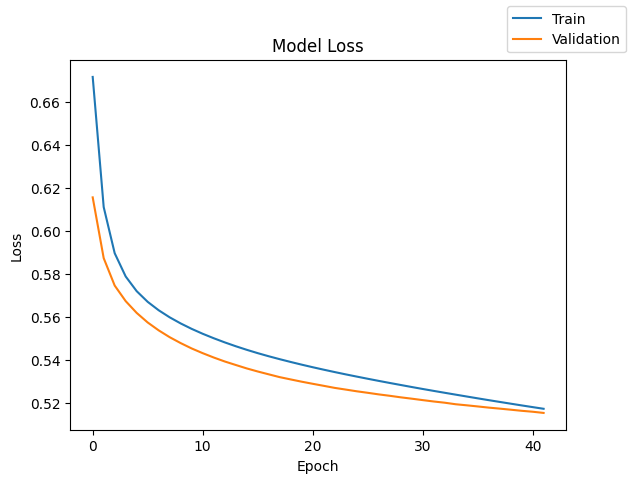

In [ ]:
plot(history_sgd_default_over,"loss")

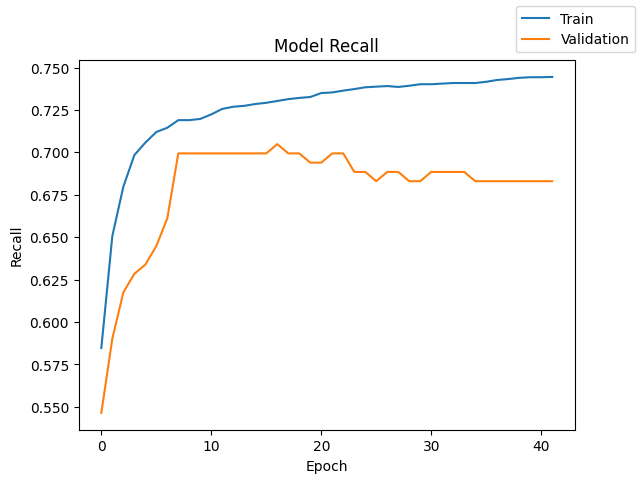

In [ ]:
plot(history_sgd_default_over,"recall")

For both training and Validation,
* Loss: Loss gradually declines as smooth curve with validation loss lesser than training loss.
* Recall: Recall drastically raises for training while it gradually raises for validation, but has oscillations.

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_sgd_default_over.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train_over,y_train_pred)
train_recall_score

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.7158234660925726

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_sgd_default_over.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.6994535519125683

In [ ]:
# Merge data into results
model_name = 'NN with SGD + ES + Oversampled'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,"SGD",[0.001,"-"],"he_normal","-",
                                 history_sgd_default_over.history['loss'][-1],history_sgd_default_over.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]
results

# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout                           4   
NN with Adam + ES + Balanced + 3Dropout + Reduc...                4   
NN with SGD + ES + Oversampled                                    2   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout                   [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...        [32, 128, 64, 32]   
NN with SGD + ES + Oversampled                                    [128, 64]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout                       [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...            [relu, relu, relu, relu]   
NN with SGD + ES + Oversampled                                            [relu, relu]   

                                                    # epochs  batch size  \
NN with SGD                                               50          32   
NN with Adam                                              50          32   
NN with Adam - 2 Dropout                                 100          32   
NN with Default Adam - 1 Dropout                         100          32   
NN with SGD + ES + Balanced                         <100[ES]          32   
NN with Adam + ES + Balanced                        <100[ES]          32   
NN with Adam + ES + Balanced + 1Dropout + LR Re...  <100[ES]          32   
NN with Adam + NO ES + Balanced + 3Dropout + LR...       100          64   
NN with Adam + ES + Balanced + 3Dropout             <100(ES)          32   
NN with Adam + ES + Balanced + 3Dropout + Reduc...  <100[ES]          32   
NN with SGD + ES + Oversampled                      <100[ES]          32   

                                                   optimizer  \
NN with SGD                                              SGD   
NN with Adam                                            Adam   
NN with Adam - 2 Dropout                                Adam   


Recall for training: 71.6% and Validation: 70%,  Need to check with Adam optimizer
* Note: Done this experiment with and without Early stopping and concluded that with Earlystopping,validation recall is 70% while it was 62% without ES.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      5574
           1       0.75      0.72      0.73      5574

    accuracy                           0.74     11148
   macro avg       0.74      0.74      0.74     11148
weighted avg       0.74      0.74      0.74     11148



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       717
           1       0.43      0.70      0.53       183

    accuracy                           0.75       900
   macro avg       0.67      0.73      0.68       900
weighted avg       0.81      0.75      0.77       900



As per classification report, Weighted average : Recall for training: 74% and Validation: 75%

**Confusion Matrix for training and validation**

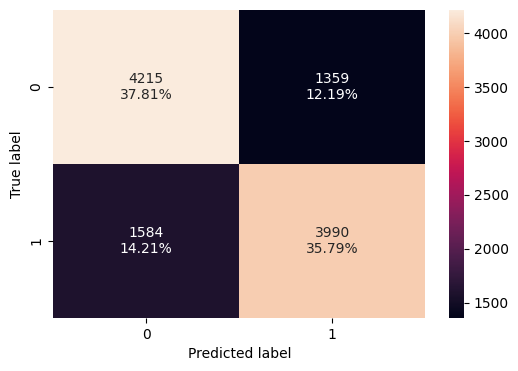

In [ ]:
make_confusion_matrix(y_train_over,y_train_pred)

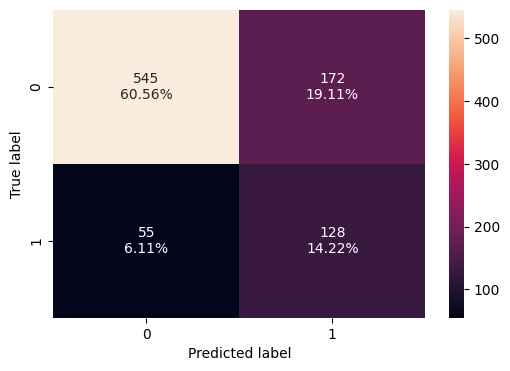

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 71.6% and Validation: 70%,  Need to check with Adam optimizer
* Note: Done this experiment with and without Early stopping and concluded that with Earlystopping,validation recall is 70% while it was 62% without ES.
* Recall Performance after balancing the weights, applying the early stopping have considerably improved. Need to consider Adam Optimizer.

### Neural Network with Earlystopping + Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
batch_size=32
lr = 0.001 # 1. with this lr - 94(T),67(V) , with reduced lr: - 82(T). 65(V)
#lr = 0.0001 # with reduced lr: - 82(T). 65(V)

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: No Dropout/Batch_Norm,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_default_over = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_default_over.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu',kernel_initializer='he_normal'))
# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_default_over.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_default_over.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_default_over.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_default_over.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* 2nd hidden layer has 128 [o/p of first hidden layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
# Train the model with oversampled data and Earlystopping criteria
start=time.time()
history_adam_default_over = model_adam_default_over.fit(
        X_train_over,
        y_train_over,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs
        ,callbacks=[es] #without ES, it is (T), (V), with ES: it is  (T)   (V)
    )
end=time.time()

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5737 - recall: 0.7131 - val_loss: 0.5386 - val_recall: 0.6940
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4953 - recall: 0.7579 - val_loss: 0.5260 - val_recall: 0.6940
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4662 - recall: 0.7775 - val_loss: 0.5273 - val_recall: 0.7158
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4441 - recall: 0.7908 - val_loss: 0.5271 - val_recall: 0.7104
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4271 - recall: 0.7987 - val_loss: 0.5309 - val_recall: 0.7158
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4124 - recall: 0.8081 - val_loss: 0.5363 - val_recall: 0.7322
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3999 - recall: 0.8163 - val_loss: 0.5385 - val_recall: 0.7432
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3882 - recall: 0.8272 - val_loss: 0.5421 - val_recall: 0.7432


**Plots for Loss and recall**

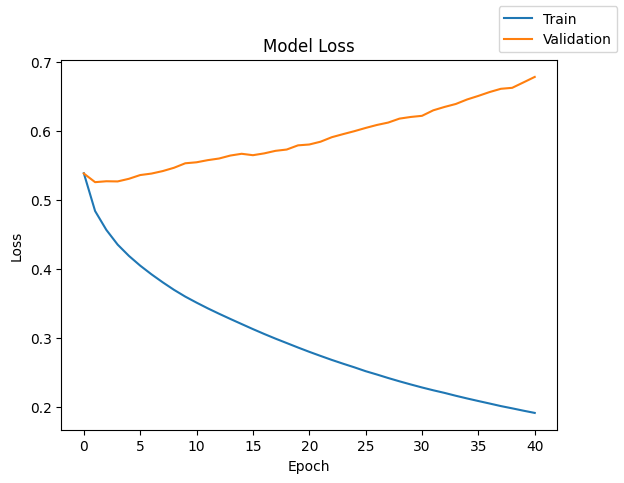

In [ ]:
plot(history_adam_default_over,"loss")

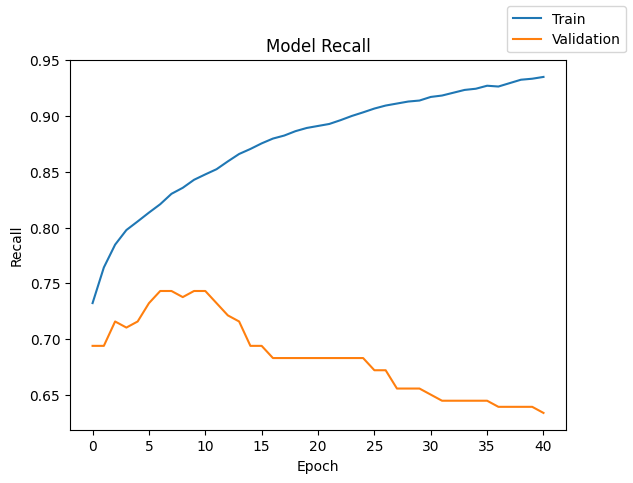

In [ ]:
plot(history_adam_default_over,"recall")

* Loss: Loss dreases smoothly for training while it increases drastically for validation.
* Recall: Recall drastically raises for training while it gradually raises and falls for validation, and has oscillations.
Model is overfitting and validation performance is way too low.
  * Tested once with different learning rate , with current learning rate - 94(T),67(V) , with reduced lr - 0.0001: - 82(T). 65(V), No matter what the learning rate is, model is overfitting and performance on validation is very less. Not documented the reduced learning rate.
  * Need to try with Dropout of 0.5 with Adam with oversampled data as model is overfitting.

**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_default_over.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train_over,y_train_pred)
train_recall_score

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.9456404736275565

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_default_over.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.6830601092896175

In [ ]:
# Merge data into results
model_name = 'NN with Adam + ES + Oversampled'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,"Adam",[0.001,"-"],"he_normal","-",
                                 history_adam_default_over.history['loss'][-1],history_adam_default_over.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]
results

# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout                           4   
NN with Adam + ES + Balanced + 3Dropout + Reduc...                4   
NN with SGD + ES + Oversampled                                    2   
NN with Adam + ES + Oversampled                                   2   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout                   [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...        [32, 128, 64, 32]   
NN with SGD + ES + Oversampled                                    [128, 64]   
NN with Adam + ES + Oversampled                                   [128, 64]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout                       [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...            [relu, relu, relu, relu]   
NN with SGD + ES + Oversampled                                            [relu, relu]   
NN with Adam + ES + Oversampled                                           [relu, relu]   

                                                    # epochs  batch size  \
NN with SGD                                               50          32   
NN with Adam                                              50          32   
NN with Adam - 2 Dropout                                 100          32   
NN with Default Adam - 1 Dropout                         100          32   
NN with SGD + ES + Balanced                         <100[ES]          32   
NN with Adam + ES + Balanced                        <100[ES]          32   
NN with Adam + ES + Balanced + 1Dropout + LR Re...  <100[ES]          32   
NN with Adam + NO ES + Balanced + 3Dropout + LR...       100          64   
NN with Adam + ES + Balanced + 3Dropout             <100(ES)          32   
NN with Adam + ES + Balanced + 3Dropout + Reduc...  <100[ES]          32   
NN with SGD + ES + Oversampled                      <100[ES]          32   
NN with Adam + ES

Recall for training: 94.5% and Validation: 68%.   
* Tested once with different learning rate , with current learning rate - 94(T),67(V) , with reduced lr - 0.0001: - 82(T). 65(V),
  * No matter what the learning rate is, model is overfitting and performance on validation is very less. Not documented the reduced learning rate.
* Need to try with Dropout of 0.5 with Adam with oversampled data as model is overfitting.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5574
           1       0.84      0.95      0.89      5574

    accuracy                           0.89     11148
   macro avg       0.89      0.89      0.89     11148
weighted avg       0.89      0.89      0.89     11148



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       717
           1       0.44      0.68      0.53       183

    accuracy                           0.76       900
   macro avg       0.67      0.73      0.68       900
weighted avg       0.81      0.76      0.77       900



As per classification report, Weighted average : Recall for training: 89% and Validation: 76%.    
* Tested once with different learning rate , with current learning rate - 94(T),67(V) , with reduced lr - 0.0001: - 82(T). 65(V),
  * No matter what the learning rate is, model is overfitting and performance on validation is very less. Not documented the reduced learning rate.
* Need to try with Dropout of 0.5 with Adam with oversampled data as model is overfitting.

**Confusion Matrix for training and validation**

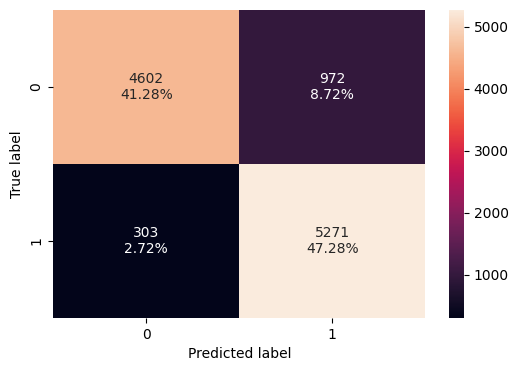

In [ ]:
make_confusion_matrix(y_train_over,y_train_pred)

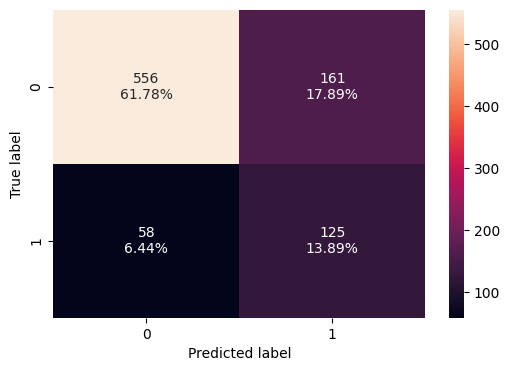

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 94.5% and Validation: 68%.   
* Tested once with different learning rate , with current learning rate - 94(T),67(V) , with reduced lr - 0.0001: - 82(T). 65(V),
  * No matter what the learning rate is, model is overfitting and performance on validation is very less. Not documented the reduced learning rate.
* Need to try with Dropout of 0.5 with Adam with oversampled data as model is overfitting.

### Neural Network with Earlystopping, Balanced Data (by applying SMOTE), Default Adam Optimizer, Std learning Rate and 1 Dropout

* def: 2 hidden layers: DR - 0.5
 * with lr of 0.001,
 * with lr of 0.0001
* i/p(32),dr(0.3),1 hidden layers(128),dr(0.5),1 hidden layer(64),o/p(1):
  * with lr of 0.001,
  * with lr of 0.0001

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
batch_size=32
lr = 0.001 # (T),(V)
#lr = 0.0001 #1. with ES,  (t),  (v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, decreased val_recall.
dr = 0.5

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout 0.5,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_do_over = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_do_over.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu',kernel_initializer='he_normal'))
# Add Dropout of 0.5 as it yielded results
model_adam_do_over.add(Dropout(dr))
# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_do_over.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_do_over.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_do_over.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_do_over.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* Dropout layer of 0.5
* 2nd hidden layer has 64 [o/p of Dropout layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
# Train the model with oversampled data and with earlystopping
start=time.time()
history_adam_do_over = model_adam_do_over.fit(
        X_train_over,
        y_train_over,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs
        ,callbacks=[es] #without ES, it  to  (T), (V)
    )
end=time.time()

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6833 - recall: 0.6331 - val_loss: 0.5515 - val_recall: 0.7268
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5826 - recall: 0.6990 - val_loss: 0.5358 - val_recall: 0.7158
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5605 - recall: 0.7108 - val_loss: 0.5195 - val_recall: 0.6940
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5451 - recall: 0.7219 - val_loss: 0.5114 - val_recall: 0.6995
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5368 - recall: 0.7358 - val_loss: 0.5003 - val_recall: 0.6612
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5214 - recall: 0.7488 - val_loss: 0.5138 - val_recall: 0.6940
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5146 - recall: 0.7418 - val_loss: 0.5038 - val_recall: 0.6831
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5068 - recall: 0.7557 - val_loss: 0.5037 - val_recall: 0.6885


**Plots for Loss and recall**

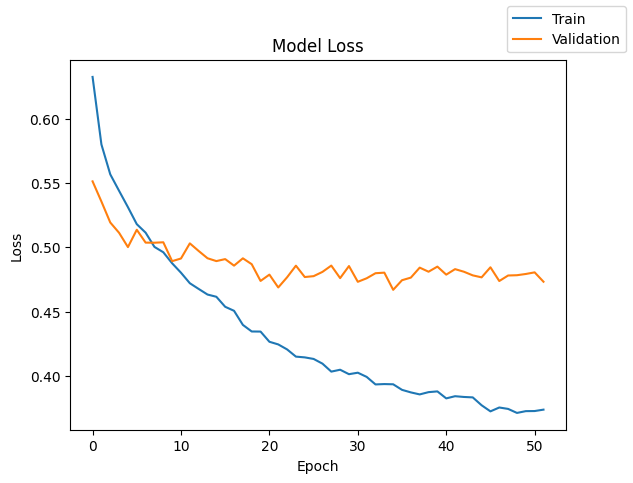

In [ ]:
plot(history_adam_do_over,"loss")

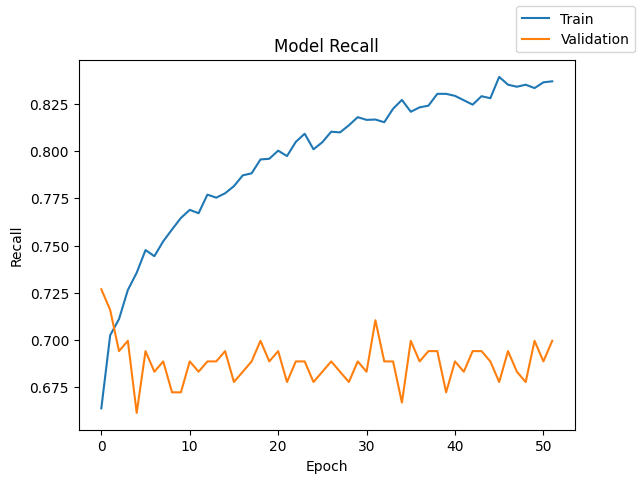

In [ ]:
plot(history_adam_do_over,"recall")


* Loss: training Loss steeply decreases while validation loss gradually decreases but has osciallations.
* Recall: Recall for training increases steadily while itis lower for validation, and has oscillations.


**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_do_over.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train_over,y_train_pred)
train_recall_score

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8668819519196268

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_do_over.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.7103825136612022

In [ ]:
# Merge data into results
model_name = 'NN with Adam + ES + Oversampled + 1Dropout'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,"Adam",[0.001,"-"],"he_normal",["Dropout(0.5)"],
                                 history_adam_do_over.history['loss'][-1],history_adam_do_over.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]

results


# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout                           4   
NN with Adam + ES + Balanced + 3Dropout + Reduc...                4   
NN with SGD + ES + Oversampled                                    2   
NN with Adam + ES + Oversampled                                   2   
NN with Adam + ES + Oversampled + 1Dropout                        2   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout                   [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...        [32, 128, 64, 32]   
NN with SGD + ES + Oversampled                                    [128, 64]   
NN with Adam + ES + Oversampled                                   [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout                        [128, 64]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout                       [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...            [relu, relu, relu, relu]   
NN with SGD + ES + Oversampled                                            [relu, relu]   
NN with Adam + ES + Oversampled                                           [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout                                [relu, relu]   

                                                    # epochs  batch size  \
NN with SGD                                               50          32   
NN with Adam                                              50          32   
NN with Adam - 2 Dropout                                 100          32   
NN with Default Adam - 1 Dropout                         100          32   
NN with SGD + ES + Balanced                         <100[ES]          32   
NN with Adam + ES + Balanced                        <100[ES]          32   
NN with Adam + ES + Balanced + 1Dropout + LR Re...  <100[ES]          32   
NN with Adam + NO ES + Balanced + 3Dropout + LR...       100          64   
NN wi

Recall for training:86.6% and Validation: 71%, model overfits and has poor generalization

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      5574
           1       0.84      0.87      0.85      5574

    accuracy                           0.85     11148
   macro avg       0.85      0.85      0.85     11148
weighted avg       0.85      0.85      0.85     11148



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       717
           1       0.47      0.71      0.57       183

    accuracy                           0.78       900
   macro avg       0.69      0.75      0.71       900
weighted avg       0.83      0.78      0.80       900



As per classification report, Weighted average : Recall for training:85% and Validation:78%, model overfits and has poor generalization

**Confusion Matrix for training and validation**

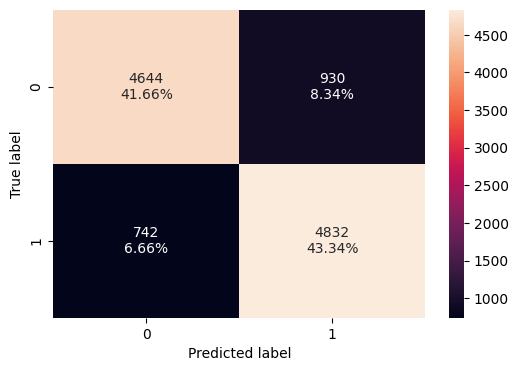

In [ ]:
make_confusion_matrix(y_train_over,y_train_pred)

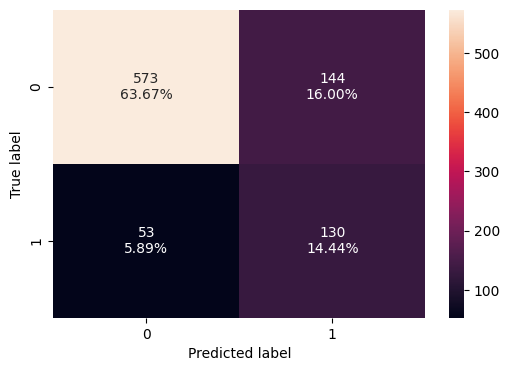

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training:86.6% and Validation: 71%, model overfits and has poor generalization

### Neural Network with Earlystopping, Balanced Data (by applying SMOTE), Default Adam Optimizer, Reduced learning Rate and 1 Dropout

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
batch_size=32
#lr = 0.001 # (T),(V)
lr = 0.0001 #1. with ES,  (t),  (v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, decreased val_recall.
dr = 0.5

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 2 Hidden layers - 128,64 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout 0.5,
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_do_over = Sequential()
# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_do_over.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu',kernel_initializer='he_normal'))
# Add Dropout of 0.5 as it yielded results
model_adam_do_over.add(Dropout(dr))
# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_do_over.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_do_over.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_do_over.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_do_over.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints
* 128 * 11 + 128 bias as total params for first hidden layer and
* Dropout layer of 0.5
* 2nd hidden layer has 64 [o/p of Dropout layer] * 64 + 64 bias as total params for 2nd hidden layer and
* O/p layer has 1 neuron so, 64 [o/p of 2nd hidden layer] * 1 + 1 bias as total params for o/p layer

In [ ]:
# Train the model with oversampled data and Early stopping.
start=time.time()
history_adam_do_over = model_adam_do_over.fit(
        X_train_over,
        y_train_over,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs
        ,callbacks=[es] #without ES, it  to  (T), (V)
    )
end=time.time()

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8064 - recall: 0.5261 - val_loss: 0.6018 - val_recall: 0.6995
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6632 - recall: 0.6364 - val_loss: 0.5710 - val_recall: 0.7049
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6347 - recall: 0.6548 - val_loss: 0.5676 - val_recall: 0.6995
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6158 - recall: 0.6674 - val_loss: 0.5682 - val_recall: 0.7104
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6131 - recall: 0.6726 - val_loss: 0.5553 - val_recall: 0.7049
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6013 - recall: 0.6810 - val_loss: 0.5592 - val_recall: 0.7104
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5966 - recall: 0.6894 - val_loss: 0.5641 - val_recall: 0.7377
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5980 - recall: 0.6947 - val_loss: 0.5562 - val_recall: 0.7322


**Plots for Loss and recall**

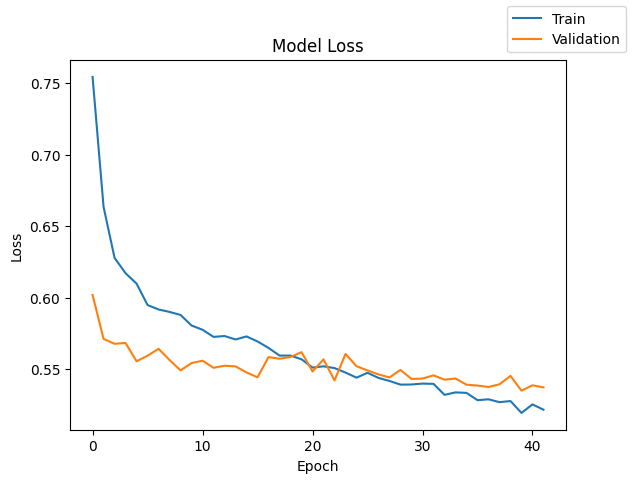

In [ ]:
plot(history_adam_do_over,"loss")

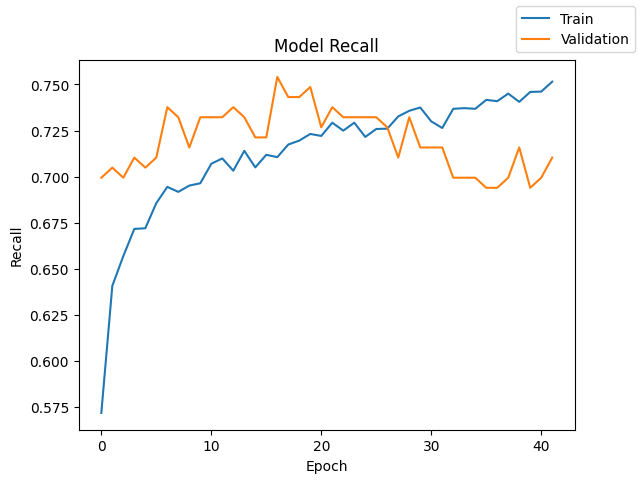

In [ ]:
plot(history_adam_do_over,"recall")


* Loss: validation loss gradually decreases and is typically is lesser than training loss which steeply decreases.
* Recall: Recall for training steeply increases while it starts high for validation and gradually drops, and both have oscillations.


**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_do_over.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train_over,y_train_pred)
train_recall_score

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.7974524578399713

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_do_over.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.7377049180327869

In [ ]:
# Merge data into results
model_name = 'NN with Adam + ES + Oversampled + 1Dropout + LR Reduced'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,"Adam",[0.0001,"-"],"he_normal",["Dropout(0.5)"],
                                 history_adam_do_over.history['loss'][-1],history_adam_do_over.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]

results


# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout                           4   
NN with Adam + ES + Balanced + 3Dropout + Reduc...                4   
NN with SGD + ES + Oversampled                                    2   
NN with Adam + ES + Oversampled                                   2   
NN with Adam + ES + Oversampled + 1Dropout                        2   
NN with Adam + ES + Oversampled + 1Dropout + LR...                2   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout                   [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...        [32, 128, 64, 32]   
NN with SGD + ES + Oversampled                                    [128, 64]   
NN with Adam + ES + Oversampled                                   [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout                        [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout + LR...                [128, 64]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout                       [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...            [relu, relu, relu, relu]   
NN with SGD + ES + Oversampled                                            [relu, relu]   
NN with Adam + ES + Oversampled                                           [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout                                [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout + LR...                        [relu, relu]   

                                                    # epochs  batch size  \
NN with SGD                                               50          32   
NN with Adam                                              50          32   
NN with Adam - 2 Dropout                                 100          32   
NN with Default Adam - 1 Dropout                         100          32   
NN with SGD + ES + Balanced                         <100[ES]         

Recall for training:79.7% and Validation: 73.7%, though it has comparatively decent generalization, validation recall score as such is mediocre at its best.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.70      0.73      5574
           1       0.73      0.80      0.76      5574

    accuracy                           0.75     11148
   macro avg       0.75      0.75      0.75     11148
weighted avg       0.75      0.75      0.75     11148



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       717
           1       0.40      0.74      0.52       183

    accuracy                           0.72       900
   macro avg       0.66      0.73      0.66       900
weighted avg       0.81      0.72      0.75       900



As per classification report, Weighted average : Recall for training: 75% and Validation: 72%, though it has comparatively decent generalization, validation recall score as such is mediocre at its best.

**Confusion Matrix for training and validation**

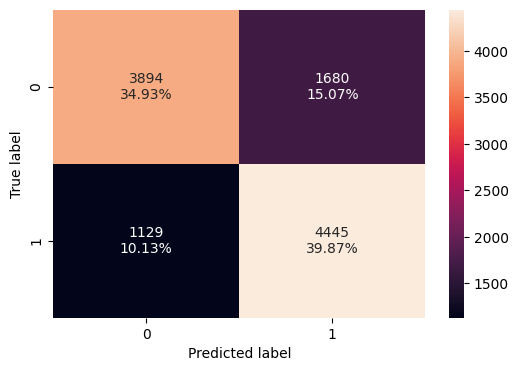

In [ ]:
make_confusion_matrix(y_train_over,y_train_pred)

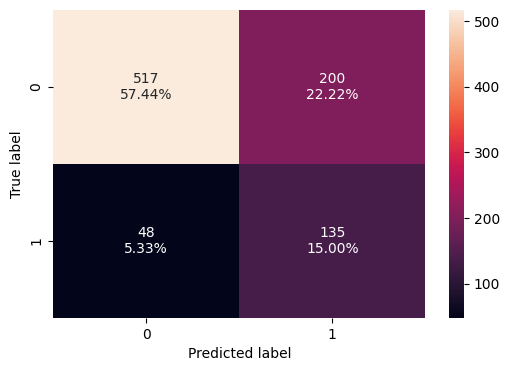

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training:79.7% and Validation:73.7%, though it has comparatively decent generalization, validation recall score as such is mediocre at its best.

### Neural Network with Earlystopping,Balanced Data (by applying SMOTE), Diff NN, Adam Optimizer, Std learning Rate and 3 Dropout

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
batch_size=32
lr = 0.001 # (T),(V)
#lr = 0.0001 #1. with ES,  (t),  (v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, decreased val_recall.
#dr = 0.5

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 1 i/p(32), 3 Hidden layers - 128,64,32 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout after i/p 0.3, Dropout b/w hidden layers 0.5, Dropout before o/p 0.3
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_diff_do_over = Sequential()

# Add input layer with 32 neurons and 'relu' activation
model_adam_diff_do_over.add(Dense(input_dim=X_train.shape[1], units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_over.add(Dropout(0.3))

# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_diff_do_over.add(Dense(units=128, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.5 as it yielded results
model_adam_diff_do_over.add(Dropout(0.5))

# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_diff_do_over.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add third hidden layer with 32 neurons and 'relu' activation
model_adam_diff_do_over.add(Dense(units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_over.add(Dropout(0.3))

# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_diff_do_over.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_diff_do_over.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_diff_do_over.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints summary of params in each layer accounting for dropout %


In [ ]:
# Train the model for all epochs, without ES and with ES metrics have been calculated on same code.
start=time.time()
history_adam_diff_do_over = model_adam_diff_do_over.fit(
        X_train_over,
        y_train_over,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs
        #,callbacks=[es] #without ES, it  to  (T), (V)
    )
end=time.time()

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.7394 - recall: 0.5799 - val_loss: 0.5919 - val_recall: 0.6885
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6286 - recall: 0.6647 - val_loss: 0.5616 - val_recall: 0.7377
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5975 - recall: 0.7344 - val_loss: 0.5494 - val_recall: 0.7432
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5856 - recall: 0.7421 - val_loss: 0.5440 - val_recall: 0.7213
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5724 - recall: 0.7376 - val_loss: 0.5309 - val_recall: 0.7268
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5636 - recall: 0.7494 - val_loss: 0.5311 - val_recall: 0.7158
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5508 - recall: 0.7340 - val_loss: 0.5317 - val_recall: 0.6940
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5470 - recall: 0.7196 - val_loss: 0.5253 - val_recall: 0.6831


**Plots for Loss and recall**

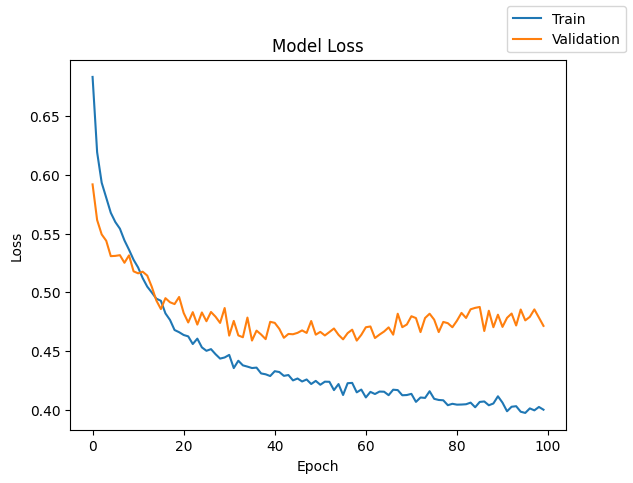

In [ ]:
plot(history_adam_diff_do_over,"loss")

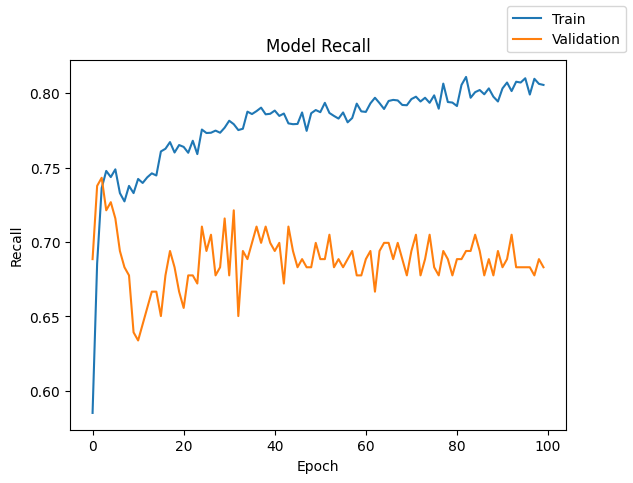

In [ ]:
plot(history_adam_diff_do_over,"recall")


* Loss: Both validation adn training loss steeply decreases, then validation loss increases than training loss but has more oscillations in both.
* Recall: Recall for training steeply increases and maintains the course while it steeply increases and decreases for validation, maintains the course and has oscillations.


**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_diff_do_over.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train_over,y_train_pred)
train_recall_score

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8322569070685325

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_diff_do_over.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.6830601092896175

In [ ]:
# Merge data into results
model_name = 'NN with Adam + NO ES + Oversampled + 3Dropout'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"100",32,"Adam",[0.001,"-"],"he_normal",["Dropout(0.3)","Dropout(0.5)","Dropout(0.3)"],
                                 history_adam_diff_do_over.history['loss'][-1],history_adam_diff_do_over.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]

results


# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout                           4   
NN with Adam + ES + Balanced + 3Dropout + Reduc...                4   
NN with SGD + ES + Oversampled                                    2   
NN with Adam + ES + Oversampled                                   2   
NN with Adam + ES + Oversampled + 1Dropout                        2   
NN with Adam + ES + Oversampled + 1Dropout + LR...                2   
NN with Adam + NO ES + Oversampled + 3Dropout                     4   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout                   [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...        [32, 128, 64, 32]   
NN with SGD + ES + Oversampled                                    [128, 64]   
NN with Adam + ES + Oversampled                                   [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout                        [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout + LR...                [128, 64]   
NN with Adam + NO ES + Oversampled + 3Dropout             [32, 128, 64, 32]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout                       [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...            [relu, relu, relu, relu]   
NN with SGD + ES + Oversampled                                            [relu, relu]   
NN with Adam + ES + Oversampled                                           [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout                                [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout + LR...                        [relu, relu]   
NN with Adam + NO ES + Oversampled + 3Dropout                 [relu, relu, relu, relu]   

                                                    # epochs  batch size  \
NN with SGD                                               50          32   
NN with Adam                                             

Recall for training: 83% and Validation: 68%, model is clearly overfitting and validation recall drops.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5574
           1       0.84      0.83      0.84      5574

    accuracy                           0.84     11148
   macro avg       0.84      0.84      0.84     11148
weighted avg       0.84      0.84      0.84     11148



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       717
           1       0.47      0.68      0.55       183

    accuracy                           0.78       900
   macro avg       0.69      0.74      0.70       900
weighted avg       0.82      0.78      0.79       900



As per classification report, Weighted average : Recall for training: 83% and Validation:78%, model is clearly overfitting and validation recall drops.

**Confusion Matrix for training and validation**

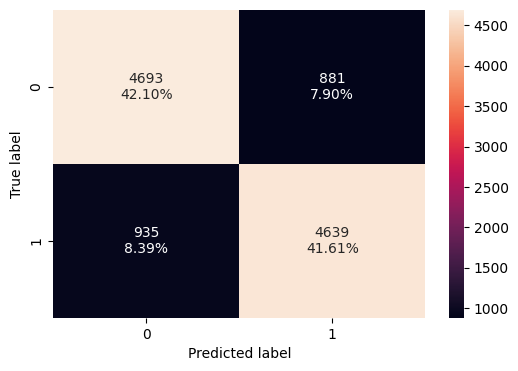

In [ ]:
make_confusion_matrix(y_train_over,y_train_pred)

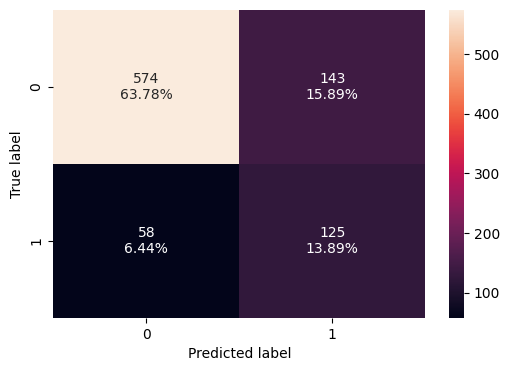

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training:83% and Validation: 68%, model is clearly overfitting and validation recall drops.

### Neural Network with NO Earlystopping, Balanced Data (by applying SMOTE), Diff NN, Adam Optimizer, Reduced learning Rate and 3 Dropout

In [ ]:
# Starting with default batch_size, epochs as 50, learning rate as 0.001
epochs=100 # on 100, now, included early stopping improved.
batch_size=32
#lr = 0.001 # (T),(V)
lr = 0.0001 #1. with ES,  (t),  (v) lr reduced helped in generalization with ES.2. stopping ES - full epochs, decreased val_recall.
#dr = 0.5

In [ ]:
# Set Randomstate
np.random.seed(812)
random.seed(812)
tf.random.set_seed(812)

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_recall',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='max', restore_best_weights= True, start_from_epoch=20)

Adam Model with balanced weights and Early stopping:
* Adam Optimizer with specified learning Rate,
* 1 i/p(32), 3 Hidden layers - 128,64,32 with relu as activation functions,
* Weight_initializer: he_normal, as its the default for 'relu'
* Normalization: Dropout after i/p 0.3, Dropout b/w hidden layers 0.5, Dropout before o/p 0.3
* O/p layer: Sigmoid as its binary

In [ ]:
#Clear the backend session
tf.keras.backend.clear_session()
# Initialize the model
model_adam_diff_do_over = Sequential()

# Add input layer with 32 neurons and 'relu' activation
model_adam_diff_do_over.add(Dense(input_dim=X_train.shape[1], units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_over.add(Dropout(0.3))

# Add first hidden layer with 128 neurons and 'relu' activation
model_adam_diff_do_over.add(Dense(units=128, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.5 as it yielded results
model_adam_diff_do_over.add(Dropout(0.5))

# Add second hidden layer with 64 neurons and 'relu' activation
model_adam_diff_do_over.add(Dense(units=64, activation='relu',kernel_initializer='he_normal'))
# Add third hidden layer with 32 neurons and 'relu' activation
model_adam_diff_do_over.add(Dense(units=32, activation='relu',kernel_initializer='he_normal'))

# Add Dropout of 0.3 as it yielded results
model_adam_diff_do_over.add(Dropout(0.3))

# Add Output layer with 1 neuron and 'Sigmoid' activation as its binary prediction
model_adam_diff_do_over.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compilation - Specify configuration params for optimizer and Loss along with Recall as metric
metric = tf.keras.metrics.Recall()
model_adam_diff_do_over.compile(loss='binary_crossentropy', metrics=[metric],optimizer=tf.keras.optimizers.Adam(learning_rate=lr))

In [ ]:
#Print the summary of the model configured.
model_adam_diff_do_over.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Prints summary of params in each layer accounting for dropout %


In [ ]:
start=time.time()
history_adam_diff_do_over = model_adam_diff_do_over.fit(
        X_train_over,
        y_train_over,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs
        #,callbacks=[es] #without ES, it  to  (T), (V)
    )
end=time.time()

Epoch 1/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.9369 - recall: 0.6667 - val_loss: 0.6544 - val_recall: 0.4699
Epoch 2/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7391 - recall: 0.5430 - val_loss: 0.6371 - val_recall: 0.5246
Epoch 3/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6914 - recall: 0.5465 - val_loss: 0.6354 - val_recall: 0.6011
Epoch 4/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6797 - recall: 0.5685 - val_loss: 0.6314 - val_recall: 0.6284
Epoch 5/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6677 - recall: 0.5629 - val_loss: 0.6337 - val_recall: 0.6721
Epoch 6/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.6609 - recall: 0.5869 - val_loss: 0.6242 - val_recall: 0.6612
Epoch 7/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6501 - recall: 0.6089 - val_loss: 0.6204 - val_recall: 0.6885
Epoch 8/100
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6442 - recall: 0.6213 - val_loss: 0.6079 - val_recall: 0.6885


**Plots for Loss and recall**

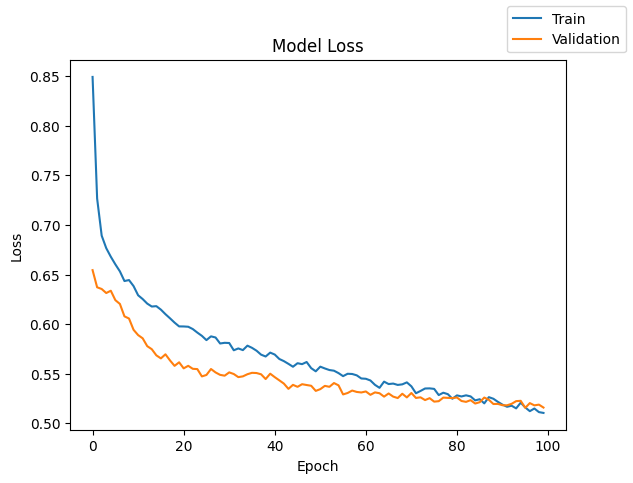

In [ ]:
plot(history_adam_diff_do_over,"loss")

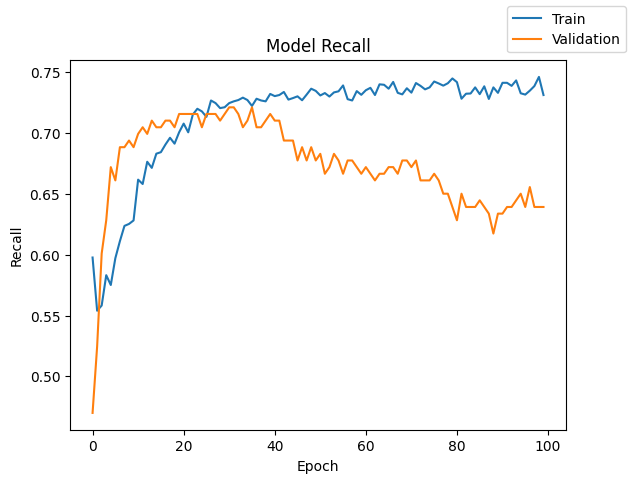

In [ ]:
plot(history_adam_diff_do_over,"recall")

For both training and validation,
* Loss: Loss steeply declines initially and then, gradually declines and converges
* Recall: Recall steeply increases for validation and then drops, training recall increases and exceeds validation recall and both have oscillations.


**Predictions for training and validation to calculate recall_score for both training and testing.**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = model_adam_diff_do_over.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train_over,y_train_pred)
train_recall_score

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.7585217079296734

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = model_adam_diff_do_over.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.639344262295082

In [ ]:
# Merge data into results
model_name = 'NN with Adam + ES + Oversampled + 3Dropout + LR Reduced'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#results.drop(model_name,axis=0,inplace=True)
results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"<100[ES]",32,"Adam",[0.0001,"-"],"he_normal",["Dropout(0.3)","Dropout(0.5)","Dropout(0.3)"],
                                 history_adam_diff_do_over.history['loss'][-1],history_adam_diff_do_over.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, round(end-start,2)]

results


# hidden layers  \
NN with SGD                                                       2   
NN with Adam                                                      2   
NN with Adam - 2 Dropout                                          3   
NN with Default Adam - 1 Dropout                                  2   
NN with SGD + ES + Balanced                                       2   
NN with Adam + ES + Balanced                                      2   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                2   
NN with Adam + NO ES + Balanced + 3Dropout + LR...                4   
NN with Adam + ES + Balanced + 3Dropout                           4   
NN with Adam + ES + Balanced + 3Dropout + Reduc...                4   
NN with SGD + ES + Oversampled                                    2   
NN with Adam + ES + Oversampled                                   2   
NN with Adam + ES + Oversampled + 1Dropout                        2   
NN with Adam + ES + Oversampled + 1Dropout + LR...                2   
NN with Adam + NO ES + Oversampled + 3Dropout                     4   
NN with Adam + ES + Oversampled + 3Dropout + LR...                4   

                                                   # neurons - hidden layer  \
NN with SGD                                                       [128, 64]   
NN with Adam                                                      [128, 64]   
NN with Adam - 2 Dropout                                      [128, 64, 32]   
NN with Default Adam - 1 Dropout                                  [128, 64]   
NN with SGD + ES + Balanced                                       [128, 64]   
NN with Adam + ES + Balanced                                      [128, 64]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                [128, 64]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...        [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout                   [32, 128, 64, 32]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...        [32, 128, 64, 32]   
NN with SGD + ES + Oversampled                                    [128, 64]   
NN with Adam + ES + Oversampled                                   [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout                        [128, 64]   
NN with Adam + ES + Oversampled + 1Dropout + LR...                [128, 64]   
NN with Adam + NO ES + Oversampled + 3Dropout             [32, 128, 64, 32]   
NN with Adam + ES + Oversampled + 3Dropout + LR...        [32, 128, 64, 32]   

                                                   activation function - hidden layer   \
NN with SGD                                                               [relu, relu]   
NN with Adam                                                              [relu, relu]   
NN with Adam - 2 Dropout                                            [relu, relu, relu]   
NN with Default Adam - 1 Dropout                                          [relu, relu]   
NN with SGD + ES + Balanced                                               [relu, relu]   
NN with Adam + ES + Balanced                                              [relu, relu]   
NN with Adam + ES + Balanced + 1Dropout + LR Re...                        [relu, relu]   
NN with Adam + NO ES + Balanced + 3Dropout + LR...            [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout                       [relu, relu, relu, relu]   
NN with Adam + ES + Balanced + 3Dropout + Reduc...            [relu, relu, relu, relu]   
NN with SGD + ES + Oversampled                                            [relu, relu]   
NN with Adam + ES + Oversampled                                           [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout                                [relu, relu]   
NN with Adam + ES + Oversampled + 1Dropout + LR...                        [relu, relu]   
NN with Adam + NO ES + Oversampled + 3Dropout                 [relu, relu, relu, relu]   
NN with Adam + ES + Oversampled + 3Dropout + LR...          

Recall for training:76% and Validation:64%, validation recall suffers a lot with oversampling.This model has poor generalization.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      5574
           1       0.81      0.76      0.78      5574

    accuracy                           0.79     11148
   macro avg       0.79      0.79      0.79     11148
weighted avg       0.79      0.79      0.79     11148



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       717
           1       0.46      0.64      0.53       183

    accuracy                           0.77       900
   macro avg       0.68      0.72      0.69       900
weighted avg       0.81      0.77      0.79       900



As per classification report, Weighted average : 79% on training, 77% on validation.

**Confusion Matrix for training and validation**

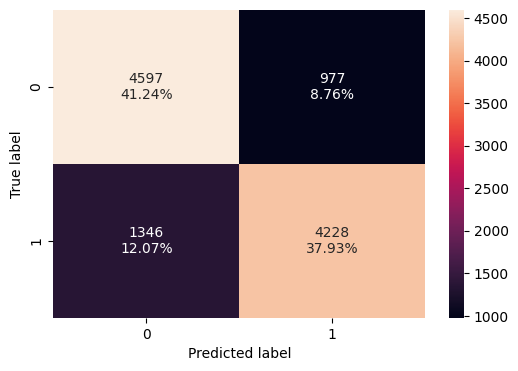

In [ ]:
make_confusion_matrix(y_train_over,y_train_pred)

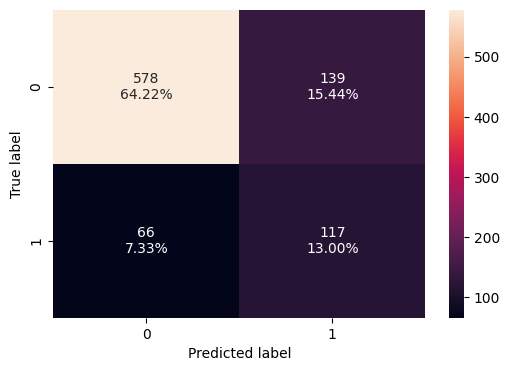

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training:76% and Validation: 64%, validation recall suffers a lot with oversampling.This model has poor generalization.

## Model Performance Comparison and Final Model Selection

###save Results to csv as GPU runtime disconnects sooner.

In [ ]:
# Save Results to CSV as GPU Runtime disconnects faster
results.to_csv('/content/drive/MyDrive/MyGreatLearning/3-Neural_Networks/Project/results_updated.csv', index=True) #Commenting out once done to prevent the accidental reloading of data.

In [ ]:
results.shape #Just checking the shape

(16, 14)

### Load Results to results DF from Google drive

In [ ]:
results_chk = pd.read_csv('/content/drive/MyDrive/MyGreatLearning/3-Neural_Networks/Project/results_updated.csv') # Check csv name before running as model column name is updated.

In [ ]:
results_chk.shape # just checking the shape.

(16, 15)

### Comparison within models for Generalization and good validation score.

In [ ]:
# Recall metrics for training and validation which generalizes well
results['diff_recall'] = results['train Recall'] - results['validation Recall']
filtered_Results = results[['diff_recall','train Recall', 'validation Recall']]
filtered_Results

diff_recall  train Recall  \
NN with SGD                                            0.031124      0.304348   
NN with Adam                                           0.231899      0.723703   
NN with Adam - 2 Dropout                               0.184650      0.692847   
NN with Default Adam - 1 Dropout                       0.096291      0.604488   
NN with SGD + ES + Balanced                            0.015305      0.747546   
NN with Adam + ES + Balanced                           0.136187      0.852034   
NN with Adam + ES + Balanced + 1Dropout + LR Re...     0.015359      0.802244   
NN with Adam + NO ES + Balanced + 3Dropout + LR...     0.063957      0.779804   
NN with Adam + ES + Balanced + 3Dropout                0.042126      0.807153   
NN with Adam + ES + Balanced + 3Dropout + Reduc...     0.004495      0.725806   
NN with SGD + ES + Oversampled                         0.016370      0.715823   
NN with Adam + ES + Oversampled                        0.262580      0.945640   
NN with Adam + ES + Oversampled + 1Dropout             0.156499      0.866882   
NN with Adam + ES + Oversampled + 1Dropout + LR...     0.059748      0.797452   
NN with Adam + NO ES + Oversampled + 3Dropout          0.149197      0.832257   
NN with Adam + ES + Oversampled + 3Dropout + LR...     0.119177      0.758522   

                                                    validation Recall  
NN with SGD                                                  0.273224  
NN with Adam                                                 0.491803  
NN with Adam - 2 Dropout                                     0.508197  
NN with Default Adam - 1 Dropout                             0.508197  
NN with SGD + ES + Balanced                                  0.732240  
NN with Adam + ES + Balanced                                 0.715847  
NN with Adam + ES + Balanced + 1Dropout + LR Re...           0.786885  
NN with Adam + NO ES + Balanced + 3Dropout + LR...           0.715847  
NN with Adam + ES + Balanced + 3Dropout                      0.765027  
NN with Adam + ES + Balanced + 3Dropout + Reduc...           0.721311  
NN with SGD + ES + Oversampled                               0.699454  
NN with Adam + ES + Oversampled                              0.683060  
NN with Adam + ES + Oversampled + 1Dropout                   0.710383  
NN with Adam + ES + Oversampled + 1Dropout + LR...           0.737705  
NN with Adam + NO ES + Oversampled + 3Dropout                0.683060  
NN with Adam + ES + Oversampled + 3Dropout + LR...           0.639344

In [ ]:
# Recall Metrics between training and validation in the order of least difference between them to generalize well and which has higher validation recall score.
filtered_Results.sort_values(by='diff_recall', ascending=True).style.apply(lambda x: ['background: lightyellow' if x.name in filtered_Results.nlargest(7, columns=['validation Recall']).index else '' for i in x], axis=1)

* In the above top 7 list of models which has good generalization and higher validation scores, We can see that Balanced weights have performed really well.
Considering higher validation recall[> 75%] with good generalization,
  * NN with Adam + ES + Balanced + 1Dropout + LR Reduced : 78.68%
  * NN with Adam + ES + Balanced + 3Dropout : 76.5%
* For these models, trying with Keras Tuner - Hyperband with a list of optimization params.

### Hypertuning these top Models with Keras Tuner

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558306422676713, 1: 4.908835904628331}

In [ ]:
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
tuner_results = pd.DataFrame(columns=columns) # COnstructing DF for tuned results from keras Tuner

#### Balanced Data , Default NN 128, 64 Neurons

This covers these models:But Search space is not restricted to the below config.
  * NN with Adam + ES + Balanced + 1Dropout + LR Reduced
  * NN with Adam + ES + Balanced + 1Dropout


In [ ]:
#1st trial - NOT Used
def build_model(hp):
    #batch_size = hp.Int('batch_size', min_value=16, max_value=128, step=16)
    #Model initialization
    model = keras.Sequential()
    #Vary 2 hidden layer neurons, Dropout, optimizer,lr
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                           activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_normal')) #1st hidden layer

    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))  #Dropout layer

    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32),
                           activation='relu',  kernel_initializer='he_normal')) #2nd hidden layer

    model.add(Dense(units=1, activation='sigmoid')) #output layer

    #Configuration
    # Define optimizer with hyperparameter tuning with diff values for optimizer and lr and momentum.
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'sgd_momentum'])
    if optimizer == 'sgd_momentum':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'), momentum=hp.Float('momentum', min_value=0.0, max_value=0.9, step=0.1))
    else:
        optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')


    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.Recall()]
    )

    return model

In [ ]:
#2nd trial - build model with specific layers and config
def build_model(hp):
    #batch_size = hp.Int('batch_size', min_value=16, max_value=128, step=16)
    #Model initialization
    model = keras.Sequential()
    #Vary  Dropout, optimizer,lr
    model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_normal')) #1st hidden layer

    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.7, step=0.1)))  #Dropout layer

    model.add(Dense(units= 64, activation='relu',  kernel_initializer='he_normal')) #2nd hidden layer

    model.add(Dense(units=1, activation='sigmoid')) #output layer

    #Configuration
    # Define optimizer with hyperparameter tuning with diff values for optimizer and lr and momentum.
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'sgd_momentum'])
    if optimizer == 'sgd_momentum':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'), momentum=hp.Float('momentum', min_value=0.0, max_value=0.9, step=0.1))
    else:
        optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')


    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.Recall()]
    )

    return model

In [ ]:
# Define the Hyperband tuner with max_epochs as 100 and store results in drive.
tuner_2ndTrial = Hyperband(
    build_model,
    objective='val_recall',
    max_epochs=100,
    factor=3,
    directory='/content/drive/MyDrive/MyGreatLearning/3-Neural_Networks/Project/KerasTunerResults',
    project_name='def_2layerNN_2ndTrial'
)

Reloading Tuner from /content/drive/MyDrive/MyGreatLearning/3-Neural_Networks/Project/KerasTunerResults/def_2layerNN_2ndTrial/tuner0.json


In [ ]:
# Define early stopping callback with warmup
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_recall',
    patience=20,
    restore_best_weights=True,
    min_delta=0.001,
    start_from_epoch=5,
    mode = 'max'
)

In [1]:
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
y_train = y_train.astype(int) #Ensure y_train is of type int
y_val = y_val.astype(int) #Ensure y_val is of type int
# Convert y_train and y_val to NumPy arrays
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
# Search for the best hyperparameters with class weights
tuner_2ndTrial.search(X_train,
             y_train_np,
             epochs=100,
             validation_data=(X_val, y_val_np),
             callbacks=[early_stopping],
             class_weight=cw_dict
             )

# Get the best hyperparameters
best_hps = tuner_2ndTrial.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_def_2nn = tuner_2ndTrial.hypermodel.build(best_hps)

NameError: name 'y_train' is not defined

In [ ]:
tuner_2ndTrial.save()

In [ ]:
y_train_np = y_train.to_numpy() # use numpy as model.fit and tuner.search works on numpy only
y_val_np = y_val.to_numpy() # use numpy as model.fit and tuner.search works on numpy only

In [ ]:
def trainModel(model):
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(812)
    random.seed(812)
    tf.random.set_seed(812)
    history = model.fit(
        X_train,
        y_train_np,  # Use NumPy array for y_train
        validation_data=(X_val, y_val_np),  # Use NumPy array for y_val
        epochs=100,
        class_weight=cw_dict,
        callbacks=[early_stopping]
    )
    return (history, model)

Top 1 Model:
  Trial ID: 0030
  Hyperparameters: {'dropout_rate': 0.6000000000000001, 'optimizer': 'adam', 'learning_rate': 0.00012917374266665043, 'momentum': 0.7000000000000001, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}
  Best Score: 0.9180327653884888
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3226 - recall: 0.6588 - val_loss: 0.6964 - val_recall: 0.8579
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2464 - recall: 0.6766 - val_loss: 0.6482 - val_recall: 0.8306
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2254 - recall: 0.7016 - val_loss: 0.6231 - val_recall: 0.8306
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2058 - recall: 0.7128 - val_loss: 0.6277 - val_recall: 0.8361
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1762 - recall: 0.7124 - val_loss: 0.6123 - val_recall: 0.8087
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1580 - recall: 0

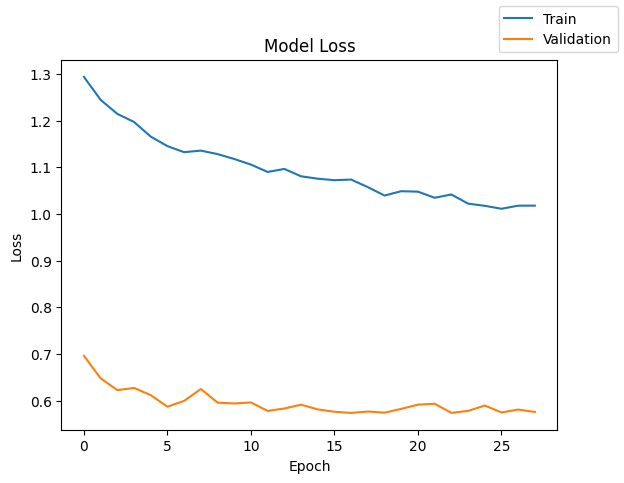

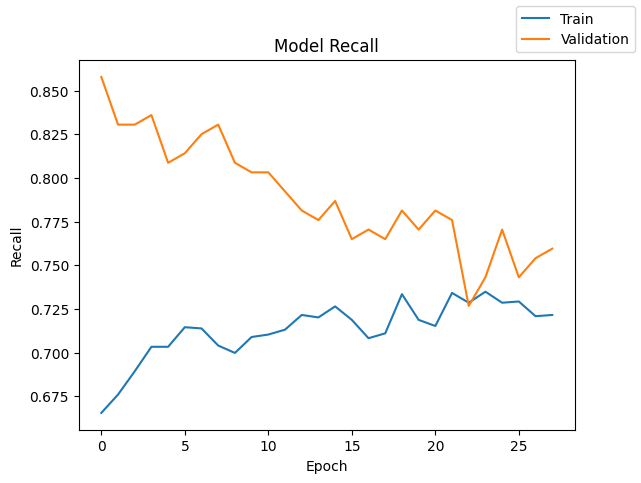

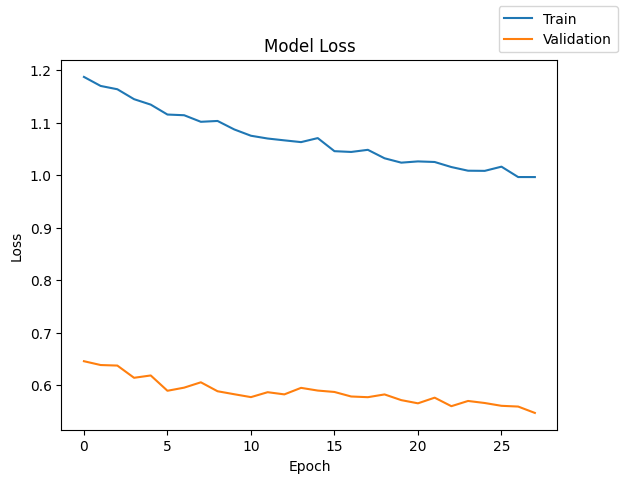

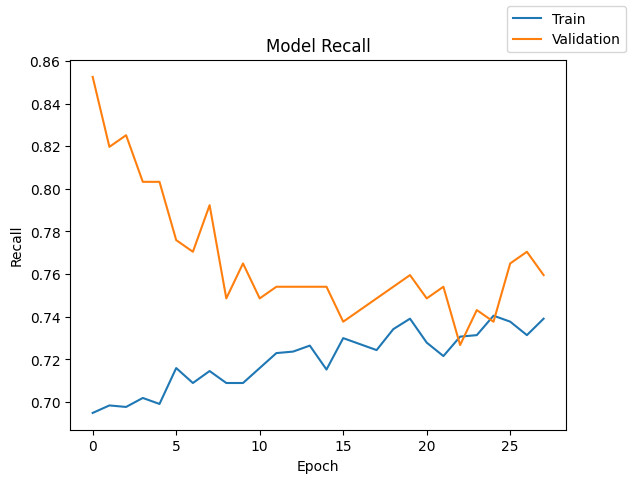

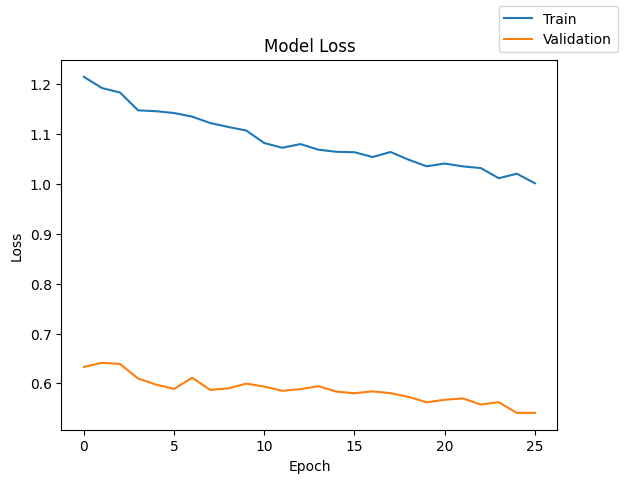

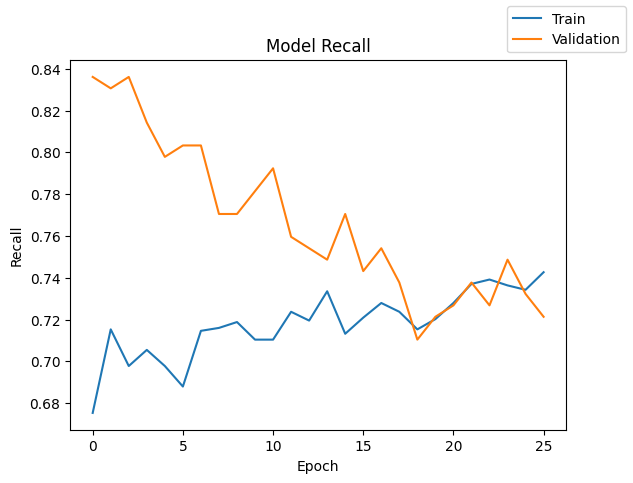

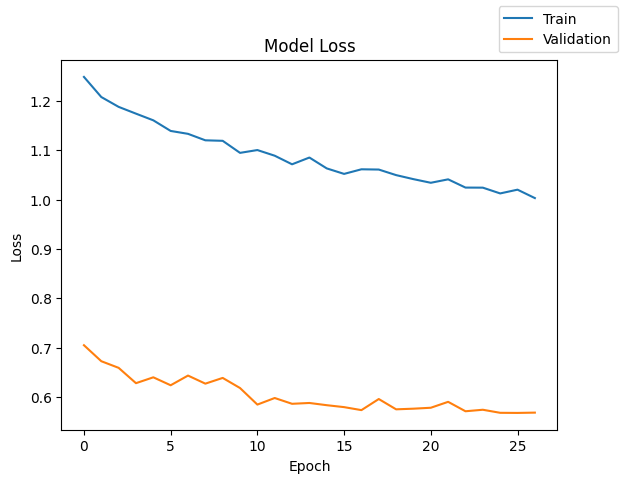

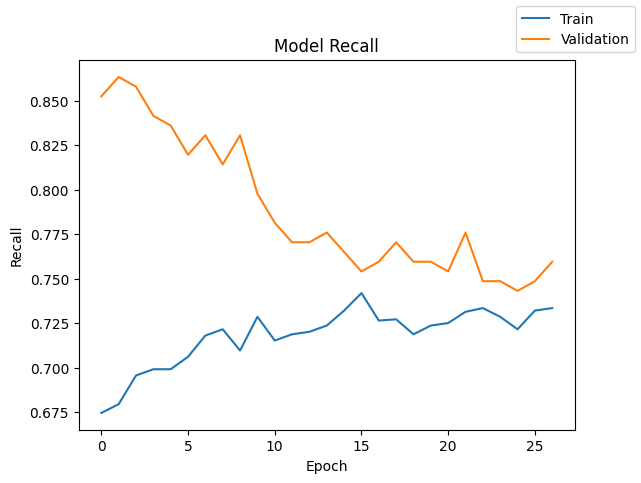

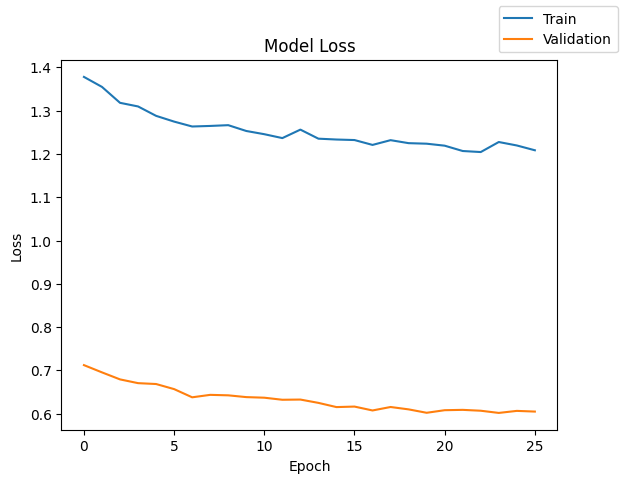

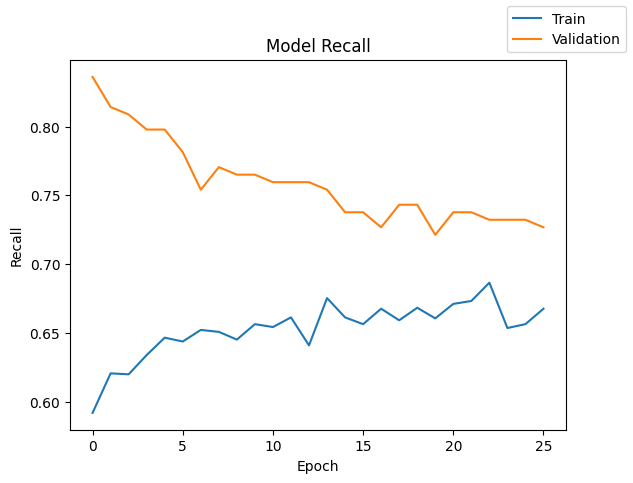

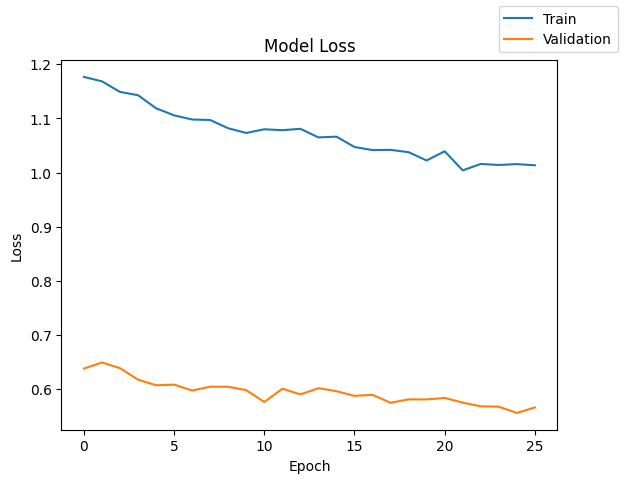

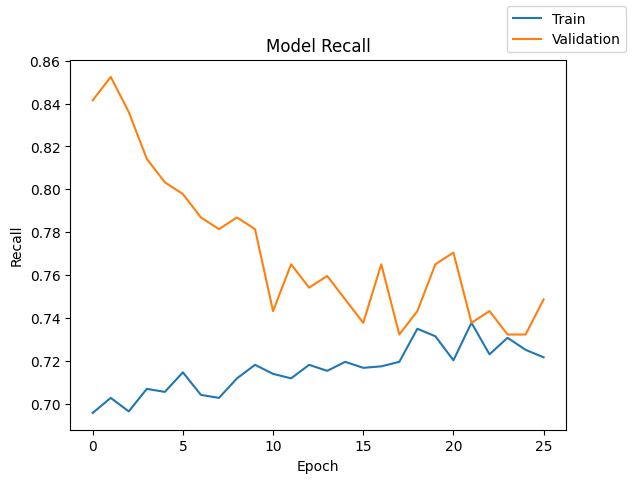

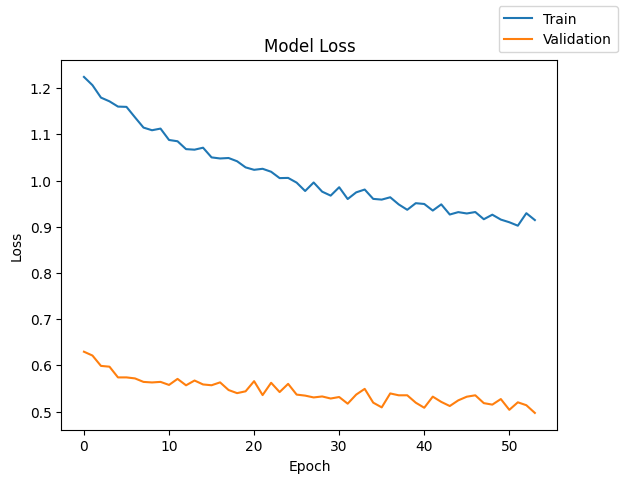

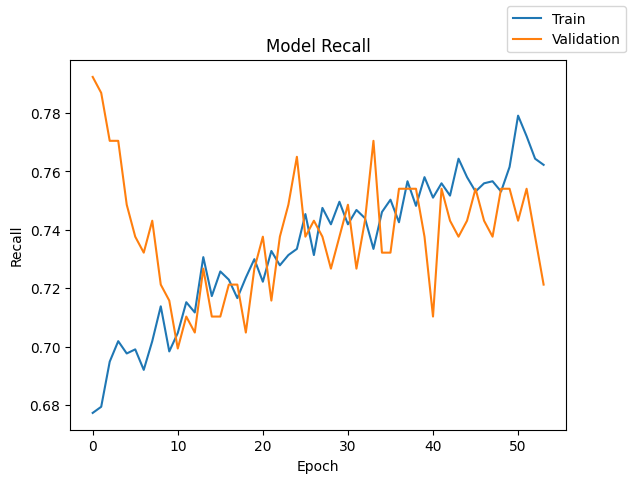

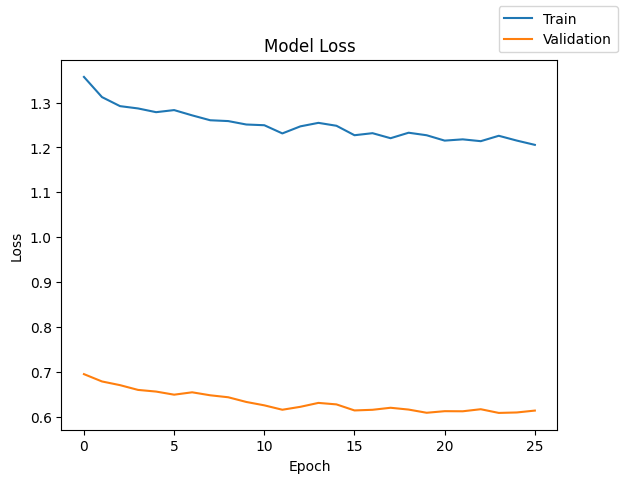

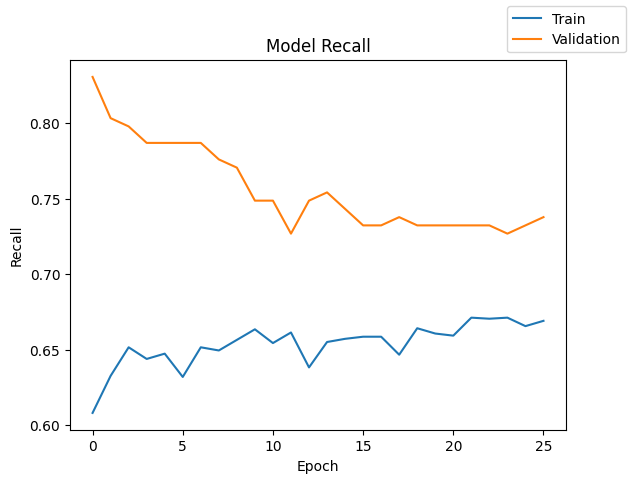

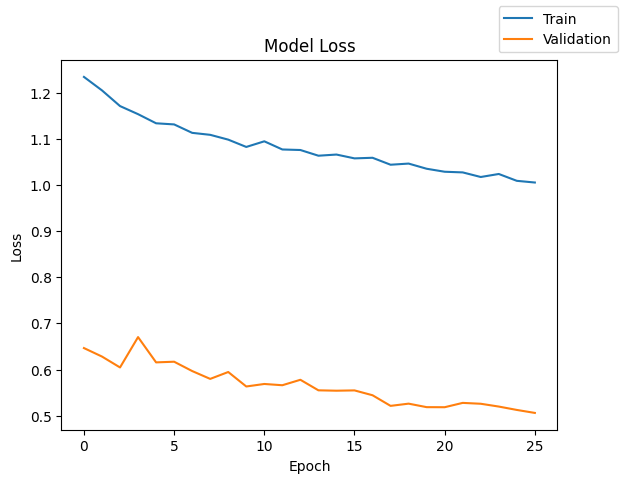

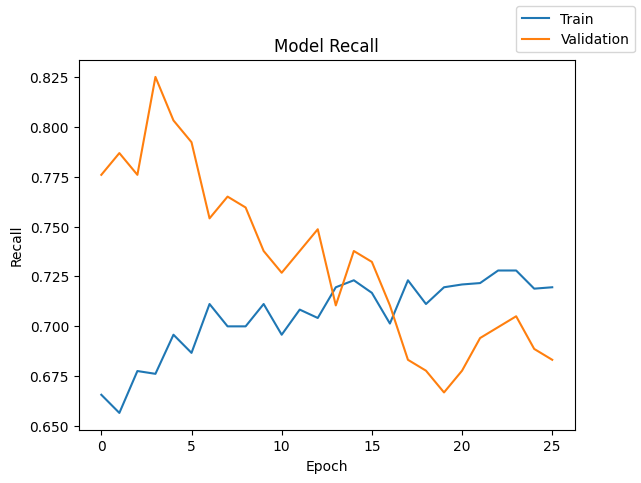

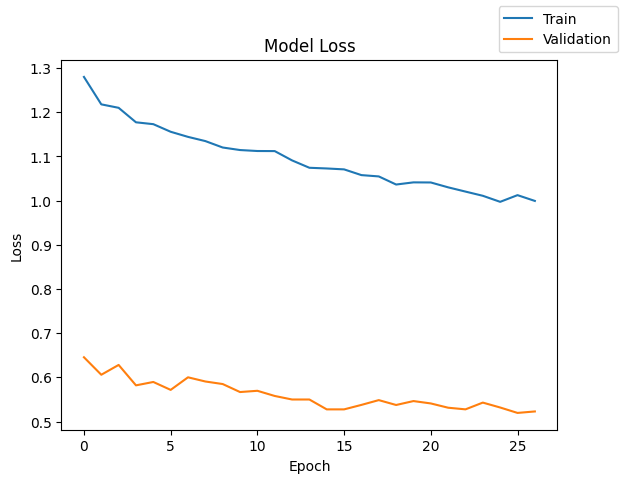

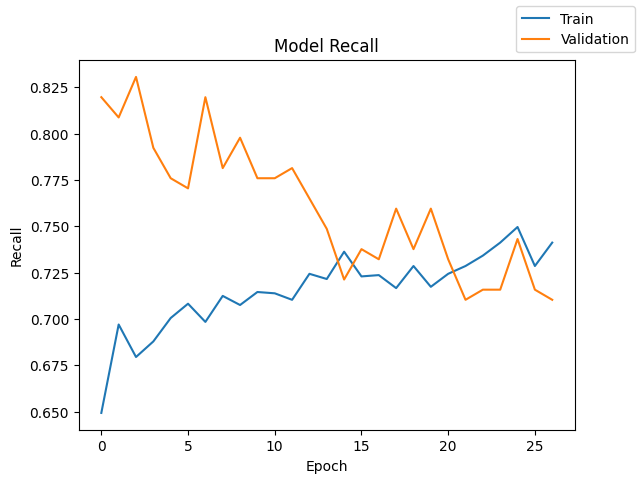

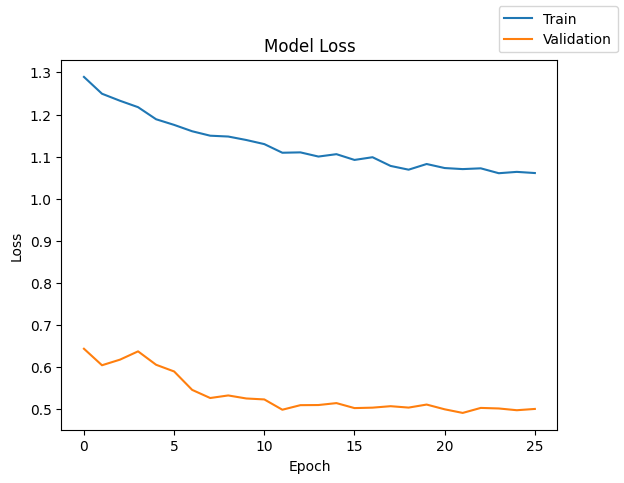

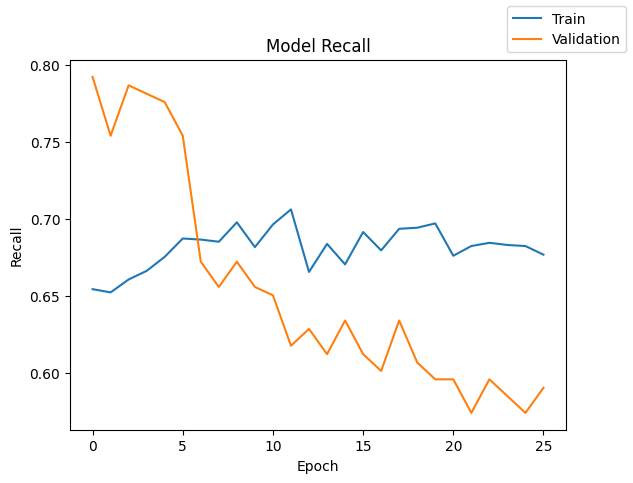

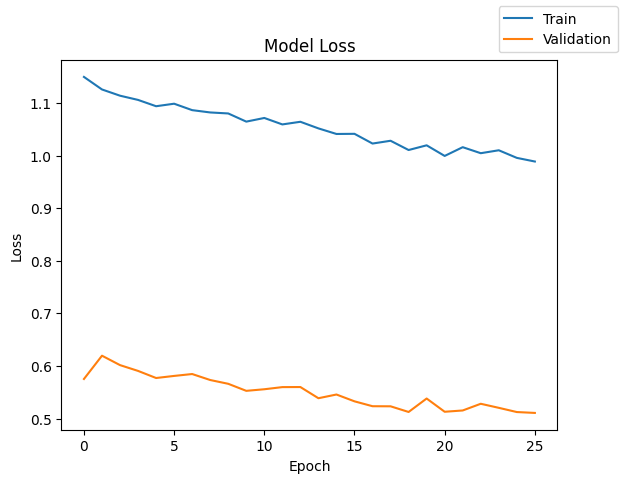

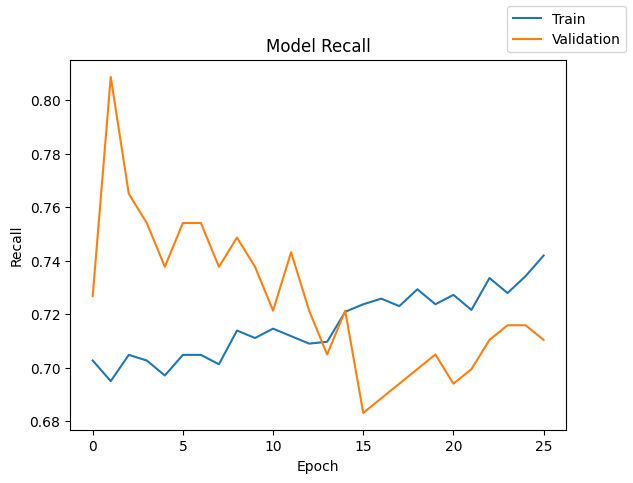

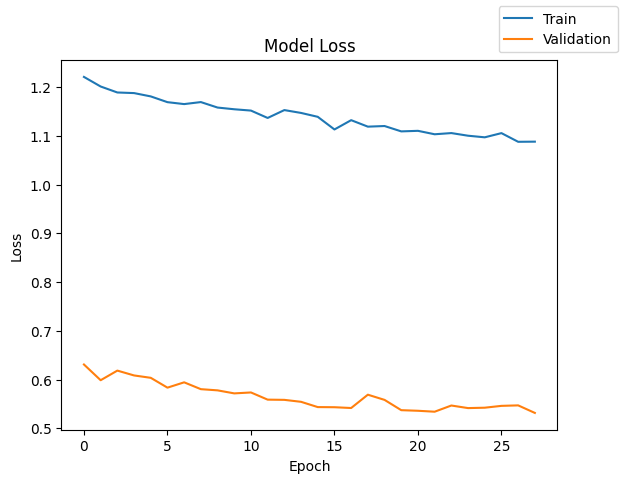

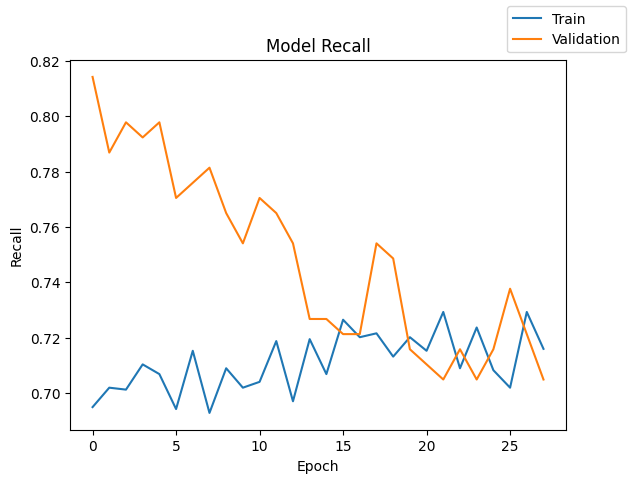

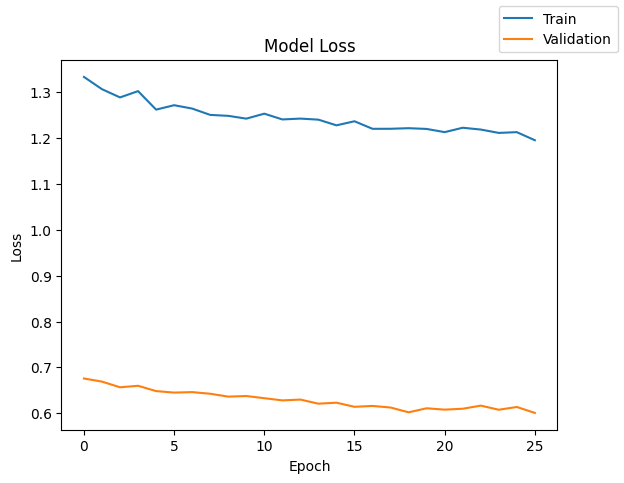

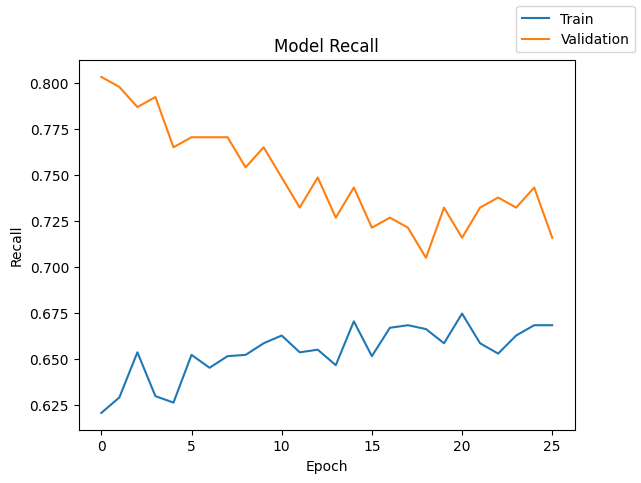

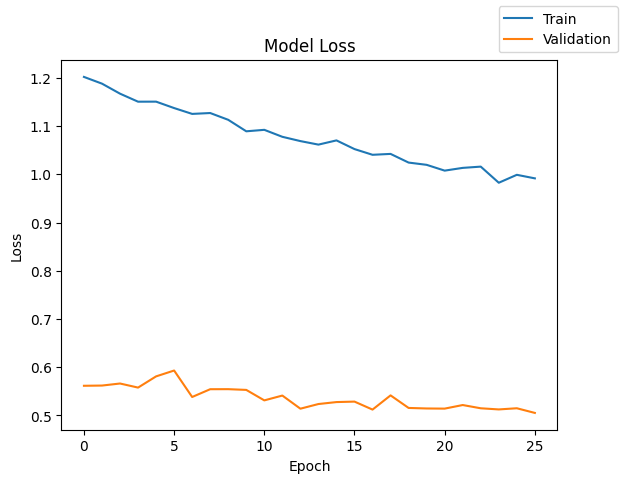

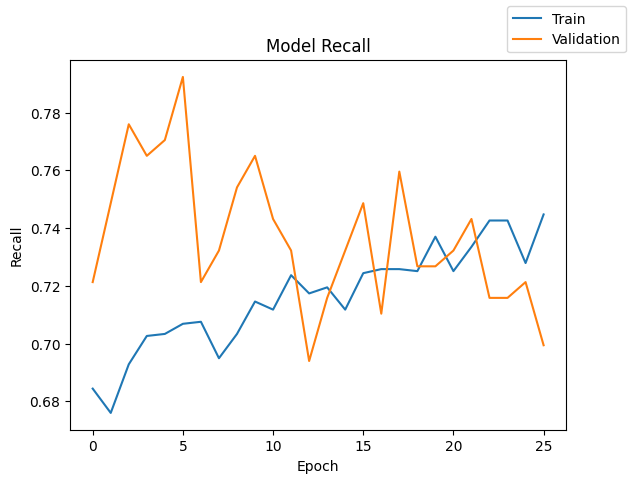

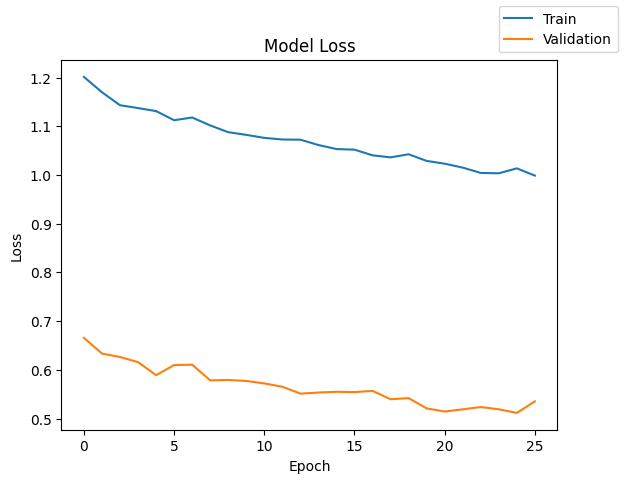

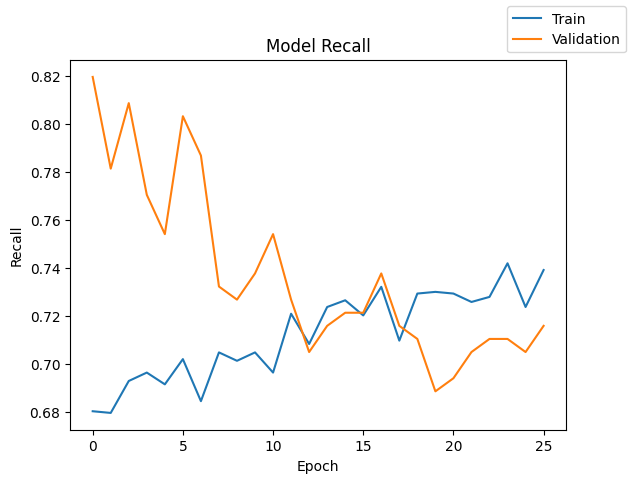

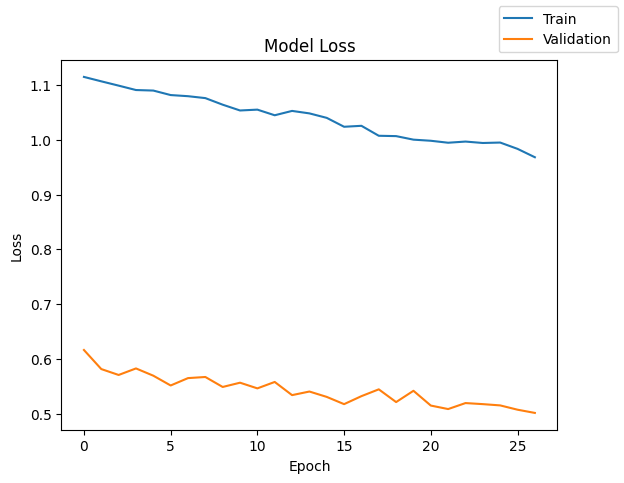

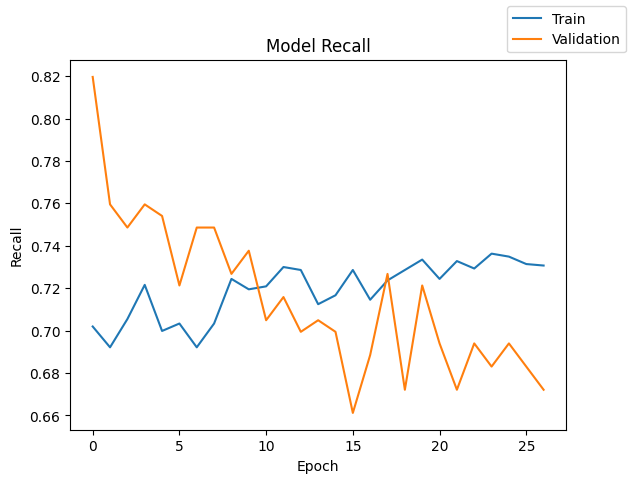

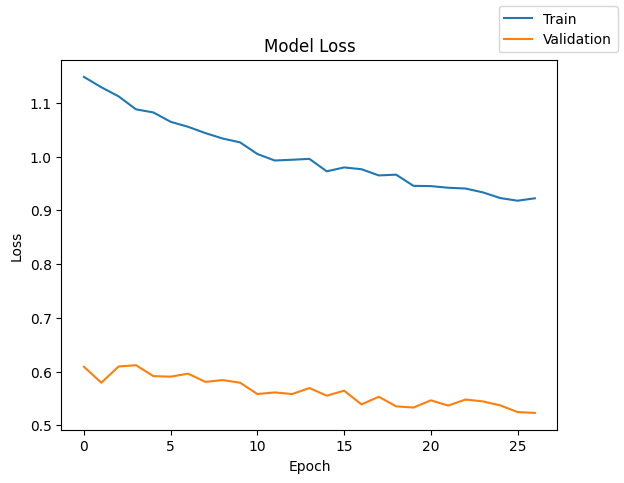

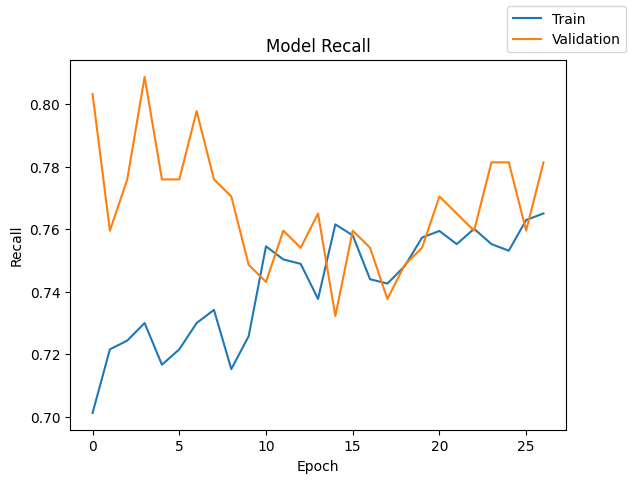

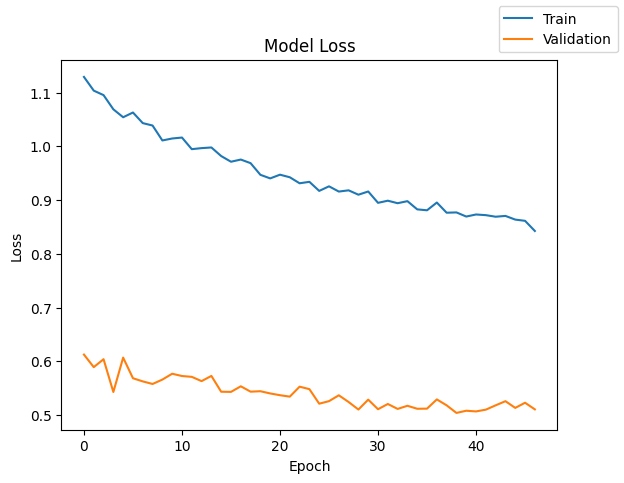

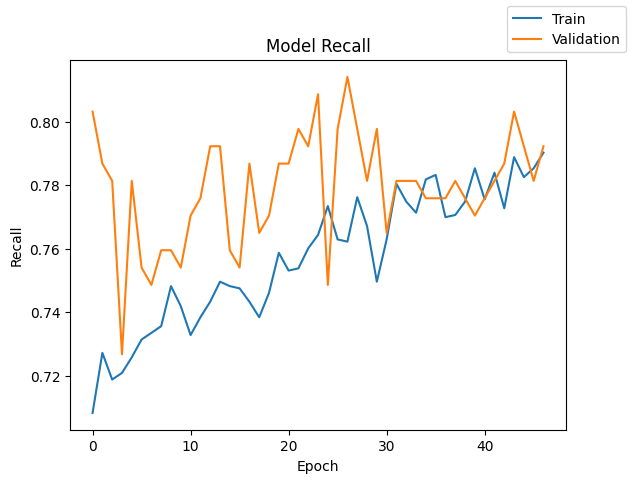

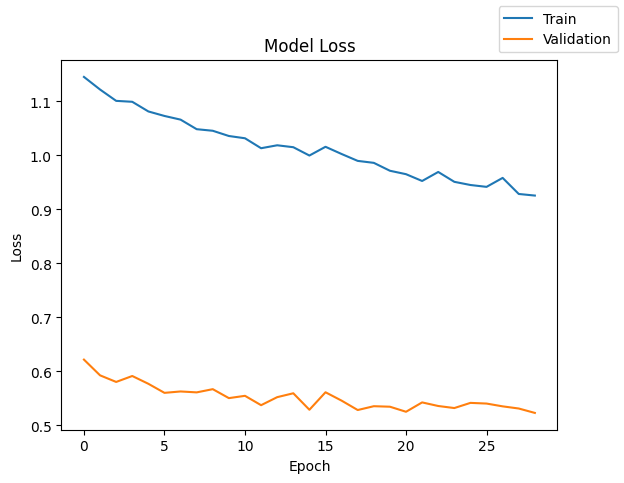

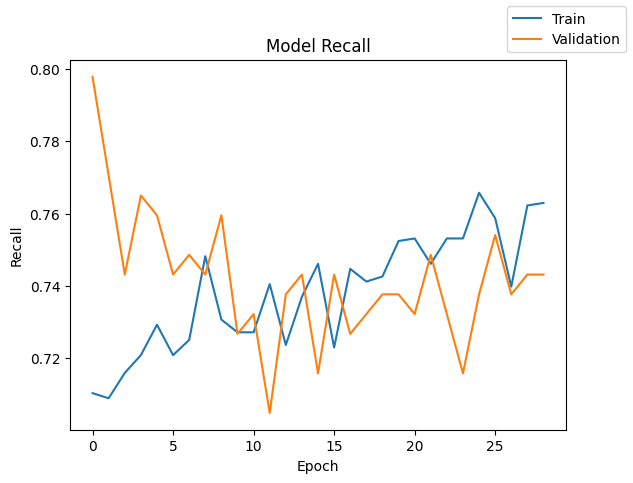

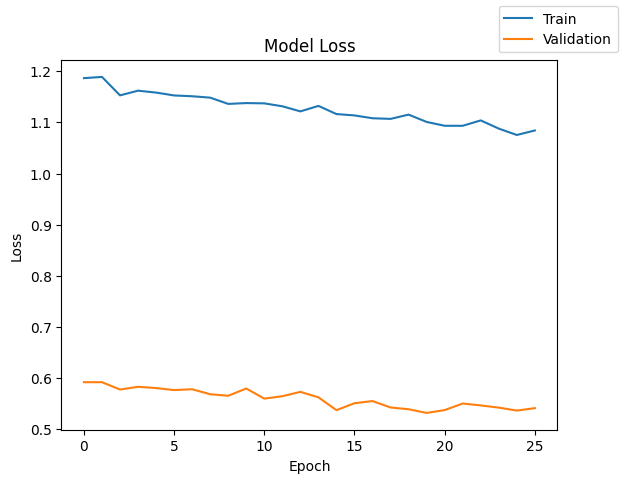

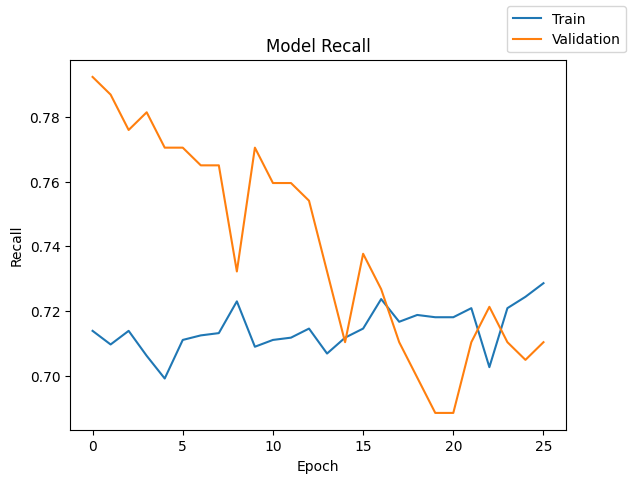

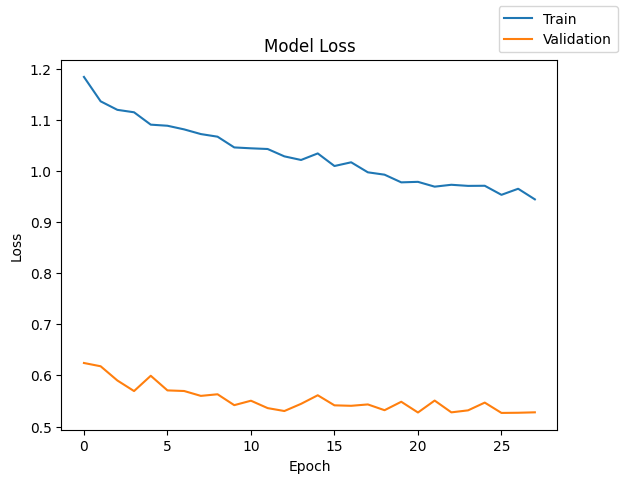

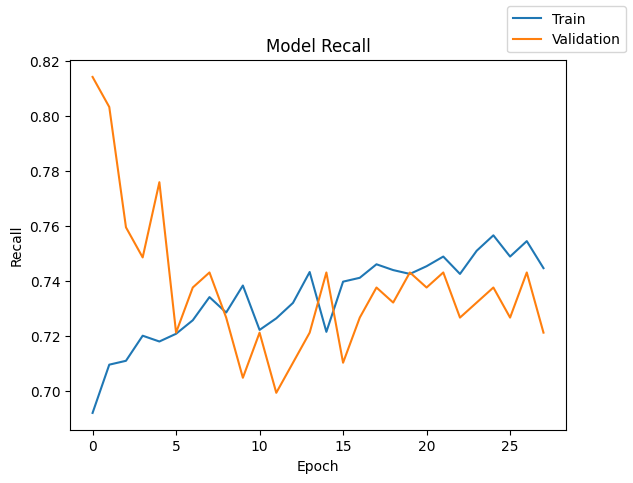

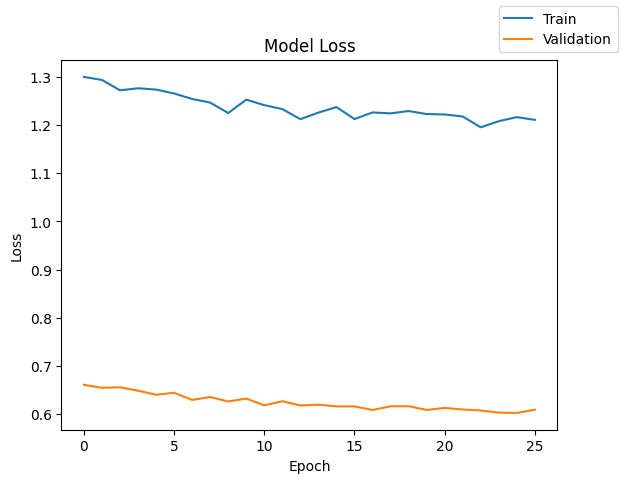

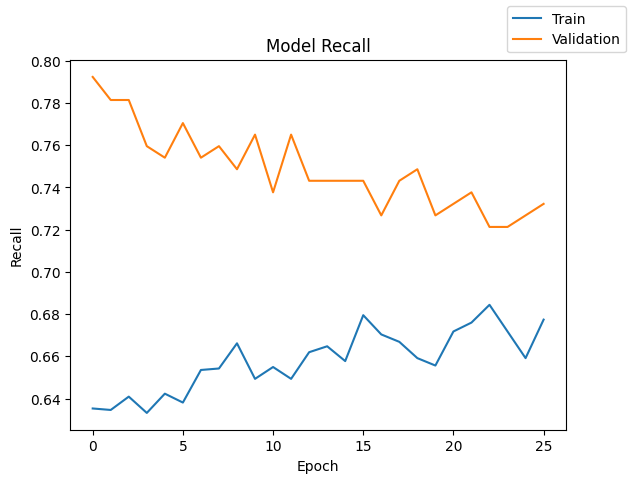

In [ ]:
# Fetch the top N best trials, iterate through the hyperparams, load the model, train the model with entire training data and calculate the validation recall score for each trial.
# Next step would be to filter the high performing models.
top_23_trials = tuner_2ndTrial.oracle.get_best_trials(num_trials=23)

for i, trial in enumerate(top_23_trials):
    for key, value in trial.hyperparameters.values.items():
        if key == 'tuner/epochs': #and value > 20:
          print(f"Top {i+1} Model:")
          print(f"  Trial ID: {trial.trial_id}")
          print(f"  Hyperparameters: {trial.hyperparameters.values}")
          print(f"  Best Score: {tuner_2ndTrial.oracle.get_trial(trial.trial_id).score}")
          model = tuner_2ndTrial.load_model(trial)
          (history, trainedModel) = trainModel(model)
          y_val_pred = trainedModel.predict(X_val)
          y_val_pred = (y_val_pred > 0.5)
          val_recall_score = recall_score(y_val,y_val_pred)
          print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)

Models with their Trial ID Selected from this list are:
* Trial ID: 0030 Validation Score : 0.8306010928961749
* Trial ID: 0011 Validation Score : 0.819672131147541
* Trial ID: 0133 Validation Score : 0.8142076502732241
* Trial ID: 0131 Validation Score : 0.8032786885245902

Load the models individually and compute the validation score for entire epochs

In [ ]:
# Load the models individually and compute the validation score for entire epochs, and create variables for History for plots, models for perf assessment and select top 2 Models.
trial_ids = ['0030', '0011', '0133', '0131']
trials = tuner_2ndTrial.oracle.trials
for trial_id, trial in trials.items():
    if trial_id in trial_ids:
      print(f"Trial ID: {trial_id}")
      print(f"Hyperparameters: {trial.hyperparameters.values}")
      print(f"Score: {trial.score}")
      # Load the model associated with this trial ID. This is the key part.
      model = tuner_2ndTrial.load_model(trial)
      print("Model loaded successfully for this trial.")
      if trial_id == '0030':
        (history_hyp_2NN_0030, trainedModel_hyp_2NN_0030) = trainModel(model)
        y_val_pred = trainedModel_hyp_2NN_0030.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)
      elif trial_id == '0011':
        (history_hyp_2NN_0011, trainedModel_hyp_2NN_0011) = trainModel(model)
        y_val_pred = trainedModel_hyp_2NN_0011.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)
      elif trial_id == '0133':
        (history_hyp_2NN_0133, trainedModel_hyp_2NN_0133) = trainModel(model)
        y_val_pred = trainedModel_hyp_2NN_0133.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)
      else :
        (history_hyp_2NN_0131, trainedModel_hyp_2NN_0131) = trainModel(model)
        y_val_pred = trainedModel_hyp_2NN_0131.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)

Trial ID: 0011
Hyperparameters: {'dropout_rate': 0.6000000000000001, 'optimizer': 'adam', 'learning_rate': 0.0019215534856289356, 'momentum': 0.2, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}
Score: 0.8251366019248962
Model loaded successfully for this trial.
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 1.3007 - recall: 0.6448 - val_loss: 0.6147 - val_recall: 0.7705
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2405 - recall: 0.6779 - val_loss: 0.6517 - val_recall: 0.8306
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2043 - recall: 0.7178 - val_loss: 0.6039 - val_recall: 0.7705
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1.2000 - recall: 0.7088 - val_loss: 0.5784 - val_recall: 0.7760
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1.1912 - recall: 0.6976 - val_loss: 0.5703 - val_recall: 0.7705
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.1853 - rec

* Considering top 2 models:
  * Trial ID: 0030 Validation Score : 0.8579234972677595 - history_hyp_2NN_0030, trainedModel_hyp_2NN_0030
    * Hyperparameters: {'dropout_rate': 0.6000000000000001, 'optimizer': 'adam', 'learning_rate': 0.00012917374266665043, 'momentum': 0.7000000000000001, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}

  * Trial ID: 0011 Validation Score : 0.7978142076502732 - history_hyp_2NN_0011, trainedModel_hyp_2NN_0011
    * Hyperparameters: {'dropout_rate': 0.6000000000000001, 'optimizer': 'adam', 'learning_rate': 0.0019215534856289356, 'momentum': 0.2, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}



In [ ]:
# Set Hyperparams for the top models.
hyp_2NN_0030 = {'dropout_rate': 0.6000000000000001, 'optimizer': 'adam', 'learning_rate': 0.00012917374266665043, 'momentum': 0.7000000000000001, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}
hyp_2NN_0011 = {'dropout_rate': 0.6000000000000001, 'optimizer': 'adam', 'learning_rate': 0.0019215534856289356, 'momentum': 0.2, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}

**Plots for Loss and recall**

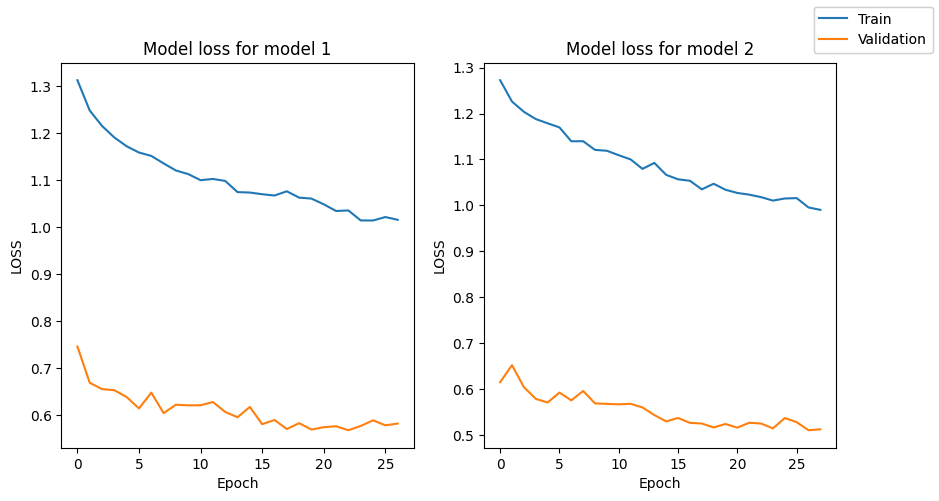

In [ ]:
#LOss Graph
f, (ax1, ax2) = plt.subplots(1, 2, figsize= (10,5))
ax1.plot(history_hyp_2NN_0030.history['loss']) #Plotting the train accuracy or train loss
ax1.plot(history_hyp_2NN_0030.history['val_loss']) #Plotting the validation accuracy or validation loss
ax1.set_title('Model loss for model 1') #Defining the title of the plot.
ax1.set_ylabel('LOSS') #Capitalizing the first letter.
ax1.set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
ax2.plot(history_hyp_2NN_0011.history['loss']) #Plotting the train accuracy or train loss
ax2.plot(history_hyp_2NN_0011.history['val_loss']) #Plotting the validation accuracy or validation loss
ax2.set_title('Model loss for model 2') #Defining the title of the plot.#Defining the title of the plot.
ax2.set_ylabel('LOSS') #Capitalizing the first letter.
ax2.set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
plt.show()

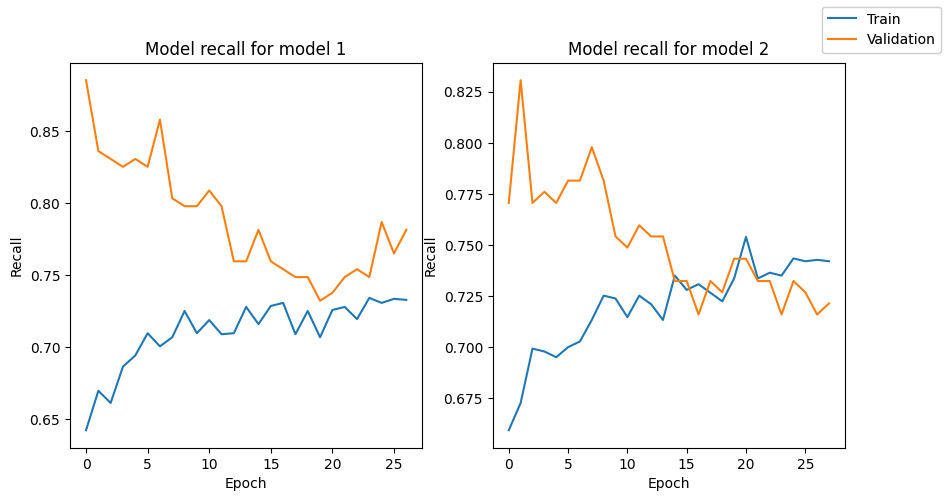

In [ ]:
#Recall Graph
f, (ax1, ax2) = plt.subplots(1, 2, figsize= (10,5))
ax1.plot(history_hyp_2NN_0030.history['recall']) #Plotting the train accuracy or train loss
ax1.plot(history_hyp_2NN_0030.history['val_recall']) #Plotting the validation accuracy or validation loss
ax1.set_title('Model recall for model 1') #Defining the title of the plot.
ax1.set_ylabel('Recall') #Capitalizing the first letter.
ax1.set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
ax2.plot(history_hyp_2NN_0011.history['recall']) #Plotting the train accuracy or train loss
ax2.plot(history_hyp_2NN_0011.history['val_recall']) #Plotting the validation accuracy or validation loss
ax2.set_title('Model recall for model 2') #Defining the title of the plot.#Defining the title of the plot.
ax2.set_ylabel('Recall') #Capitalizing the first letter.
ax2.set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
plt.show()


* Loss: Validation loss is lesser than Training loss for both models.
* Recall: Recall, though with osciallations for both models,it happens to converge at some point in 15 epochs for Model 2 while the general tendency was validation recall reduces drastically for both models and training recall increases with oscillations for both models.


**Predictions for training and validation to calculate recall_score for both training and validation for both models**

##### **Trial ID: 0030 Validation Score : 0.8579234972677595**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = trainedModel_hyp_2NN_0030.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.8555399719495091

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = trainedModel_hyp_2NN_0030.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.8579234972677595

In [ ]:
# Merge data into results
model_name = 'NN Tuned with 2 layers_Balanced_0030'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#tuner_results.drop(model_name,axis=0,inplace=True)
tuner_results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,hyp_2NN_0030['optimizer'],[hyp_2NN_0030['learning_rate'],hyp_2NN_0030['momentum']],"he_normal",["Dropout("+str(hyp_2NN_0030['dropout_rate'])+")"],
                                 history_hyp_2NN_0030.history['loss'][-1],history_hyp_2NN_0030.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, "-"]
tuner_results

# hidden layers  \
NN Tuned with 2 layers_Balanced_0030                2   

                                     # neurons - hidden layer  \
NN Tuned with 2 layers_Balanced_0030                [128, 64]   

                                     activation function - hidden layer   \
NN Tuned with 2 layers_Balanced_0030                        [relu, relu]   

                                      # epochs  batch size optimizer  \
NN Tuned with 2 layers_Balanced_0030  <100[ES]          32      adam   

                                                           learning rate, momentum  \
NN Tuned with 2 layers_Balanced_0030  [0.00012917374266665043, 0.7000000000000001]   

                                     weight initializer  \
NN Tuned with 2 layers_Balanced_0030          he_normal   

                                                     regularization  \
NN Tuned with 2 layers_Balanced_0030  [Dropout(0.6000000000000001)]   

                                      train loss  validation loss  \
NN Tuned with 2 layers_Balanced_0030    1.015618         0.582784   

                                      train Recall  validation Recall  \
NN Tuned with 2 layers_Balanced_0030       0.85554           0.857923   

                                     time (secs)  
NN Tuned with 2 layers_Balanced_0030           -

Recall for training: 85.5% and Validation: 85.79 %, with good generalization and higher validation scores, this could be a candidate for final test performance measurement.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      5574
           1       0.34      0.86      0.49      1426

    accuracy                           0.63      7000
   macro avg       0.64      0.72      0.60      7000
weighted avg       0.82      0.63      0.67      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.57      0.71       717
           1       0.34      0.86      0.48       183

    accuracy                           0.63       900
   macro avg       0.64      0.71      0.60       900
weighted avg       0.82      0.63      0.66       900



As per classification report, Recall for training: 86 % and Validation: 86 % with good generalization and higher validation scores, this could be a candidate for final test performance measurement.

**Confusion Matrix for training and validation**

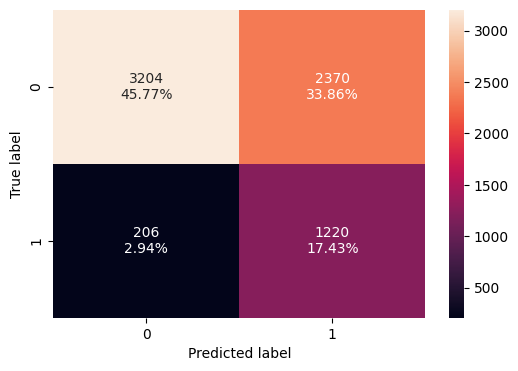

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

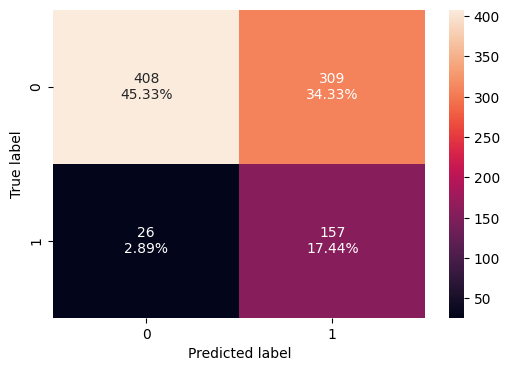

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 86% and Validation:86%, with good generalization and higher validation scores, this could be a candidate for final test performance measurement.

##### **Trial ID: 0011 Validation Score : 0.7978142076502732**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = trainedModel_hyp_2NN_0011.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


0.814866760168303

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = trainedModel_hyp_2NN_0011.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


0.7978142076502732

In [ ]:
# Merge data into results
model_name = 'NN Tuned with 2 layers_Balanced_0011'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#tuner_results.drop(model_name,axis=0,inplace=True)
tuner_results.loc[model_name] = [2,[128,64],["relu","relu"],"<100[ES]",32,hyp_2NN_0011['optimizer'],[hyp_2NN_0011['learning_rate'],hyp_2NN_0011['momentum']],
                                 "he_normal",["Dropout("+str(hyp_2NN_0011['dropout_rate'])+")"],
                                 history_hyp_2NN_0011.history['loss'][-1],history_hyp_2NN_0011.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, "-"]
tuner_results

# hidden layers  \
NN Tuned with 2 layers_Balanced_0030                2   
NN Tuned with 2 layers_Balanced_0011                2   

                                     # neurons - hidden layer  \
NN Tuned with 2 layers_Balanced_0030                [128, 64]   
NN Tuned with 2 layers_Balanced_0011                [128, 64]   

                                     activation function - hidden layer   \
NN Tuned with 2 layers_Balanced_0030                        [relu, relu]   
NN Tuned with 2 layers_Balanced_0011                        [relu, relu]   

                                      # epochs  batch size optimizer  \
NN Tuned with 2 layers_Balanced_0030  <100[ES]          32      adam   
NN Tuned with 2 layers_Balanced_0011  <100[ES]          32      adam   

                                                           learning rate, momentum  \
NN Tuned with 2 layers_Balanced_0030  [0.00012917374266665043, 0.7000000000000001]   
NN Tuned with 2 layers_Balanced_0011                  [0.0019215534856289356, 0.2]   

                                     weight initializer  \
NN Tuned with 2 layers_Balanced_0030          he_normal   
NN Tuned with 2 layers_Balanced_0011          he_normal   

                                                     regularization  \
NN Tuned with 2 layers_Balanced_0030  [Dropout(0.6000000000000001)]   
NN Tuned with 2 layers_Balanced_0011  [Dropout(0.6000000000000001)]   

                                      train loss  validation loss  \
NN Tuned with 2 layers_Balanced_0030    1.015618         0.582784   
NN Tuned with 2 layers_Balanced_0011    0.990074         0.511905   

                                      train Recall  validation Recall  \
NN Tuned with 2 layers_Balanced_0030      0.855540           0.857923   
NN Tuned with 2 layers_Balanced_0011      0.814867           0.797814   

                                     time (secs)  
NN Tuned with 2 layers_Balanced_0030           -  
NN Tuned with 2 layers_Balanced_0011           -

Recall for training: 81.48 % and Validation: 79.78%, with good generalization, this validation recall score is better than 1st round of hypertuned models.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      5574
           1       0.39      0.81      0.52      1426

    accuracy                           0.70      7000
   macro avg       0.66      0.74      0.65      7000
weighted avg       0.82      0.70      0.73      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.65      0.76       717
           1       0.37      0.80      0.50       183

    accuracy                           0.68       900
   macro avg       0.65      0.72      0.63       900
weighted avg       0.81      0.68      0.71       900



As per classification report, Recall for training: 81% and Validation: 80%

**Confusion Matrix for training and validation**

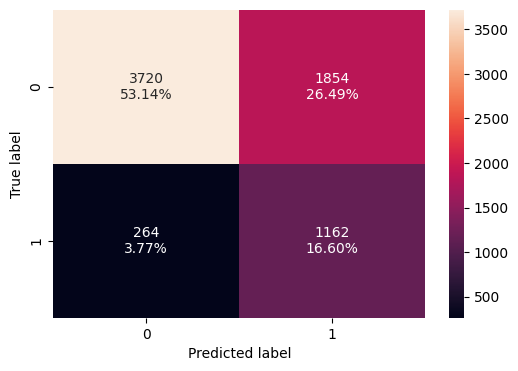

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

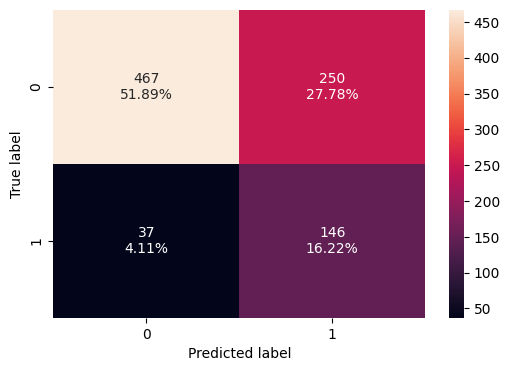

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 81.48% and Validation:79.78%, with good generalization, this validation recall score is better than 1st round of hypertuned models.

#### Balanced Data , 1 i/p layer, 128, 64,32 : 3 hidden layers

This covers these models:
* NN with Adam + ES + Balanced + 3Dropout

In [ ]:
# Define the model with internal hyper params defined within the function.
def build_model(hp):
    #batch_size = hp.Int('batch_size', min_value=16, max_value=128, step=16)
    #Model initialization
    model = keras.Sequential()
    #Vary 3 hidden layer neurons, Dropout, optimizer,lr
    model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_normal')) #input layer

    model.add(Dropout(rate=hp.Float('dropout_rate_1', min_value=0.0, max_value=0.5, step=0.1)))  #Dropout layer 1

    model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal')) #1st hidden layer

    model.add(Dropout(rate=hp.Float('dropout_rate_2', min_value=0.0, max_value=0.5, step=0.1)))  #Dropout layer 2

    model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal')) #2nd hidden layer
    model.add(Dense(units=32, activation='relu', kernel_initializer='he_normal')) #3rd hidden layer

    model.add(Dropout(rate=hp.Float('dropout_rate_3', min_value=0.0, max_value=0.5, step=0.1)))  #Dropout layer 3

    model.add(Dense(units=1, activation='sigmoid')) #output layer

    #Configuration
    # Define optimizer with hyperparameter tuning with diff values for optimizer and lr and momentum.
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'sgd_momentum'])
    if optimizer == 'sgd_momentum':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'), momentum=hp.Float('momentum', min_value=0.0, max_value=0.9, step=0.1))
    else:
        optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')


    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.Recall()]
    )

    return model

In [ ]:
# Define the Hyperband tuner with max_epochs as 100,factor of 2 adn hyperband_iterations as 2 so as to be robust about the predictions and store results in drive.
tuner_4nn = Hyperband(
    build_model,
    objective='val_recall',
    max_epochs=100,
    factor=2,
    hyperband_iterations=2,
    directory='/content/drive/MyDrive/MyGreatLearning/3-Neural_Networks/Project/KerasTunerResults',
    project_name='def_4layerNN'
)

Reloading Tuner from /content/drive/MyDrive/MyGreatLearning/3-Neural_Networks/Project/KerasTunerResults/def_4layerNN/tuner0.json


In [ ]:
# Define early stopping callback with warmup
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_recall',
    patience=20,
    restore_best_weights=True,
    min_delta=0.001,
    start_from_epoch=5,
    mode = 'max'
)

In [ ]:
# Consider the balanced weights, Train the model with training data , validate with validation data, for the specified epochs, batch_size and observe the time taken.
y_train = y_train.astype(int) #Ensure y_train is of type int
y_val = y_val.astype(int) #Ensure y_val is of type int
# Convert y_train and y_val to NumPy arrays
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
# Search for the best hyperparameters with class weights
tuner_4nn.search(X_train,
             y_train_np,
             epochs=100,
             validation_data=(X_val, y_val_np),
             callbacks=[early_stopping],
             class_weight=cw_dict
             )

# Get the best hyperparameters
best_hps = tuner_4nn.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_def_4nn = tuner_4nn.hypermodel.build(best_hps)

Trial 718 Complete [00h 00m 41s]
val_recall: 0.7814207673072815

Best val_recall So Far: 0.9016393423080444
Total elapsed time: 03h 54m 34s


In [ ]:
tuner_4nn.save() # Save the tuner with all the models and their trials information.

In [ ]:
y_train_np = y_train.to_numpy() #convert to numpy as model.fit and search works only when its numpy array.
y_val_np = y_val.to_numpy() #convert to numpy as model.fit and search works only when its numpy array.

In [ ]:
def trainModel(model):
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(812)
    random.seed(812)
    tf.random.set_seed(812)
    history = model.fit(
        X_train,
        y_train_np,  # Use NumPy array for y_train
        validation_data=(X_val, y_val_np),  # Use NumPy array for y_val
        epochs=100,
        class_weight=cw_dict,
        callbacks=[early_stopping]
    )
    return (history, model)

In [ ]:
# Fetch the top N best Trials, fetch the hyper params, load the model, train the model with entire training data and calculate the validation score
# Filter top 5 best validation recall score models as the next step.
top_25_trials = tuner_4nn.oracle.get_best_trials(num_trials=25)

for i, trial in enumerate(top_25_trials):
    for key, value in trial.hyperparameters.values.items():
        if key == 'tuner/epochs': #and value > 20:
          print(f"Top {i+1} Model:")
          print(f"  Trial ID: {trial.trial_id}")
          print(f"  Hyperparameters: {trial.hyperparameters.values}")
          print(f"  Best Score: {tuner_4nn.oracle.get_trial(trial.trial_id).score}")
          model = tuner_4nn.load_model(trial)
          (history, trainedModel) = trainModel(model)
          y_val_pred = trainedModel.predict(X_val)
          y_val_pred = (y_val_pred > 0.5)
          val_recall_score = recall_score(y_val,y_val_pred)
          print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)

Top 1 Model:
  Trial ID: 0522
  Hyperparameters: {'dropout_rate_1': 0.2, 'dropout_rate_2': 0.4, 'dropout_rate_3': 0.4, 'optimizer': 'sgd_momentum', 'learning_rate': 0.00010969473489808994, 'momentum': 0.5, 'tuner/epochs': 4, 'tuner/initial_epoch': 0, 'tuner/bracket': 5, 'tuner/round': 0}
  Best Score: 0.9016393423080444
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.6763 - recall: 0.5752 - val_loss: 0.7391 - val_recall: 0.8743
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6369 - recall: 0.5900 - val_loss: 0.7264 - val_recall: 0.8743
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5791 - recall: 0.5856 - val_loss: 0.7180 - val_recall: 0.8415
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5192 - recall: 0.6008 - val_loss: 0.7141 - val_recall: 0.8306
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5493 - recall: 0.5847 - val_loss: 0.7159 - val_recall: 0.8579
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

Top 5 Models with their Trial ID Selected from this list are:
* Trial ID: 0522 Validation Score : 0.8743169398907104
* Trial ID: 0552 Validation Score : 0.8633879781420765
* Trial ID: 0585 Validation Score : 0.8688524590163934
* Trial ID: 0593 Validation Score : 0.8306010928961749
* Trial ID: 0595 Validation Score : 0.825136612021858


Load the models individually and compute the validation score for entire epochs again and store the results

In [ ]:
#Load the models individually and compute the validation score for entire epochs again and store the results in individual varaiables for plots,performance assessment and hyperparams space logging.
trial_ids = ['0522', '0552', '0585', '0593','0595']
trials = tuner_4nn.oracle.trials
for trial_id, trial in trials.items():
    if trial_id in trial_ids:
      print(f"Trial ID: {trial_id}")
      hps = trial.hyperparameters.values
      print(f"Hyperparameters: {hps}")
      print(f"Score: {trial.score}")
      # Load the model associated with this trial ID. This is the key part.
      model = tuner_4nn.load_model(trial)
      print("Model loaded successfully for this trial.")
      if trial_id == '0522':
        (history_hyp_4NN_0522, trainedModel_hyp_4NN_0522) = trainModel(model)
        hyp_4NN_0522 = hps
        y_val_pred = trainedModel_hyp_4NN_0522.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)
      elif trial_id == '0552':
        (history_hyp_4NN_0552, trainedModel_hyp_4NN_0552) = trainModel(model)
        hyp_4NN_0552 = hps
        y_val_pred = trainedModel_hyp_4NN_0552.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)
      elif trial_id == '0585':
        (history_hyp_4NN_0585, trainedModel_hyp_4NN_0585) = trainModel(model)
        hyp_4NN_0585 = hps
        y_val_pred = trainedModel_hyp_4NN_0585.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)
      elif trial_id == '0593':
        (history_hyp_4NN_0593, trainedModel_hyp_4NN_0593) = trainModel(model)
        hyp_4NN_0593 = hps
        y_val_pred = trainedModel_hyp_4NN_0593.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)
      else :
        (history_hyp_4NN_0595, trainedModel_hyp_4NN_0595) = trainModel(model)
        hyp_4NN_0595 = hps
        y_val_pred = trainedModel_hyp_4NN_0595.predict(X_val)
        y_val_pred = (y_val_pred > 0.5)
        val_recall_score = recall_score(y_val,y_val_pred)
        print("Trial ID:",trial.trial_id,"Validation Score :",val_recall_score)

Trial ID: 0522
Hyperparameters: {'dropout_rate_1': 0.2, 'dropout_rate_2': 0.4, 'dropout_rate_3': 0.4, 'optimizer': 'sgd_momentum', 'learning_rate': 0.00010969473489808994, 'momentum': 0.5, 'tuner/epochs': 4, 'tuner/initial_epoch': 0, 'tuner/bracket': 5, 'tuner/round': 0}
Score: 0.9016393423080444
Model loaded successfully for this trial.
Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7174 - recall: 0.5672 - val_loss: 0.7453 - val_recall: 0.9016
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6243 - recall: 0.5783 - val_loss: 0.7346 - val_recall: 0.8852
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5520 - recall: 0.5872 - val_loss: 0.7163 - val_recall: 0.8470
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5736 - recall: 0.5766 - val_loss: 0.7066 - val_recall: 0.8033
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5141 - recall: 0.5816 - val_loss: 0.7133 - val_recall: 0.8251
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━

* Considering top 4 models, their trial ID, Validation score, History for plots,Model for perf assessment, Hyperparams for logging:
  * Trial ID: 0522 Validation Score : 0.8688524590163934 -
    * history_hyp_4NN_0522, trainedModel_hyp_4NN_0522, hyp_4NN_0522
  * Trial ID: 0585 Validation Score : 0.8688524590163934 -
    * history_hyp_4NN_0585, trainedModel_hyp_4NN_0585, hyp_4NN_0585
  * Trial ID: 0552 Validation Score : 0.8633879781420765 -
    * history_hyp_4NN_0552, trainedModel_hyp_4NN_0552, hyp_4NN_0552
  * Trial ID: 0593 Validation Score : 0.8306010928961749 -
    * history_hyp_4NN_0593, trainedModel_hyp_4NN_0593, hyp_4NN_0593



**Plots for Loss and recall**

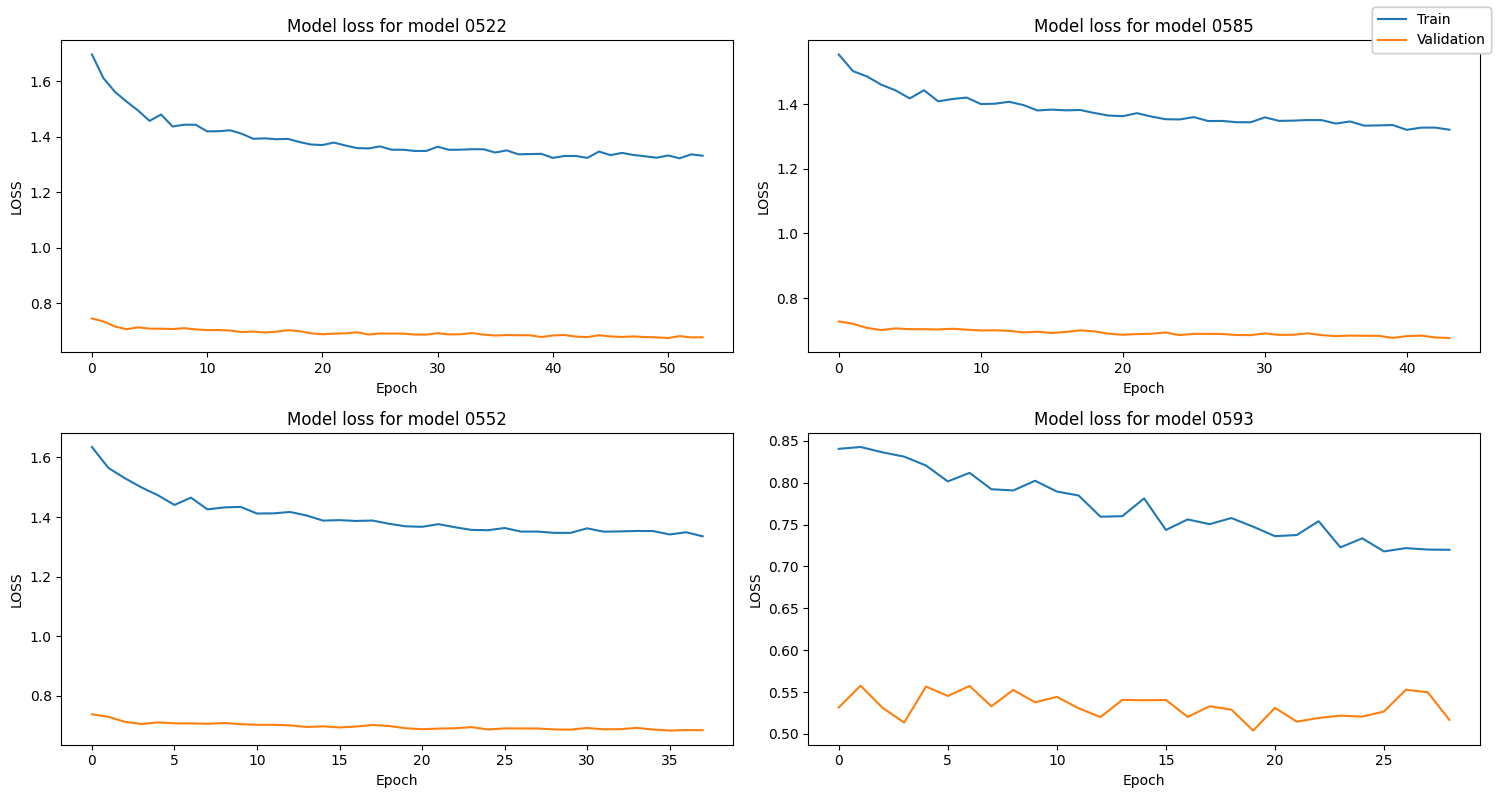

In [ ]:
#LOss Graph
f, ax = plt.subplots(2, 2, figsize= (15,8))
ax[0,0].plot(history_hyp_4NN_0522.history['loss']) #Plotting the train accuracy or train loss
ax[0,0].plot(history_hyp_4NN_0522.history['val_loss']) #Plotting the validation accuracy or validation loss
ax[0,0].set_title('Model loss for model 0522') #Defining the title of the plot.
ax[0,0].set_ylabel('LOSS') #Capitalizing the first letter.
ax[0,0].set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
ax[0,1].plot(history_hyp_4NN_0585.history['loss']) #Plotting the train accuracy or train loss
ax[0,1].plot(history_hyp_4NN_0585.history['val_loss']) #Plotting the validation accuracy or validation loss
ax[0,1].set_title('Model loss for model 0585') #Defining the title of the plot.#Defining the title of the plot.
ax[0,1].set_ylabel('LOSS') #Capitalizing the first letter.
ax[0,1].set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
ax[1,0].plot(history_hyp_4NN_0552.history['loss']) #Plotting the train accuracy or train loss
ax[1,0].plot(history_hyp_4NN_0552.history['val_loss']) #Plotting the validation accuracy or validation loss
ax[1,0].set_title('Model loss for model 0552') #Defining the title of the plot.
ax[1,0].set_ylabel('LOSS') #Capitalizing the first letter.
ax[1,0].set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
ax[1,1].plot(history_hyp_4NN_0593.history['loss']) #Plotting the train accuracy or train loss
ax[1,1].plot(history_hyp_4NN_0593.history['val_loss']) #Plotting the validation accuracy or validation loss
ax[1,1].set_title('Model loss for model 0593') #Defining the title of the plot.#Defining the title of the plot.
ax[1,1].set_ylabel('LOSS') #Capitalizing the first letter.
ax[1,1].set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
plt.tight_layout()
plt.show()

* Loss: Validation Loss is almost a smooth steadily slowly decreasing curve for all models except Model 0593 where it has most oscillations.
Training loss is comparatively higher than validation loss which is a good sign for high performing models.

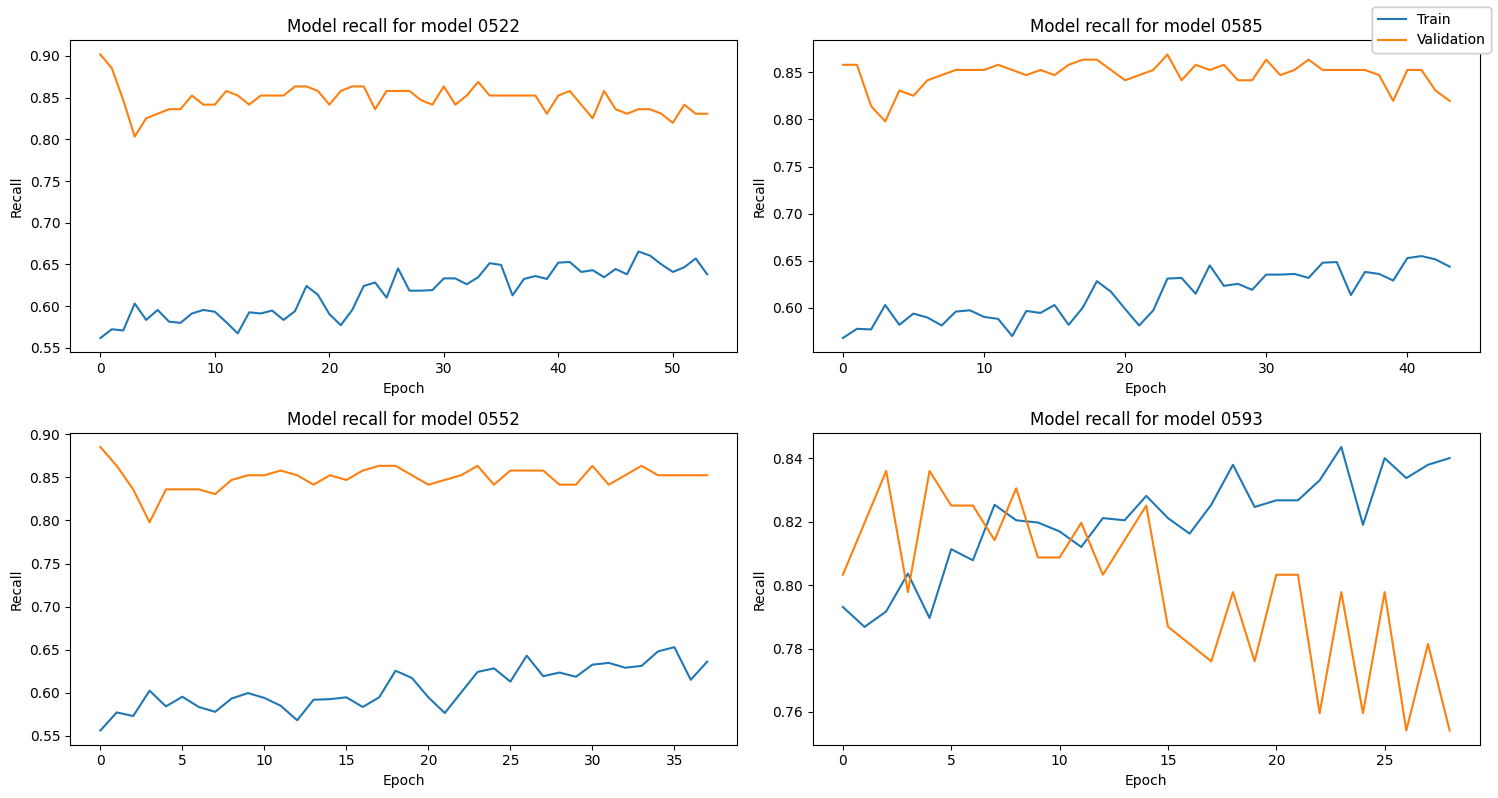

In [ ]:
#Recall Graph
f, ax = plt.subplots(2, 2, figsize= (15,8))
ax[0,0].plot(history_hyp_4NN_0522.history['recall']) #Plotting the train accuracy or train recall
ax[0,0].plot(history_hyp_4NN_0522.history['val_recall']) #Plotting the validation accuracy or validation recall
ax[0,0].set_title('Model recall for model 0522') #Defining the title of the plot.
ax[0,0].set_ylabel('Recall') #Capitalizing the first letter.
ax[0,0].set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
ax[0,1].plot(history_hyp_4NN_0585.history['recall']) #Plotting the train accuracy or train recall
ax[0,1].plot(history_hyp_4NN_0585.history['val_recall']) #Plotting the validation accuracy or validation recall
ax[0,1].set_title('Model recall for model 0585') #Defining the title of the plot.#Defining the title of the plot.
ax[0,1].set_ylabel('Recall') #Capitalizing the first letter.
ax[0,1].set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
ax[1,0].plot(history_hyp_4NN_0552.history['recall']) #Plotting the train accuracy or train recall
ax[1,0].plot(history_hyp_4NN_0552.history['val_recall']) #Plotting the validation accuracy or validation recall
ax[1,0].set_title('Model recall for model 0552') #Defining the title of the plot.
ax[1,0].set_ylabel('Recall') #Capitalizing the first letter.
ax[1,0].set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
ax[1,1].plot(history_hyp_4NN_0593.history['recall']) #Plotting the train accuracy or train recall
ax[1,1].plot(history_hyp_4NN_0593.history['val_recall']) #Plotting the validation accuracy or validation recall
ax[1,1].set_title('Model recall for model 0593') #Defining the title of the plot.#Defining the title of the plot.
ax[1,1].set_ylabel('Recall') #Capitalizing the first letter.
ax[1,1].set_xlabel('Epoch') #Defining the label for the x-axis.
f.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.
plt.tight_layout()
plt.show()


* Recall: Validation Recall seems to be higher than training loss for all models except model 0593

**Predictions for training and validation to calculate recall_score for All training and validation for both models**

  * Trial ID: 0522 Validation Score : 0.8688524590163934 -
    * history_hyp_4NN_0522, trainedModel_hyp_4NN_0522, hyp_4NN_0522
  * Trial ID: 0585 Validation Score : 0.8688524590163934 -
    * history_hyp_4NN_0585, trainedModel_hyp_4NN_0585, hyp_4NN_0585
  * Trial ID: 0552 Validation Score : 0.8633879781420765 -
    * history_hyp_4NN_0552, trainedModel_hyp_4NN_0552, hyp_4NN_0552
  * Trial ID: 0593 Validation Score : 0.8306010928961749 -
    * history_hyp_4NN_0593, trainedModel_hyp_4NN_0593, hyp_4NN_0593

##### **Trial ID: 0522 Validation Score : 0.8688524590163934**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = trainedModel_hyp_4NN_0522.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8660589060308556

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = trainedModel_hyp_4NN_0522.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.8688524590163934

In [ ]:
# Merge data into results
model_name = 'NN Tuned with 4 layers_Balanced_0522'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#tuner_results.drop(model_name,axis=0,inplace=True)
tuner_results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"<100[ES]",32,hyp_4NN_0522['optimizer'],[hyp_4NN_0522['learning_rate'],hyp_4NN_0522['momentum']],"he_normal",
                                ["Dropout_1("+str(hyp_4NN_0522['dropout_rate_1'])+")","Dropout_2("+str(hyp_4NN_0522['dropout_rate_2'])+")","Dropout_3("+str(hyp_4NN_0522['dropout_rate_3'])+")"],
                                 history_hyp_4NN_0522.history['loss'][-1],history_hyp_4NN_0522.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, "-"]
tuner_results

# hidden layers  \
NN Tuned with 2 layers_Balanced_0030                2   
NN Tuned with 2 layers_Balanced_0011                2   
NN Tuned with 4 layers_Balanced_0585                4   
NN Tuned with 4 layers_Balanced_0552                4   
NN Tuned with 4 layers_Balanced_0593                4   
NN Tuned with 4 layers_Balanced_0522                4   

                                     # neurons - hidden layer  \
NN Tuned with 2 layers_Balanced_0030                [128, 64]   
NN Tuned with 2 layers_Balanced_0011                [128, 64]   
NN Tuned with 4 layers_Balanced_0585        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0552        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0593        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0522        [32, 128, 64, 32]   

                                     activation function - hidden layer   \
NN Tuned with 2 layers_Balanced_0030                        [relu, relu]   
NN Tuned with 2 layers_Balanced_0011                        [relu, relu]   
NN Tuned with 4 layers_Balanced_0585            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0552            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0593            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0522            [relu, relu, relu, relu]   

                                      # epochs  batch size     optimizer  \
NN Tuned with 2 layers_Balanced_0030  <100[ES]          32          adam   
NN Tuned with 2 layers_Balanced_0011  <100[ES]          32          adam   
NN Tuned with 4 layers_Balanced_0585  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0552  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0593  <100[ES]          32          adam   
NN Tuned with 4 layers_Balanced_0522  <100[ES]          32  sgd_momentum   

                                                           learning rate, momentum  \
NN Tuned with 2 layers_Balanced_0030  [0.00012917374266665043, 0.7000000000000001]   
NN Tuned with 2 layers_Balanced_0011                  [0.0019215534856289356, 0.2]   
NN Tuned with 4 layers_Balanced_0585                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0552                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0593                  [0.0001051834478453516, 0.8]   
NN Tuned with 4 layers_Balanced_0522                 [0.00010969473489808994, 0.5]   

                                     weight initializer  \
NN Tuned with 2 layers_Balanced_0030          he_normal   
NN Tuned with 2 layers_Balanced_0011          he_normal   
NN Tuned with 4 layers_Balanced_0585          he_normal   
NN Tuned with 4 layers_Balanced_0552          he_normal   
NN Tuned with 4 layers_Balanced_0593          he_normal   
NN Tuned with 4 layers_Balanced_0522          he_normal   

                                                                        regularization  \
NN Tuned with 2 layers_Balanced_0030                     [Dropout(0.6000000000000001)]   
NN Tuned with 2 layers_Balanced_0011                     [Dropout(0.6000000000000001)]   
NN Tuned with 4 layers_Balanced_0585  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0552  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0593  [Dropout_1(0.1), Dropout_2(0.0), Dropout_3(0.1)]   
NN Tuned with 4 layers_Balanced_0522  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   

                                      train loss  validation loss  \
NN Tuned with 2 layers_Balanced_0030    1.015618         0.582784   
NN Tuned with 2 layers_Balanced_0011    0.990074         0.511905   
NN Tuned with 4 layers_Balanced_0585    1.320567         0.676680   
NN Tuned with 4 layers_Balanced_0552    1.335324         0.684433   
NN Tuned with 4 layers_Balanced_0593    0.719842         0.516579   
NN Tuned with 4 layers_Balanced_0522    1.331504      

Recall for training: 86.6% and Validation:  86.33%, With ideal generalization scores, ideal candidate for test performance prediction.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.35      0.50      5574
           1       0.25      0.87      0.39      1426

    accuracy                           0.45      7000
   macro avg       0.58      0.61      0.45      7000
weighted avg       0.78      0.45      0.48      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.38      0.53       717
           1       0.26      0.87      0.40       183

    accuracy                           0.48       900
   macro avg       0.59      0.62      0.47       900
weighted avg       0.78      0.48      0.51       900



As per classification report, Recall for training: 87 % and Validation: 87 %, With ideal generalization scores, ideal candidate for test performance prediction.

**Confusion Matrix for training and validation**

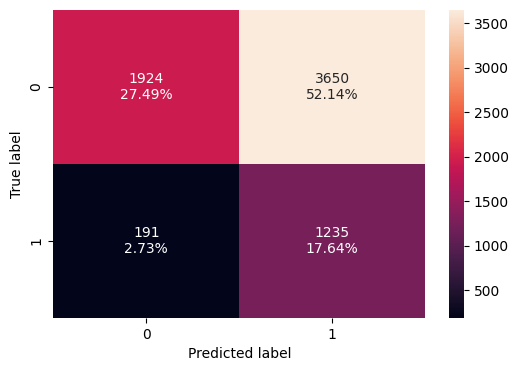

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

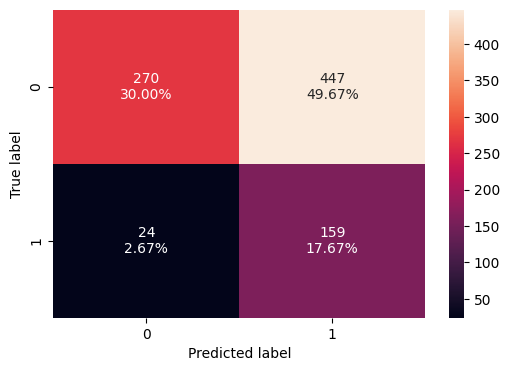

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 87% and Validation: 87%,With ideal generalization scores, ideal candidate for test performance prediction.

##### **Trial ID: 0585 Validation Score : 0.8688524590163934**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = trainedModel_hyp_4NN_0585.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.8590462833099579

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = trainedModel_hyp_4NN_0585.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.8688524590163934

In [ ]:
# Merge data into results
model_name = 'NN Tuned with 4 layers_Balanced_0585'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#tuner_results.drop(model_name,axis=0,inplace=True)
tuner_results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"<100[ES]",32,hyp_4NN_0585['optimizer'],[hyp_4NN_0585['learning_rate'],hyp_4NN_0585['momentum']],"he_normal",
                                ["Dropout_1("+str(hyp_4NN_0585['dropout_rate_1'])+")","Dropout_2("+str(hyp_4NN_0585['dropout_rate_2'])+")","Dropout_3("+str(hyp_4NN_0585['dropout_rate_3'])+")"],
                                 history_hyp_4NN_0585.history['loss'][-1],history_hyp_4NN_0585.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, "-"]
tuner_results

# hidden layers  \
NN Tuned with 2 layers_Balanced_0030                2   
NN Tuned with 2 layers_Balanced_0011                2   
NN Tuned with 4 layers_Balanced_0522                4   
NN Tuned with 4 layers_Balanced_0585                4   

                                     # neurons - hidden layer  \
NN Tuned with 2 layers_Balanced_0030                [128, 64]   
NN Tuned with 2 layers_Balanced_0011                [128, 64]   
NN Tuned with 4 layers_Balanced_0522        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0585        [32, 128, 64, 32]   

                                     activation function - hidden layer   \
NN Tuned with 2 layers_Balanced_0030                        [relu, relu]   
NN Tuned with 2 layers_Balanced_0011                        [relu, relu]   
NN Tuned with 4 layers_Balanced_0522            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0585            [relu, relu, relu, relu]   

                                      # epochs  batch size     optimizer  \
NN Tuned with 2 layers_Balanced_0030  <100[ES]          32          adam   
NN Tuned with 2 layers_Balanced_0011  <100[ES]          32          adam   
NN Tuned with 4 layers_Balanced_0522  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0585  <100[ES]          32  sgd_momentum   

                                                           learning rate, momentum  \
NN Tuned with 2 layers_Balanced_0030  [0.00012917374266665043, 0.7000000000000001]   
NN Tuned with 2 layers_Balanced_0011                  [0.0019215534856289356, 0.2]   
NN Tuned with 4 layers_Balanced_0522                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0585                 [0.00010969473489808994, 0.5]   

                                     weight initializer  \
NN Tuned with 2 layers_Balanced_0030          he_normal   
NN Tuned with 2 layers_Balanced_0011          he_normal   
NN Tuned with 4 layers_Balanced_0522          he_normal   
NN Tuned with 4 layers_Balanced_0585          he_normal   

                                                                        regularization  \
NN Tuned with 2 layers_Balanced_0030                     [Dropout(0.6000000000000001)]   
NN Tuned with 2 layers_Balanced_0011                     [Dropout(0.6000000000000001)]   
NN Tuned with 4 layers_Balanced_0522  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0585  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   

                                      train loss  validation loss  \
NN Tuned with 2 layers_Balanced_0030    1.015618         0.582784   
NN Tuned with 2 layers_Balanced_0011    0.990074         0.511905   
NN Tuned with 4 layers_Balanced_0522    1.331504         0.677643   
NN Tuned with 4 layers_Balanced_0585    1.320567         0.676680   

                                      train Recall  validation Recall  \
NN Tuned with 2 layers_Balanced_0030      0.855540           0.857923   
NN Tuned with 2 layers_Balanced_0011      0.814867           0.797814   
NN Tuned with 4 layers_Balanced_0522      0.814867           0.863388   
NN Tuned with 4 layers_Balanced_0585      0.859046           0.868852   

                                     time (secs)  
NN Tuned with 2 layers_Balanced_0030           -  
NN Tuned with 2 layers_Balanced_0011           -  
NN Tuned with 4 layers_Balanced_0522           -  
NN Tuned with 4 layers_Balanced_0585           -

Recall for training: 85.9% and Validation: 86.8%, With ideal generalization scores, ideal candidate for test performance prediction.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.34      0.49      5574
           1       0.25      0.86      0.39      1426

    accuracy                           0.45      7000
   macro avg       0.58      0.60      0.44      7000
weighted avg       0.77      0.45      0.47      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.37      0.53       717
           1       0.26      0.87      0.40       183

    accuracy                           0.47       900
   macro avg       0.59      0.62      0.47       900
weighted avg       0.78      0.47      0.50       900



As per classification report, Recall for training:86% and Validation:87%, With ideal generalization scores, ideal candidate for test performance prediction.

**Confusion Matrix for training and validation**

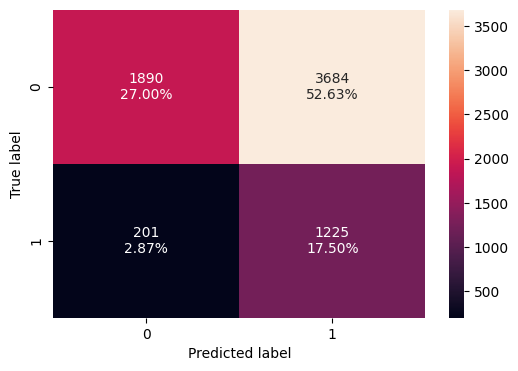

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

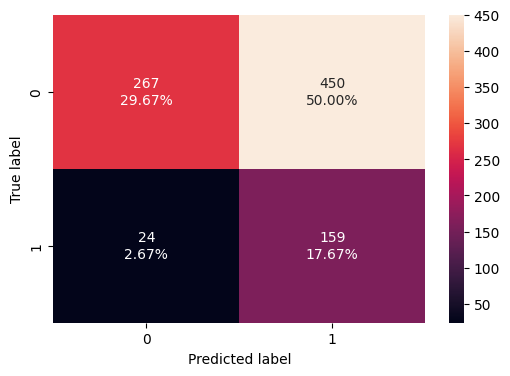

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 86% and Validation:87%, With ideal generalization scores, ideal candidate for test performance prediction.

##### **Trial ID: 0552 Validation Score : 0.8633879781420765**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = trainedModel_hyp_4NN_0552.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.8590462833099579

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = trainedModel_hyp_4NN_0552.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.8633879781420765

In [ ]:
# Merge data into results
model_name = 'NN Tuned with 4 layers_Balanced_0552'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#tuner_results.drop(model_name,axis=0,inplace=True)
tuner_results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"<100[ES]",32,hyp_4NN_0552['optimizer'],[hyp_4NN_0552['learning_rate'],hyp_4NN_0552['momentum']],"he_normal",
                                ["Dropout_1("+str(hyp_4NN_0552['dropout_rate_1'])+")","Dropout_2("+str(hyp_4NN_0552['dropout_rate_2'])+")","Dropout_3("+str(hyp_4NN_0552['dropout_rate_3'])+")"],
                                 history_hyp_4NN_0552.history['loss'][-1],history_hyp_4NN_0552.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, "-"]
tuner_results

# hidden layers  \
NN Tuned with 2 layers_Balanced_0030                2   
NN Tuned with 2 layers_Balanced_0011                2   
NN Tuned with 4 layers_Balanced_0522                4   
NN Tuned with 4 layers_Balanced_0585                4   
NN Tuned with 4 layers_Balanced_0593                4   
NN Tuned with 4 layers_Balanced_0552                4   

                                     # neurons - hidden layer  \
NN Tuned with 2 layers_Balanced_0030                [128, 64]   
NN Tuned with 2 layers_Balanced_0011                [128, 64]   
NN Tuned with 4 layers_Balanced_0522        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0585        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0593        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0552        [32, 128, 64, 32]   

                                     activation function - hidden layer   \
NN Tuned with 2 layers_Balanced_0030                        [relu, relu]   
NN Tuned with 2 layers_Balanced_0011                        [relu, relu]   
NN Tuned with 4 layers_Balanced_0522            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0585            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0593            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0552            [relu, relu, relu, relu]   

                                      # epochs  batch size     optimizer  \
NN Tuned with 2 layers_Balanced_0030  <100[ES]          32          adam   
NN Tuned with 2 layers_Balanced_0011  <100[ES]          32          adam   
NN Tuned with 4 layers_Balanced_0522  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0585  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0593  <100[ES]          32          adam   
NN Tuned with 4 layers_Balanced_0552  <100[ES]          32  sgd_momentum   

                                                           learning rate, momentum  \
NN Tuned with 2 layers_Balanced_0030  [0.00012917374266665043, 0.7000000000000001]   
NN Tuned with 2 layers_Balanced_0011                  [0.0019215534856289356, 0.2]   
NN Tuned with 4 layers_Balanced_0522                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0585                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0593                  [0.0001051834478453516, 0.8]   
NN Tuned with 4 layers_Balanced_0552                 [0.00010969473489808994, 0.5]   

                                     weight initializer  \
NN Tuned with 2 layers_Balanced_0030          he_normal   
NN Tuned with 2 layers_Balanced_0011          he_normal   
NN Tuned with 4 layers_Balanced_0522          he_normal   
NN Tuned with 4 layers_Balanced_0585          he_normal   
NN Tuned with 4 layers_Balanced_0593          he_normal   
NN Tuned with 4 layers_Balanced_0552          he_normal   

                                                                        regularization  \
NN Tuned with 2 layers_Balanced_0030                     [Dropout(0.6000000000000001)]   
NN Tuned with 2 layers_Balanced_0011                     [Dropout(0.6000000000000001)]   
NN Tuned with 4 layers_Balanced_0522  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0585  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0593  [Dropout_1(0.1), Dropout_2(0.0), Dropout_3(0.1)]   
NN Tuned with 4 layers_Balanced_0552  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   

                                      train loss  validation loss  \
NN Tuned with 2 layers_Balanced_0030    1.015618         0.582784   
NN Tuned with 2 layers_Balanced_0011    0.990074         0.511905   
NN Tuned with 4 layers_Balanced_0522    1.331504         0.677643   
NN Tuned with 4 layers_Balanced_0585    1.320567         0.676680   
NN Tuned with 4 layers_Balanced_0593    0.719842         0.516579   
NN Tuned with 4 layers_Balanced_0552    1.335324      

Recall for training: 85.9% and Validation:86%, With ideal generalization scores, ideal candidate for test performance prediction.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.31      0.46      5574
           1       0.24      0.86      0.38      1426

    accuracy                           0.42      7000
   macro avg       0.57      0.58      0.42      7000
weighted avg       0.76      0.42      0.44      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.35      0.50       717
           1       0.25      0.86      0.39       183

    accuracy                           0.45       900
   macro avg       0.58      0.60      0.45       900
weighted avg       0.77      0.45      0.48       900



As per classification report, Recall for training:86% and Validation:87%, With ideal generalization scores, ideal candidate for test performance prediction.

**Confusion Matrix for training and validation**

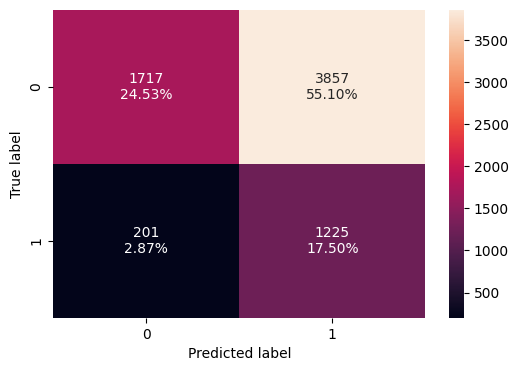

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

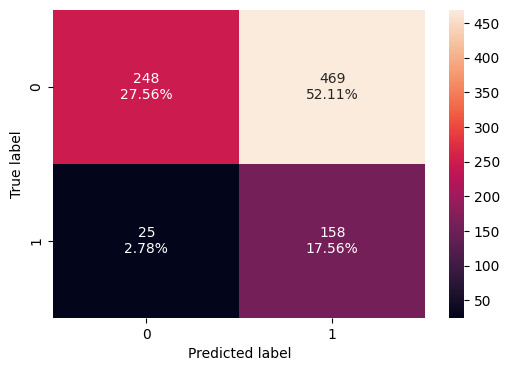

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 86% and Validation:87%, With ideal generalization scores, ideal candidate for test performance prediction.

##### **Trial ID: 0593 Validation Score : 0.8306010928961749**

In [ ]:
# Training Predictions and recall_score.
y_train_pred = trainedModel_hyp_4NN_0593.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
train_recall_score = recall_score(y_train,y_train_pred)
train_recall_score

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8983169705469846

In [ ]:
# Validation Predictions and recall_score.
y_val_pred = trainedModel_hyp_4NN_0593.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
val_recall_score = recall_score(y_val,y_val_pred)
val_recall_score

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.8306010928961749

In [ ]:
# Merge data into results
model_name = 'NN Tuned with 4 layers_Balanced_0593'
#columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization",
#           "train loss","validation loss","train Recall","validation Recall","time (secs)"]
#tuner_results.drop(model_name,axis=0,inplace=True)
tuner_results.loc[model_name] = [4,[32,128,64,32],["relu","relu","relu","relu"],"<100[ES]",32,hyp_4NN_0593['optimizer'],[hyp_4NN_0593['learning_rate'],hyp_4NN_0593['momentum']],"he_normal",
                                ["Dropout_1("+str(hyp_4NN_0593['dropout_rate_1'])+")","Dropout_2("+str(hyp_4NN_0593['dropout_rate_2'])+")","Dropout_3("+str(hyp_4NN_0593['dropout_rate_3'])+")"],
                                 history_hyp_4NN_0593.history['loss'][-1],history_hyp_4NN_0593.history['val_loss'][-1],
                                 train_recall_score,val_recall_score, "-"]
tuner_results

# hidden layers  \
NN Tuned with 2 layers_Balanced_0030                2   
NN Tuned with 2 layers_Balanced_0011                2   
NN Tuned with 4 layers_Balanced_0522                4   
NN Tuned with 4 layers_Balanced_0585                4   
NN Tuned with 4 layers_Balanced_0552                4   
NN Tuned with 4 layers_Balanced_0593                4   

                                     # neurons - hidden layer  \
NN Tuned with 2 layers_Balanced_0030                [128, 64]   
NN Tuned with 2 layers_Balanced_0011                [128, 64]   
NN Tuned with 4 layers_Balanced_0522        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0585        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0552        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0593        [32, 128, 64, 32]   

                                     activation function - hidden layer   \
NN Tuned with 2 layers_Balanced_0030                        [relu, relu]   
NN Tuned with 2 layers_Balanced_0011                        [relu, relu]   
NN Tuned with 4 layers_Balanced_0522            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0585            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0552            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0593            [relu, relu, relu, relu]   

                                      # epochs  batch size     optimizer  \
NN Tuned with 2 layers_Balanced_0030  <100[ES]          32          adam   
NN Tuned with 2 layers_Balanced_0011  <100[ES]          32          adam   
NN Tuned with 4 layers_Balanced_0522  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0585  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0552  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0593  <100[ES]          32          adam   

                                                           learning rate, momentum  \
NN Tuned with 2 layers_Balanced_0030  [0.00012917374266665043, 0.7000000000000001]   
NN Tuned with 2 layers_Balanced_0011                  [0.0019215534856289356, 0.2]   
NN Tuned with 4 layers_Balanced_0522                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0585                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0552                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0593                  [0.0001051834478453516, 0.8]   

                                     weight initializer  \
NN Tuned with 2 layers_Balanced_0030          he_normal   
NN Tuned with 2 layers_Balanced_0011          he_normal   
NN Tuned with 4 layers_Balanced_0522          he_normal   
NN Tuned with 4 layers_Balanced_0585          he_normal   
NN Tuned with 4 layers_Balanced_0552          he_normal   
NN Tuned with 4 layers_Balanced_0593          he_normal   

                                                                        regularization  \
NN Tuned with 2 layers_Balanced_0030                     [Dropout(0.6000000000000001)]   
NN Tuned with 2 layers_Balanced_0011                     [Dropout(0.6000000000000001)]   
NN Tuned with 4 layers_Balanced_0522  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0585  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0552  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0593  [Dropout_1(0.1), Dropout_2(0.0), Dropout_3(0.1)]   

                                      train loss  validation loss  \
NN Tuned with 2 layers_Balanced_0030    1.015618         0.582784   
NN Tuned with 2 layers_Balanced_0011    0.990074         0.511905   
NN Tuned with 4 layers_Balanced_0522    1.331504         0.677643   
NN Tuned with 4 layers_Balanced_0585    1.320567         0.676680   
NN Tuned with 4 layers_Balanced_0552    1.335324         0.684433   
NN Tuned with 4 layers_Balanced_0593    0.719842      

Recall for training:89.8% and Validation:83%, With decent generalization scores, ideal candidate for test performance prediction.

**Clasification_report for training and validation**

In [ ]:
#Classification_report for training data and its predictions
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      5574
           1       0.51      0.90      0.65      1426

    accuracy                           0.80      7000
   macro avg       0.74      0.84      0.75      7000
weighted avg       0.87      0.80      0.82      7000



In [ ]:
#Classification_report for validation data and its predictions
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       717
           1       0.42      0.83      0.56       183

    accuracy                           0.73       900
   macro avg       0.68      0.77      0.68       900
weighted avg       0.84      0.73      0.76       900



As per classification report, Recall for training:89.8% and Validation: 83%,  With decent generalization scores, ideal candidate for test performance prediction.

**Confusion Matrix for training and validation**

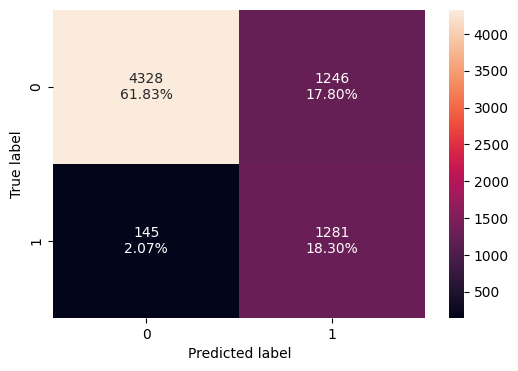

In [ ]:
make_confusion_matrix(y_train,y_train_pred)

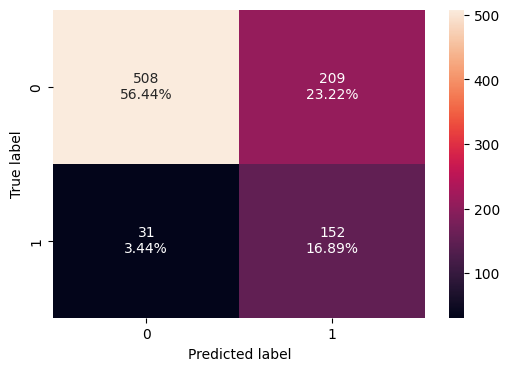

In [ ]:
make_confusion_matrix(y_val,y_val_pred)

As per Confusion matrix, Recall for training: 89.8% and Validation:83%,  With decent generalization scores, ideal candidate for test performance prediction.

### Comparison between Hyper tuned Models of Keras Tuner

In [ ]:
#Comparing hypertuned models from Keras Tuner by validation recall scores.
tuner_results.sort_values(by='validation Recall',ascending=False)

# hidden layers  \
NN Tuned with 4 layers_Balanced_0585                4   
NN Tuned with 4 layers_Balanced_0522                4   
NN Tuned with 4 layers_Balanced_0552                4   
NN Tuned with 2 layers_Balanced_0030                2   
NN Tuned with 4 layers_Balanced_0593                4   
NN Tuned with 2 layers_Balanced_0011                2   

                                     # neurons - hidden layer  \
NN Tuned with 4 layers_Balanced_0585        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0522        [32, 128, 64, 32]   
NN Tuned with 4 layers_Balanced_0552        [32, 128, 64, 32]   
NN Tuned with 2 layers_Balanced_0030                [128, 64]   
NN Tuned with 4 layers_Balanced_0593        [32, 128, 64, 32]   
NN Tuned with 2 layers_Balanced_0011                [128, 64]   

                                     activation function - hidden layer   \
NN Tuned with 4 layers_Balanced_0585            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0522            [relu, relu, relu, relu]   
NN Tuned with 4 layers_Balanced_0552            [relu, relu, relu, relu]   
NN Tuned with 2 layers_Balanced_0030                        [relu, relu]   
NN Tuned with 4 layers_Balanced_0593            [relu, relu, relu, relu]   
NN Tuned with 2 layers_Balanced_0011                        [relu, relu]   

                                      # epochs  batch size     optimizer  \
NN Tuned with 4 layers_Balanced_0585  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0522  <100[ES]          32  sgd_momentum   
NN Tuned with 4 layers_Balanced_0552  <100[ES]          32  sgd_momentum   
NN Tuned with 2 layers_Balanced_0030  <100[ES]          32          adam   
NN Tuned with 4 layers_Balanced_0593  <100[ES]          32          adam   
NN Tuned with 2 layers_Balanced_0011  <100[ES]          32          adam   

                                                           learning rate, momentum  \
NN Tuned with 4 layers_Balanced_0585                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0522                 [0.00010969473489808994, 0.5]   
NN Tuned with 4 layers_Balanced_0552                 [0.00010969473489808994, 0.5]   
NN Tuned with 2 layers_Balanced_0030  [0.00012917374266665043, 0.7000000000000001]   
NN Tuned with 4 layers_Balanced_0593                  [0.0001051834478453516, 0.8]   
NN Tuned with 2 layers_Balanced_0011                  [0.0019215534856289356, 0.2]   

                                     weight initializer  \
NN Tuned with 4 layers_Balanced_0585          he_normal   
NN Tuned with 4 layers_Balanced_0522          he_normal   
NN Tuned with 4 layers_Balanced_0552          he_normal   
NN Tuned with 2 layers_Balanced_0030          he_normal   
NN Tuned with 4 layers_Balanced_0593          he_normal   
NN Tuned with 2 layers_Balanced_0011          he_normal   

                                                                        regularization  \
NN Tuned with 4 layers_Balanced_0585  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0522  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 4 layers_Balanced_0552  [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]   
NN Tuned with 2 layers_Balanced_0030                     [Dropout(0.6000000000000001)]   
NN Tuned with 4 layers_Balanced_0593  [Dropout_1(0.1), Dropout_2(0.0), Dropout_3(0.1)]   
NN Tuned with 2 layers_Balanced_0011                     [Dropout(0.6000000000000001)]   

                                      train loss  validation loss  \
NN Tuned with 4 layers_Balanced_0585    1.320567         0.676680   
NN Tuned with 4 layers_Balanced_0522    1.331504         0.677643   
NN Tuned with 4 layers_Balanced_0552    1.335324         0.684433   
NN Tuned with 2 layers_Balanced_0030    1.015618         0.582784   
NN Tuned with 4 layers_Balanced_0593    0.719842         0.516579   
NN Tuned with 2 layers_Balanced_0011    0.990074      

Top 4 Models with great validation recall scores and good generalizability are:
* NN Tuned with 4 layers_Balanced_0585 - 86.88%
* NN Tuned with 4 layers_Balanced_0522 - 86.33%
* NN Tuned with 4 layers_Balanced_0552 - 86.33%
* NN Tuned with 2 layers_Balanced_0030 - 85.79%
Will be assessed for test performance for best model selection.

###Test Performance : 1st level hyper tuned, 2nd level Hyper Tuned with Keras Tuner

#### Test Performance -  1st level Hypertuned Models

##### NN with Adam + ES + Balanced + 1Dropout + LR Reduced : Validation Score: 78.68%

In [ ]:
model_adam_do_bal.summary() #Prints summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,573 (115.52 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,716 (77.02 KB)

In [ ]:
y_test_pred = model_adam_do_bal.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
test_recall_score = recall_score(y_test,y_test_pred)
test_recall_score

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7616822429906542

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1672
           1       0.37      0.76      0.50       428

    accuracy                           0.69      2100
   macro avg       0.65      0.72      0.64      2100
weighted avg       0.81      0.69      0.72      2100



As per classification report, test recall is 76%

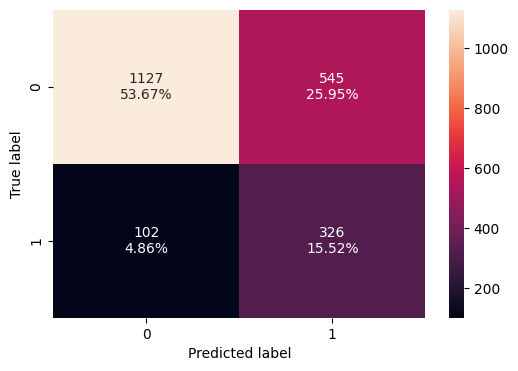

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

As per confusion matrix, test recall score is 76.16%

**NN with Adam + ES + Balanced + 1Dropout + LR Reduced : Test Recall Score: 76.1%**

##### NN with Adam + ES + Balanced + 3Dropout : Validation Score: 76.5%

In [ ]:
model_adam_diff_do_bal.summary()#Prints summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,933 (175.52 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,956 (117.02 KB)

In [ ]:
y_test_pred = model_adam_diff_do_bal.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
test_recall_score = recall_score(y_test,y_test_pred)
test_recall_score

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.7453271028037384

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1672
           1       0.47      0.75      0.57       428

    accuracy                           0.77      2100
   macro avg       0.69      0.76      0.71      2100
weighted avg       0.83      0.77      0.79      2100



As per classification report, test recall is 75%

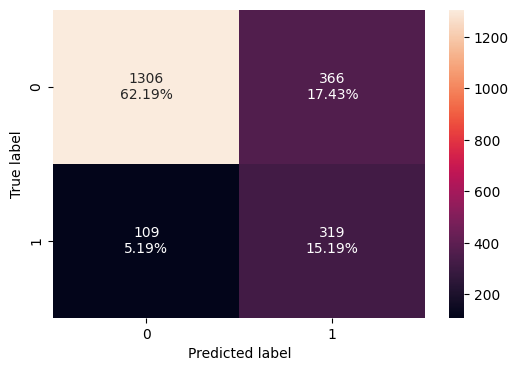

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

As per confusion matrix, test recall score is 74.5%

**NN with Adam + ES + Balanced + 3Dropout : Test Recall Score: 74.5%**

##### NN with Adam + ES + Oversampled + 1Dropout + LR Reduced: Validation Score: 73.77%

In [ ]:
model_adam_do_over.summary()#Prints summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,573 (115.52 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,716 (77.02 KB)

In [ ]:
y_test_pred = model_adam_do_over.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
test_recall_score = recall_score(y_test,y_test_pred)
test_recall_score

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.7266355140186916

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1672
           1       0.38      0.73      0.50       428

    accuracy                           0.71      2100
   macro avg       0.65      0.71      0.65      2100
weighted avg       0.80      0.71      0.73      2100



As per classification report, Weighted average test recall is 71%

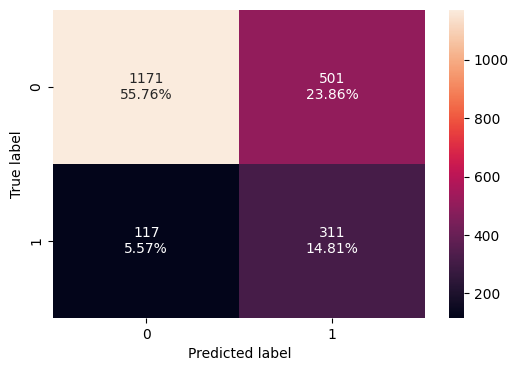

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

As per confusion matrix, test recall score is 72.66%

**NN with Adam + ES + Oversampled + 1Dropout + LR Reduced:Test Recall Score: 72.66%**

##### From 1st level of tuning with many models with different criteria, we are able to achieve only **NN with Adam Optimizer + Early Stopping + Balanced Weights + 1 Dropout + Learning Rate Reduced : Test Recall Score: 76.1%**

#### Test Performance -  2nd level Hyper Tuned with Keras Tuner

Top 4 Models with great validation recall scores and good generalizability are:
* NN Tuned with 4 layers_Balanced_0585 - Validation Recall Score - 86.88% - trainedModel_hyp_4NN_0585
* NN Tuned with 4 layers_Balanced_0522 - Validation Recall Score - 86.33% - trainedModel_hyp_4NN_0522
* NN Tuned with 4 layers_Balanced_0552 - Validation Recall Score - 86.33% - trainedModel_hyp_4NN_0552
* NN Tuned with 2 layers_Balanced_0030 - Validation Recall Score - 85.79% - trainedModel_hyp_2NN_0030

##### NN Tuned with 4 layers_Balanced_0585 - Validation Recall Score - 86.88%

In [ ]:
trainedModel_hyp_4NN_0585.summary() #Prints summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,956 (117.02 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,979 (58.52 KB)

In [ ]:
y_test_pred = trainedModel_hyp_4NN_0585.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
test_recall_score = recall_score(y_test,y_test_pred)
test_recall_score

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


0.8481308411214953

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.35      0.51      1672
           1       0.25      0.85      0.39       428

    accuracy                           0.45      2100
   macro avg       0.58      0.60      0.45      2100
weighted avg       0.77      0.45      0.48      2100



As per classification report, test recall is 85%

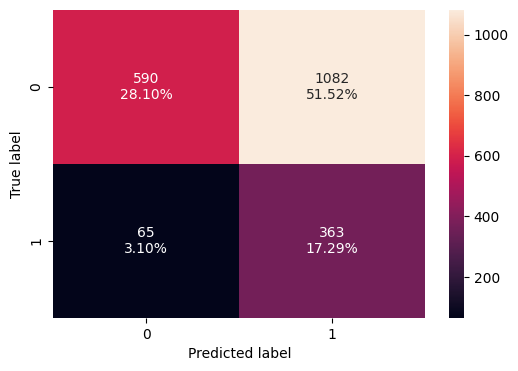

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

As per confusion matrix, test recall score is 84.8%

NN Tuned with 4 layers_Balanced_0585 -
* Validation Recall Score : 86.88% ,
* Test Recall Score: 84.8%

##### NN Tuned with 4 layers_Balanced_0522 - Validation Recall Score - 86.33%

In [ ]:
trainedModel_hyp_4NN_0522.summary() #Prints summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,956 (117.02 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,979 (58.52 KB)

In [ ]:
y_test_pred = trainedModel_hyp_4NN_0522.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
test_recall_score = recall_score(y_test,y_test_pred)
test_recall_score

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


0.8481308411214953

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.35      0.51      1672
           1       0.25      0.85      0.39       428

    accuracy                           0.45      2100
   macro avg       0.58      0.60      0.45      2100
weighted avg       0.77      0.45      0.48      2100



As per classification report, test recall is 85%

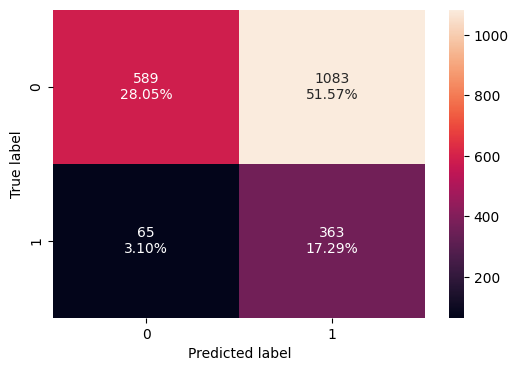

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

As per confusion matrix, test recall score is 84.8%

NN Tuned with 4 layers_Balanced_0522 -
* Validation Recall Score - 86.33%
* Test Recall Score: 84.8%

##### NN Tuned with 4 layers_Balanced_0552 - Validation Recall Score - 86.33%

In [ ]:
trainedModel_hyp_4NN_0552.summary() #Prints summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,956 (117.02 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,979 (58.52 KB)

In [ ]:
y_test_pred = trainedModel_hyp_4NN_0552.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
test_recall_score = recall_score(y_test,y_test_pred)
test_recall_score

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.8411214953271028

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.32      0.47      1672
           1       0.24      0.84      0.37       428

    accuracy                           0.43      2100
   macro avg       0.56      0.58      0.42      2100
weighted avg       0.76      0.43      0.45      2100



As per classification report, test recall is 84%

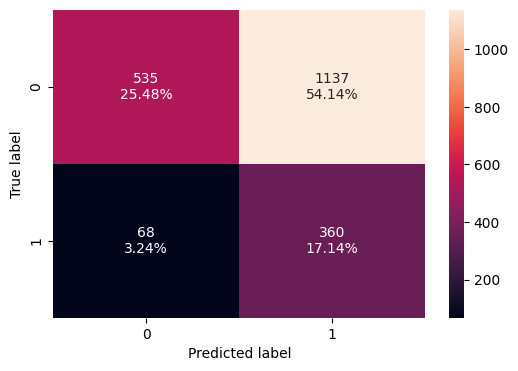

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

As per confusion matrix, test recall score is 84.11%

NN Tuned with 4 layers_Balanced_0552 -
* Validation Recall Score - 86.33%
* Test Recall Score: 84.11%

##### NN Tuned with 2 layers_Balanced_0030 - Validation Recall Score - 85.79%

In [ ]:
trainedModel_hyp_2NN_0030.summary() #Prints summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,573 (115.52 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,716 (77.02 KB)

In [ ]:
y_test_pred = trainedModel_hyp_2NN_0030.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
test_recall_score = recall_score(y_test,y_test_pred)
test_recall_score

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


0.8107476635514018

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.56      0.70      1672
           1       0.32      0.81      0.46       428

    accuracy                           0.61      2100
   macro avg       0.62      0.69      0.58      2100
weighted avg       0.80      0.61      0.65      2100



As per classification report, test recall is 81%

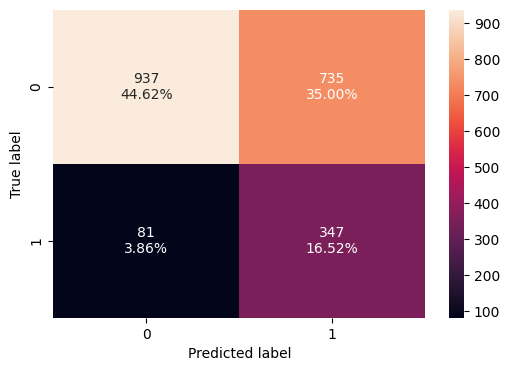

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

As per confusion matrix, test recall score is 81.07%

NN Tuned with 2 layers_Balanced_0030 -
* Validation Recall Score - 85.79%
* Test Recall Score: 81.1%

##### From 2nd level of tuning with many models with different criteria with Keras Tuner, we are able to achieve significant improvement in test scores  with all models selected above 80% recall and
**BOTH NN Tuned Models with 4 layers_Balanced_0522 & 0585 gave 84.8% Test recall scores.**

### Model Selection

Had to compare all models from Keras Tuner as they had similar performance.
* From 1st level of tuning with many models with different criteria, we are able to achieve only **NN with Adam Optimizer + Early Stopping + Balanced Weights + 1 Dropout + Learning Rate Reduced : Test Recall Score: 76.1%**
* From 2nd level of tuning with many models with different criteria with Keras Tuner, we are able to achieve significant improvement in test scores  with all models selected above 80% recall and
**BOTH NN Tuned with 4 layers_Balanced_0522 & 0585 gave best 84.8% Test recall scores.** and are considered the best models.
* Hyperparams for selected Model(s) as both are alike:
  * Model: NN Tuned with 4 layers_Balanced_0522/0585
  * Weight Balance Method: Class weight balanced
  * #Hidden Layers:4
  * Neurons in hidden layer: [32, 128, 64, 32]
  * Activations in each layer: [relu, relu, relu, relu]
  * #Epochs: <100[ES]
  * Batch Size: 32
  * Optimizer: sgd_momentum
  * Learning Rate, Momentum: [0.00010969473489808994, 0.5]
  * Weights Initialization: he_normal
  * Dropouts: [Dropout_1(0.2), Dropout_2(0.4), Dropout_3(0.4)]
  

## Actionable Insights and Business Recommendations

* Neural network was able to identify 84.8% of customers who could churn, which greatly reduces false predictions on churn.
* The management can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether a customer would churn or not, and this process seems to be easier and more time-efficient than other methods.
* The bank should prioritize gender diversity initiatives in its way of enticing more customers. Against respective Gender's total customers' base,
More Female customers leave the bank than the male. Priorities/offers enticing female customers should be driven by the marketing team.
* Bank should also prioritize offers/incentives for customers focusing on the geography. Based on the geography, Against respective countries' total customers' base, More customers leave from Germany. Please note that its against its own customer base.
* Bank can work along with their marketing team to find innovative products which could basically increase the attraction for customers to become an account holder. On the other hand, More products seem to overwhelm the customers and basically make them not interested as well, so More customers with 4 products churn while customers with 2 products are the least to churn. Please note that its against its own total customer base. So, rather than letting customers get too many products from the bank, they can focus on 1/2 products with most enticing offers as those have least churn.
* Bank should take some initiatives to make customer more actively transact with the bank, more offers, products which would attract them. More customers churn if they are inactive. Please note that its against its own customer base. If they are inactive, there is no active transactions made which make them withdraw their account from the bank.
* Current dataset is highly imbalanced with respect to customer who churn. So, Balancing with respect to the best performing model was done based on class weights, oversampling didnt seem to yield best recall results.Ensuring a balanced dataset is crucial for model training to avoid biased predictions.






<font size=6 color='blue'>Power Ahead</font>
___